# Web Scraping for Indeed.com and Predicting Salaries

Part two: import the csv and filter our duplicates and clear up salaries

In [1]:
import pandas as pd
import numpy as np

import requests
# from tqdm import tqdm
import re
import time
import random
import csv
import sys

results_engineer = pd.read_csv('/Users/stuart/Desktop/GA2/DSI20-lessons/projects/project-4/Master File/results1.csv', sep=',', header=1, index_col=0) 
results_scientist = pd.read_csv('/Users/stuart/Desktop/GA2/DSI20-lessons/projects/project-4/Master File/results2.csv', sep=',', header=1, index_col=0) 
results_desperado = pd.read_csv('/Users/stuart/Desktop/GA2/DSI20-lessons/projects/project-4/Master File/results3.csv', sep=',', header=1, index_col=0) 

results = results_scientist.copy()
results = results.append(results_engineer, ignore_index=True)
results = results.append(results_desperado, ignore_index=True)

print('Results engineer:',results_engineer.shape)
print('Results scientist:',results_scientist.shape)
print('Results desperado:',results_desperado.shape)

print('Combined dataframe shape:',results.shape)
results.head()
pd.options.display.max_columns = None
pd.options.display.max_rows = 30




Results engineer: (3151, 10)
Results scientist: (389997, 10)
Results desperado: (4054, 10)
Combined dataframe shape: (397202, 10)


In [2]:
results.head()

Location                          Company  \
0      Holbrook, NY 11741+18 locations                      Capital One   
1                   Melville, NY 11775               Canon U.S.A., Inc.   
2                         Melville, NY                Jackson Lewis P.C   
3  Farmingville, NY 11738+10 locations                      Capital One   
4      Nesconset, NY 11767+3 locations  NATIONAL GRID CO USA (NE POWER)   

                                           Job_Title Salary    Title_Searched  \
0         newDistinguished Machine Learning Engineer    NaN  data%20scientist   
1                                     Data Scientist    NaN  data%20scientist   
2                                     Statistician I    NaN  data%20scientist   
3  newSr. Distinguished Engineer - Machine Learni...    NaN  data%20scientist   
4               newLead Data Scientist, Data Science    NaN  data%20scientist   

  City_Searched                                               Link  \
0    Holtsville  https://www.indeed.com/jobs?q=data%20scientist...   
1    Holtsville  https://www.indeed.com/jobs?q=data%20scientist...   
2    Holtsville  https://www.indeed.com/jobs?q=data%20scientist...   
3    Holtsville  https://www.indeed.com/jobs?q=data%20scientist...   
4    Holtsville  https://www.indeed.com/jobs?q=data%20scientist...   

                                     Job Description  Date Since Posted  \
0  \nCapital One will consider for employment qua...         4 days ago   
1  \nMinimum of 3 years in a Data Science role wi...        23 days ago   
2  \nAbility to multi-task and manage multiple pr...  Active 7 days ago   
3  \nEstablish a world-class competency in machin...         4 days ago   
4  \nStrong hands-on experience and deep understa...         4 days ago   

   Company Rating  
0             3.9  
1             3.7  
2             3.5  
3             3.9  
4             3.8

In [3]:
## Drop any repeats...
results_unique1 = results.drop_duplicates(keep='first', subset=['Company', 'Job_Title', 'Salary', 'Title_Searched', 'City_Searched'])
print('Unique Results Shape:',results_unique1.shape)
print('Unique Results Salary Not Nan Count:', results_unique1.Salary.notnull().sum())
results_unique1[results_unique1.Salary.notnull()].sort_values(by = 'Job_Title').tail(10)

Unique Results Shape: (396975, 10)
Unique Results Salary Not Nan Count: 27686


Location  Company                 Job_Title  \
13581         Raritan, NJ  WorkCog  newsenior data scientist   
272783        Raritan, NJ  WorkCog  newsenior data scientist   
272646        Raritan, NJ  WorkCog  newsenior data scientist   
272494        Raritan, NJ  WorkCog  newsenior data scientist   
312797        Raritan, NJ  WorkCog  newsenior data scientist   
272302        Raritan, NJ  WorkCog  newsenior data scientist   
178741        Raritan, NJ  WorkCog  newsenior data scientist   
282910        Raritan, NJ  WorkCog  newsenior data scientist   
391352  Austin, TX•Remote    soona      senior data engineer   
392929  Denver, CO•Remote    soona      senior data engineer   

                            Salary    Title_Searched      City_Searched  \
13581            $40 - $60 an hour  data%20scientist          Princeton   
272783           $40 - $60 an hour  data%20scientist           Denville   
272646           $40 - $60 an hour  data%20scientist        Changewater   
272494           $40 - $60 an hour  data%20scientist            Califon   
312797           $40 - $60 an hour  data%20scientist  Monroe%20Township   
272302           $40 - $60 an hour  data%20scientist        Budd%20Lake   
178741           $40 - $60 an hour  data%20scientist            Garwood   
282910           $40 - $60 an hour  data%20scientist            Mendham   
391352  $120,000 - $160,000 a year   data%20engineer             Austin   
392929  $120,000 - $160,000 a year   data%20engineer             Denver   

                                                     Link  \
13581   https://www.indeed.com/jobs?q=data%20scientist...   
272783  https://www.indeed.com/jobs?q=data%20scientist...   
272646  https://www.indeed.com/jobs?q=data%20scientist...   
272494  https://www.indeed.com/jobs?q=data%20scientist...   
312797  https://www.indeed.com/jobs?q=data%20scientist...   
272302  https://www.indeed.com/jobs?q=data%20scientist...   
178741  https://www.indeed.com/jobs?q=data%20scientist...   
282910  https://www.indeed.com/jobs?q=data%20scientist...   
391352  https://www.indeed.com/jobs?q=data%20engineer&...   
392929  https://www.indeed.com/jobs?q=data%20engineer&...   

                                          Job Description  Date Since Posted  \
13581   \nShould work on integrating data from differe...  Active 2 days ago   
272783  \nShould work on integrating data from differe...  Active 2 days ago   
272646  \nShould work on integrating data from differe...  Active 2 days ago   
272494  \nShould work on integrating data from differe...  Active 2 days ago   
312797  \nShould work on integrating data from differe...  Active 2 days ago   
272302  \nShould work on integrating data from differe...  Active 2 days ago   
178741  \nShould work on integrating data from differe...   Active 1 day ago   
282910  \nShould work on integrating data from differe...  Active 2 days ago   
391352  \nThe senior data engineer will support our so...        30 days ago   
392929  \nThe senior data engineer will support our so...       30+ days ago   

        Company Rating  
13581              NaN  
272783             NaN  
272646             NaN  
272494             NaN  
312797             NaN  
272302             NaN  
178741             NaN  
282910             NaN  
391352             NaN  
392929             NaN

In [4]:
## not good enough! there are many jobs with different cities... so take these out too
# not looking so great now! 

results_unique2 = results.drop_duplicates(keep='first', subset=['Company', 'Job_Title', 'Salary'])
print('Unique Results Shape:',results_unique1.shape)
print('Unique Results Salary Not Nan Count:', results_unique2.Salary.notnull().sum())
results_unique2[results_unique2.Salary.notnull()].sort_values(by = 'Job_Title').tail(20)


Unique Results Shape: (396975, 10)
Unique Results Salary Not Nan Count: 1279


Location  \
5235                                   Bethesda, MD 20810   
183                                      Miami, FL•Remote   
1537    San Francisco, CA 94102 (Van Ness - Civic Cent...   
15957                                   Boston, MA•Remote   
159                   Tampa, FL 33620 (Terrace Park area)   
2777                                        St. Louis, MO   
2778                                        St. Louis, MO   
157658                                 Columbia, SC 29223   
137697                                      Frankfort, KY   
6302                                       West Haven, CT   
125422                               Bloomsburg, PA 17815   
9003                                      Wake County, NC   
151432              Salt Lake City, UT•Temporarily Remote   
5523                  Vienna, VA 22180•Temporarily Remote   
395012                   Austin, TX 78701 (Downtown area)   
392679                          Chandler, AZ 85286•Remote   
258382                                  Chicago, IL 60290   
133055       Orlando, FL 32803 (Colonialtown area)•Remote   
3695                                          Raritan, NJ   
391352                                  Austin, TX•Remote   

                                                Company  \
5235                                                IBM   
183                              TBC Power & Renewables   
1537                   City and County of San Francisco   
15957                                          Mandiant   
159                         University of South Florida   
2777                 Washington University in St. Louis   
2778                 Washington University in St. Louis   
157658                          State of South Carolina   
137697                           University of Kentucky   
6302                  US Veterans Health Administration   
125422            Bloomsburg University of Pennsylvania   
9003                            State of North Carolina   
151432  US Health Resources and Services Administration   
5523                          Navy Federal Credit Union   
395012      TEXAS DEPT OF HOUSING AND COMMUNITY AFFAIRS   
392679                                 Northrop Grumman   
258382                                              IBM   
133055                                      CyberCoders   
3695                                            WorkCog   
391352                                            soona   

                                                Job_Title  \
5235    newSr. Programmer/Analyst, Custom Data Analyti...   
183     newSr. Renewables Python Data Scientist / Quan...   
1537    newSr. Research, Evaluation & Data Analyst (1823)   
15957                newStaff Data Scientist - REMOTE USA   
159                           newStatistical Data Analyst   
2777         newStatistical Data Analyst - Anesthesiology   
2778          newStatistical Data Analyst - Biostatistics   
157658            newStatistical and Research Analyst III   
137697                                    newStatistician   
6302                           newStatistician (Medicine)   
125422                             newStatistician 2 or 3   
9003            newStatistician II -- Temporary Solutions   
151432        newStatistician PD 20R100 - HIV/AIDS Bureau   
5523    newSupervisor, Business Analytics-Quantitative...   
395012                        newTDHCA - HRC Data Analyst   
392679  newTableau Engineer/Data Scientist- Next Gener...   
258382    newTechnical Sales Specialist- Data Engineering   
133055  newTransportation Software Engineer (.NET Core...   
3695                             newsenior data scientist   
391352                               senior data engineer   

                            Salary    Title_Searched       City_Searched  \
5235    $107,000 - $194,000 a year  data%20scientist  West%20Springfield   
183     $100,000 - $200,000 a year  data%20scientist             Florida   
1537    $104,598 

Code to clean up salaries. I removed any salaries that weren't annual. I used the average if their was a yearly range.

In [2]:
results_filtered = results_unique2[results_unique2.Salary.notnull()]

In [6]:
test = 'From $30 an hour data%20scientist'

In [7]:
test1 = 'yearly salary'

In [8]:
remove = ['hour', 'hourly', 'week', 'weekly', 'day', 'daily', 'hour']

In [9]:
def remove_non_annual(x):
    remove = ['hour', 'hourly', 'week', 'weekly', 'day', 'daily', 'hour', 'month','monthly']
    check = 0
    for i in remove:
        if i in x:
            check += 1
    if check != 0:
        return False
    else: return True


In [10]:
# filter out hour or weekly

results_annual_salaries = results_filtered[results_filtered['Salary'].apply(remove_non_annual)]

In [11]:
results_annual_salaries.shape

(1015, 10)

In [12]:
results_annual_salaries.Salary.value_counts()

$120,000 - $160,000 a year    10
$150,000 a year                9
$90,000 - $120,000 a year      8
$150,000 - $200,000 a year     8
$80,000 - $100,000 a year      8
                              ..
$85,000 - $140,000 a year      1
$100,001 - $125,000 a year     1
$75,000 - $80,000 a year       1
$130,000 - $200,000 a year     1
$84,000 - $94,000 a year       1
Name: Salary, Length: 638, dtype: int64

In [13]:
def filter_salaries(text):
    if text.startswith('$'):
        m = re.search(r'([\d\.]+) *- *\$?([\d\.]+)', text.replace(",", ""))
        if m:
            lo, hi = m.groups()
            return (float(lo) + float(hi))/2
    alt = re.findall(r'([0-9]+)',text.replace(",",""))  
    return float(alt[0])

print(filter_salaries('From $97,000 a year'))
print(filter_salaries('$20,000 - $24,023 per hour'))

97000.0
22011.5


In [14]:
results_annual_salaries_filtered = results_annual_salaries.copy()
results_annual_salaries_filtered['Salary'] = results_annual_salaries['Salary'].map(filter_salaries)
results_annual_salaries_filtered.head()

Location  \
8               Farmingdale, NY 11735   
9   New York State•Temporarily Remote   
17                      United States   
89            Washington State•Remote   
90            Washington State•Remote   

                                    Company  \
8                               CyberCoders   
9                          Zelda Recruiting   
17  Oriel STAT A MATRIX, A Validant Company   
89                                   Zillow   
90                                   Zillow   

                                            Job_Title    Salary  \
8                  newData Scientist Manager - Hybrid  155000.0   
9   Customer Success Manager: Big-Data, AI, Machin...  105000.0   
17  Director - Artificial Intelligence for Medical...  130000.0   
89                newData Scientist II, Premier Agent  140000.0   
90   newData Scientist, Customer Engagement Analytics  140000.0   

      Title_Searched City_Searched  \
8   data%20scientist    Holtsville   
9   data%20scientist    Holtsville   
17  data%20scientist    Holtsville   
89  data%20scientist       Rosario   
90  data%20scientist       Rosario   

                                                 Link  \
8   https://www.indeed.com/jobs?q=data%20scientist...   
9   https://www.indeed.com/jobs?q=data%20scientist...   
17  https://www.indeed.com/jobs?q=data%20scientist...   
89  https://www.indeed.com/jobs?q=data%20scientist...   
90  https://www.indeed.com/jobs?q=data%20scientist...   

                                      Job Description  Date Since Posted  \
8   \nExperience with Spark & other ETL libraries;...          1 day ago   
9   \nEfficiently manage time to focus on essentia...         9 days ago   
17  \nAdept at applying AI techniques to medical e...  Active 2 days ago   
89  \nWork with engineering teams to improve data ...         8 days ago   
90  \nExperience in sharing insights through data ...         8 days ago   

    Company Rating  
8              3.5  
9              NaN  
17             NaN  
89             3.7  
90             3.7

In [15]:
# these all look reasonable
results_annual_salaries_filtered.describe()

Salary  Company Rating
count    1015.000000      660.000000
mean   118416.124631        3.756212
std     40922.330096        0.455058
min     11500.000000        1.800000
25%     89394.250000        3.500000
50%    115000.000000        3.700000
75%    143100.000000        4.000000
max    360000.000000        5.000000

In [16]:
results_annual_salaries_filtered.sort_values(by='Salary', ascending=False)

Location                       Company  \
129                          Carolina, PR                    Harnham US   
393354  Seattle, WA 98101 (Downtown area)                        Zillow   
393318            Washington State•Remote                        Zillow   
393635  Seattle, WA 98101 (Downtown area)                        Zillow   
5460      Arlington County, VA+1 location                 Interos, Inc.   
...                                   ...                           ...   
157666                 Columbia, SC 29223       State of South Carolina   
157665      Columbia, SC 29223+1 location       State of South Carolina   
157658                 Columbia, SC 29223       State of South Carolina   
323554              New York State•Remote                      Narrativ   
160                      Miami, FL•Remote  World Data Science Institute   

                                                Job_Title    Salary  \
129                  Global Head Data Science & Analytics  360000.0   
393354   Senior Director, Applied Science - Zillow Offers  330000.0   
393318                             VP, Customer Analytics  300000.0   
393635  Senior Principal Data Architect - Data Enginee...  280000.0   
5460           Machine Learning Engineer Fellow (ML, NLP)  253125.0   
...                                                   ...       ...   
157666                          Statistician III-60024959   41777.0   
157665                           Statistician III - OHSJP   41777.0   
157658            newStatistical and Research Analyst III   34331.0   
323554                                Senior Data Analyst   25000.0   
160                      The World Data Science Institute   11500.0   

          Title_Searched       City_Searched  \
129     data%20scientist              Dorado   
393354    data%20science          washington   
393318    data%20science          washington   
393635    data%20science          washington   
5460    data%20scientist  West%20Springfield   
...                  ...                 ...   
157666  data%20scientist            Columbia   
157665  data%20scientist            Columbia   
157658  data%20scientist            Columbia   
323554  data%20scientist          New%20York   
160     data%20scientist             Florida   

                                                     Link  \
129     https://www.indeed.com/jobs?q=data%20scientist...   
393354  https://www.indeed.com/jobs?q=data%20science&l...   
393318  https://www.indeed.com/jobs?q=data%20science&l...   
393635  https://www.indeed.com/jobs?q=data%20science&l...   
5460    https://www.indeed.com/jobs?q=data%20scientist...   
...                                                   ...   
157666  https://www.indeed.com/jobs?q=data%20scientist...   
157665  https://www.indeed.com/jobs?q=data%20scientist...   
157658  https://www.indeed.com/jobs?q=data%20scientist...   
323554  https://www.indeed.com/jobs?q=data%20scientist...   
160     https://www.indeed.com/jobs?q=data%20scientist...   

                                          Job Description Date Since Posted  \
129     \n10+ years immersed in data & analytics withi...       24 days ago   
393354  \nExtensive applied or data science experience...       20 days ago   
393318  \nFamiliar with data science tools and methods...      30+ days ago   
393635  \nData management is evolving quickly, from mo...      30+ days ago   
5460    \nDeep technical skills in machine learning, d...      30+ days ago   
...                                                   ...               ...   
157666  \nExtract data from existing data systems or f...      30+ days ago   
157665  \nInterprets existing trends in program areas;...      30+ days ago   
157658  \nMeets with Medicaid stakeholders to assess n...        2 days ago   
323554  \nYou will help standardize data, establish go...      30+ days ago   
160     \nThe ideal candidate will provide top-level a...        9 days ago   

        Company Rati

In [17]:
results_annual_salaries_filtered.dtypes

Location              object
Company               object
Job_Title             object
Salary               float64
Title_Searched        object
City_Searched         object
Link                  object
Job Description       object
Date Since Posted     object
Company Rating       float64
dtype: object

In [18]:
results_annual_salaries_filtered.to_csv('results_annual_salaries_filtered.csv')

Load in the the data of scraped salaries

In [20]:
## YOUR CODE HERE
results_annual_salaries_filtered = pd.read_csv('/Users/stuart/Desktop/GA2/DSI20-lessons/projects/project-4/results_annual_salaries_filtered.csv', sep=',', header=0, index_col=0) 



### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median).

We could also perform Linear Regression (or any regression) to predict the salary value here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW salary.

While performing regression may be better, performing classification may help remove some of the noise of the extreme salaries. We don't have to choose the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of salaries.

In [21]:
results_annual_salaries_filtered.describe()
# median value of $115,000

Salary  Company Rating
count    1015.000000      660.000000
mean   118416.124631        3.756212
std     40922.330096        0.455058
min     11500.000000        1.800000
25%     89394.250000        3.500000
50%    115000.000000        3.700000
75%    143100.000000        4.000000
max    360000.000000        5.000000

In [22]:
# FUNCTION TO CREATE NEW COLUMN WITH HIGH OR LOW
def sort_groups(x):
    if x <= 115000:
        return 'LOW'
    else:
        return 'HIGH'



In [23]:
results_annual_salaries_filtered['Salary_HIGH_LOW'] = results_annual_salaries_filtered['Salary']

results_annual_salaries_filtered['Salary_HIGH_LOW'] = results_annual_salaries_filtered['Salary_HIGH_LOW'].apply(sort_groups)

In [24]:
results_annual_salaries_filtered['Salary_HIGH_LOW'].value_counts(normalize=True)
# base line is 50%. this makes sense as we split the data in the mid point.

LOW     0.510345
HIGH    0.489655
Name: Salary_HIGH_LOW, dtype: float64

In [25]:
## YOUR CODE HERE

In [26]:
## # base line is 50%. this makes sense as we split the data in the mid point.

In [27]:
# look at the locations...note that some cities have multiple names, E.g. Dever Co... Denver CO remote
pd.options.display.max_rows = None
results_annual_salaries_filtered.Location.value_counts()

Washington State•Remote                                                  25
Denver, CO                                                               23
Washington, DC                                                           15
Chicago, IL                                                              14
Seattle, WA                                                              13
St. Louis, MO                                                            12
New York, NY                                                             10
Dallas, TX                                                                9
Irving, TX•Temporarily Remote                                             9
Queens, NY 11101                                                          9
Northbrook, IL•Remote                                                     8
Fort Meade, MD                                                            8
New York, NY•Remote                                                       8
New York, NY

In [28]:
def shorten_city_names(text):
#     alt = re.findall(r'^([^(,)]+),',text)
    alt = re.findall(r'^([\w" "]+)',text)  
    return alt[0]

print(shorten_city_names('Denver, CO'))
print(shorten_city_names('Denver, CO•Remote'))
print(shorten_city_names('New York State•Remote'))

# ^        starts with
# [^,]     anything but a comma
# +        repeated one or more times (use * (means zero or more) if the first field can be empty)
# ([^,]+)  remember that part
# ,        followed by a comma



Denver
Denver
New York State


In [ ]:
## YOUR CODE HERE
results_annual_salaries_filtered['Location_Short'] = results_annual_salaries_filtered.Location
results_annual_salaries_filtered['Location_Short'] = results_annual_salaries_filtered['Location_Short'].apply(shorten_city_names)
results_annual_salaries_filtered.head()
results_annual_salaries_filtered.Location_Short.value_counts()



note with hind sight the obvious thing would to have been to extract the state rather than the city. This probably would have been easier and would have resulted in far less buckets.


In [30]:
results_annual_salaries_filtered.head()

Location  \
8               Farmingdale, NY 11735   
9   New York State•Temporarily Remote   
17                      United States   
89            Washington State•Remote   
90            Washington State•Remote   

                                    Company  \
8                               CyberCoders   
9                          Zelda Recruiting   
17  Oriel STAT A MATRIX, A Validant Company   
89                                   Zillow   
90                                   Zillow   

                                            Job_Title    Salary  \
8                  newData Scientist Manager - Hybrid  155000.0   
9   Customer Success Manager: Big-Data, AI, Machin...  105000.0   
17  Director - Artificial Intelligence for Medical...  130000.0   
89                newData Scientist II, Premier Agent  140000.0   
90   newData Scientist, Customer Engagement Analytics  140000.0   

      Title_Searched City_Searched  \
8   data%20scientist    Holtsville   
9   data%20scientist    Holtsville   
17  data%20scientist    Holtsville   
89  data%20scientist       Rosario   
90  data%20scientist       Rosario   

                                                 Link  \
8   https://www.indeed.com/jobs?q=data%20scientist...   
9   https://www.indeed.com/jobs?q=data%20scientist...   
17  https://www.indeed.com/jobs?q=data%20scientist...   
89  https://www.indeed.com/jobs?q=data%20scientist...   
90  https://www.indeed.com/jobs?q=data%20scientist...   

                                      Job Description  Date Since Posted  \
8   \nExperience with Spark & other ETL libraries;...          1 day ago   
9   \nEfficiently manage time to focus on essentia...         9 days ago   
17  \nAdept at applying AI techniques to medical e...  Active 2 days ago   
89  \nWork with engineering teams to improve data ...         8 days ago   
90  \nExperience in sharing insights through data ...         8 days ago   

    Company Rating Salary_HIGH_LOW    Location_Short  
8              3.5            HIGH       Farmingdale  
9              NaN             LOW    New York State  
17             NaN            HIGH     United States  
89             3.7            HIGH  Washington State  
90             3.7            HIGH  Washington State

Run logistic model using shortened city names to predict HIGH OR LOW

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline



Bold = '\033[1m'
Normal = '\033[0m'

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score



X = results_annual_salaries_filtered.Location_Short.copy()
X = pd.get_dummies(X, columns=['Location_Short'], drop_first= True) # dummify one column
y = results_annual_salaries_filtered.Salary_HIGH_LOW.copy()


# get train-test split with balance between 1s and 0s of test are kept equivalent in each test (stratify =y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=1)

# standardize the data: Note on fit_transform() --> is used on the training data so that we can scale the training 
# data and also learn the scaling parameters of that data. The model built stores the mean and variance of the 
# # features of the training set. These learned parameters are then used to scale the test data.
# scaler = StandardScaler()
# X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
# X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)




/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LRCV Model:
LRCV Best alpha: [1.]
Best l1-ratio: [0.001]
LRCV CV Training score: 0.7463054187192119
LRCV Test Score: 0.6206896551724138 

ROC Train and Test Score: 0.8212590731434952 0.6975524475524475
Run X-Val:
ENetCV Cross-validated training scores: [0.59509202 0.60736196 0.62962963 0.66049383 0.62962963]
ENetCV Mean cross-validated training score: 0.624441414829963 



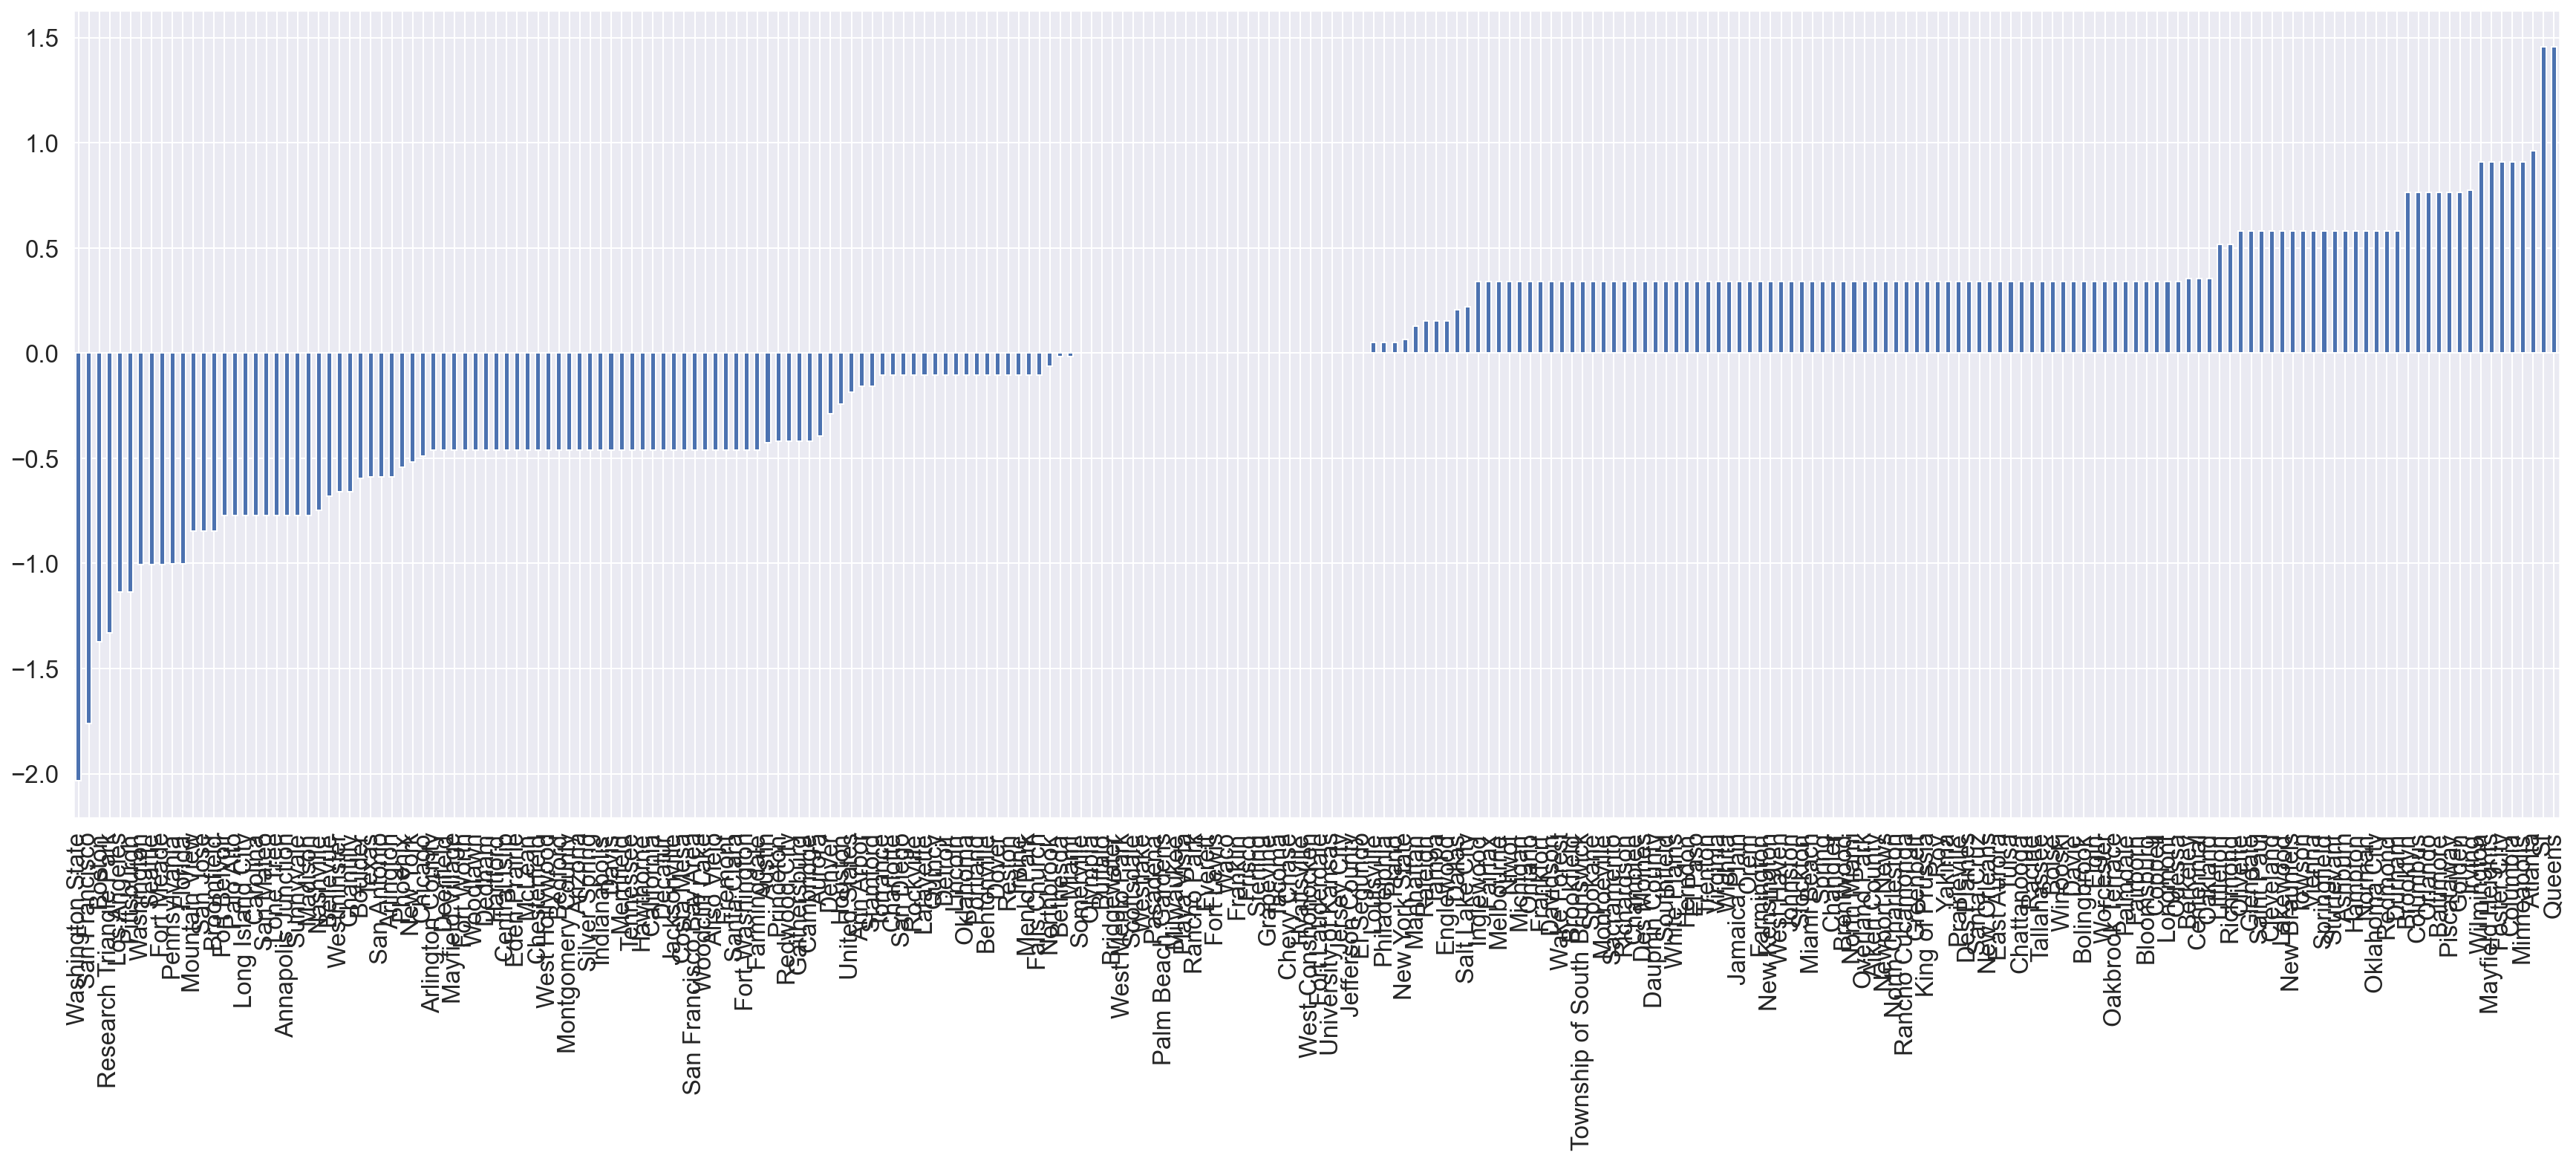

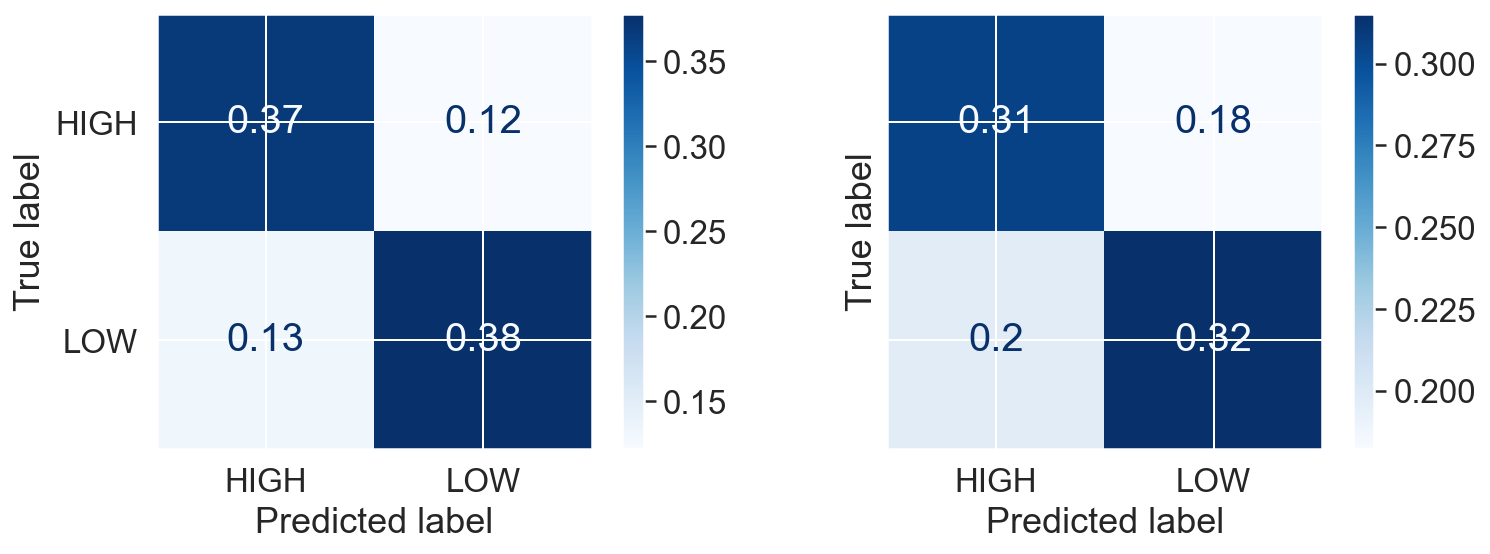

ROC Curves:


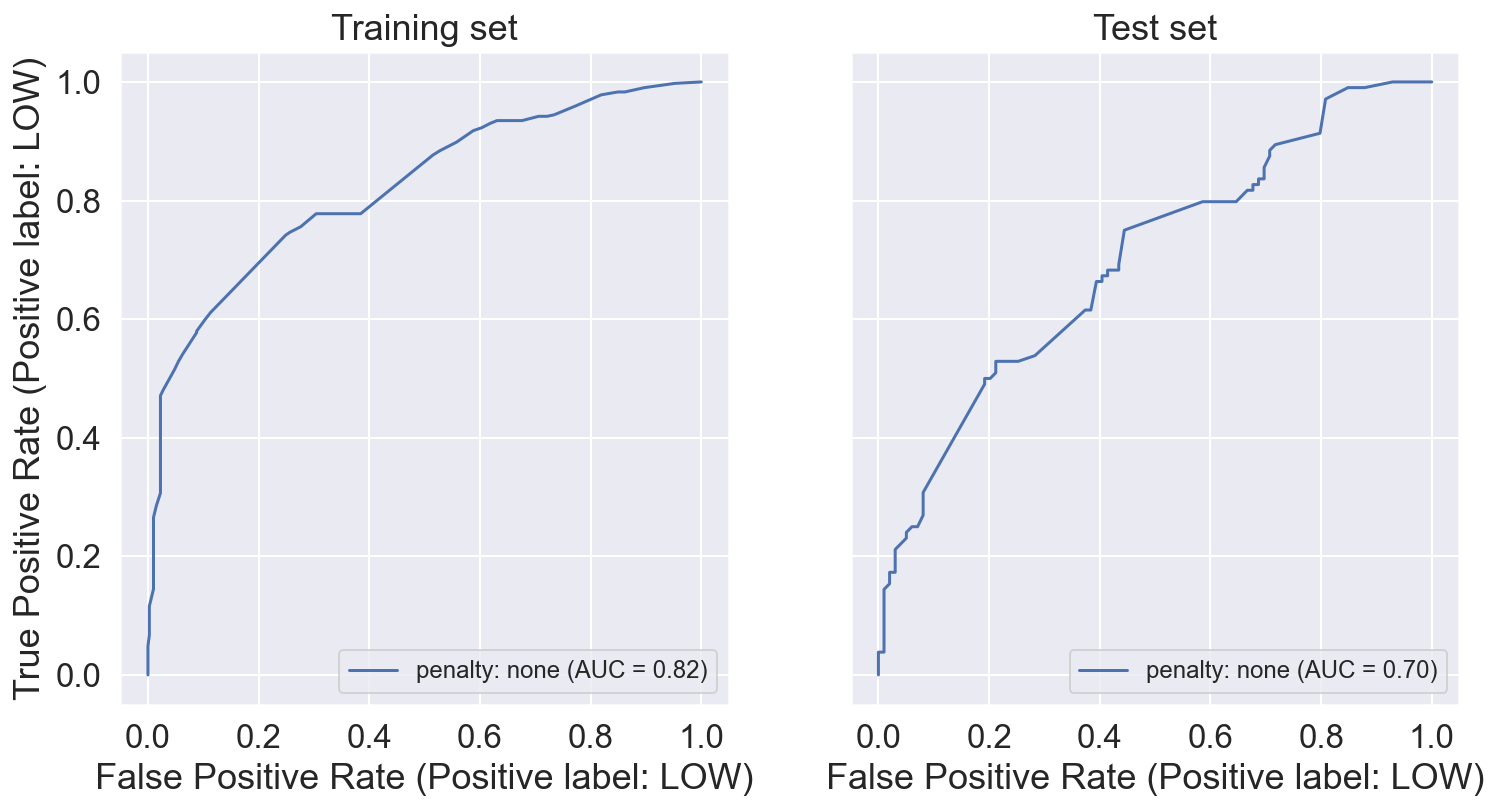

False positives rate changes with different threholds (test data):


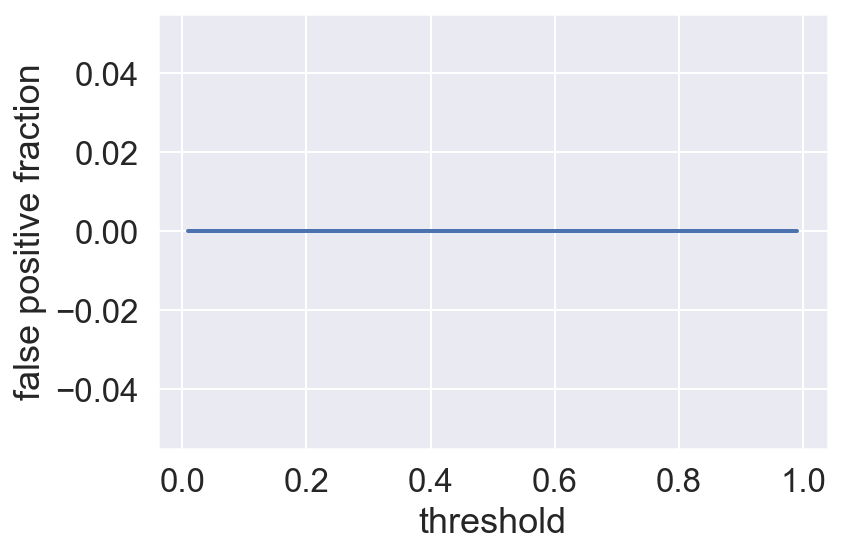

Accuracy rate changes with different threholds (test data):


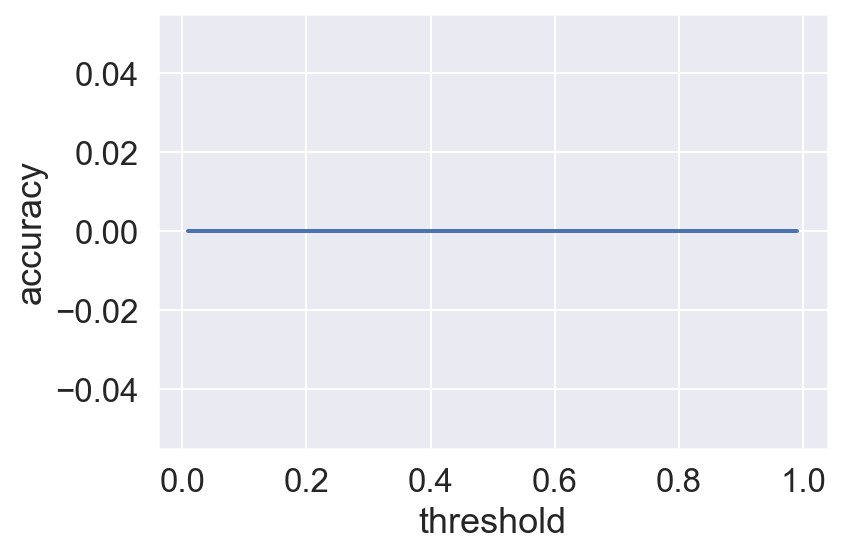

y_train classification report:
              precision    recall  f1-score   support

        HIGH       0.74      0.75      0.74       398
         LOW       0.76      0.74      0.75       414

    accuracy                           0.75       812
   macro avg       0.75      0.75      0.75       812
weighted avg       0.75      0.75      0.75       812

y_test classification report:
              precision    recall  f1-score   support

        HIGH       0.61      0.63      0.62        99
         LOW       0.63      0.62      0.62       104

    accuracy                           0.62       203
   macro avg       0.62      0.62      0.62       203
weighted avg       0.62      0.62      0.62       203



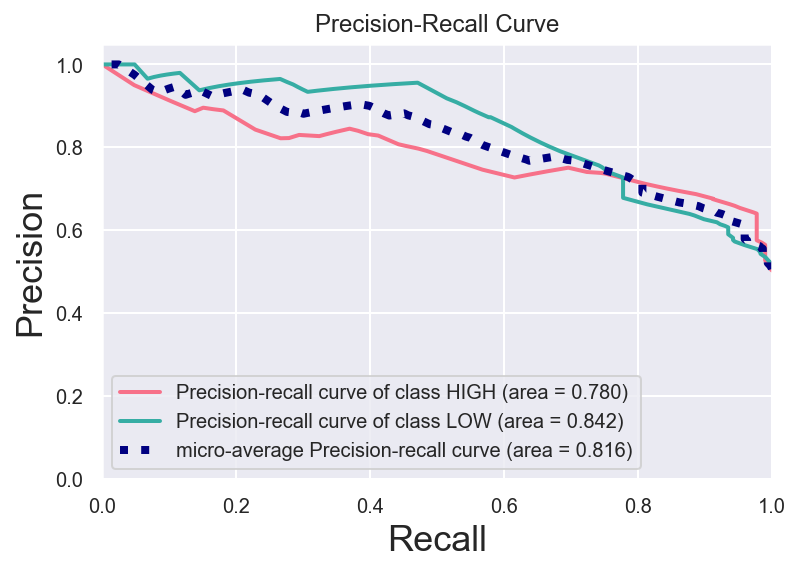

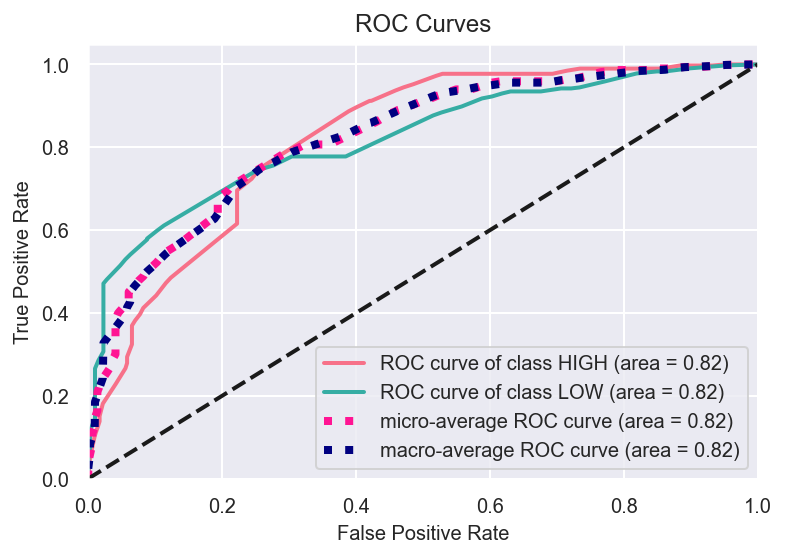

Coefficients (top 10) coefficients coef_abs 
 
 Washington State 
 -2.034785 
 2.034785 
 
 
 San Francisco 
 -1.760818 
 1.760818 
 
 
 Queens 
 1.456290 
 1.456290 
 
 
 St 
 1.456270 
 1.456270 
 
 
 Boston 
 -1.373689 
 1.373689 
 
 
 Research Triangle Park 
 -1.329388 
 1.329388 
 
 
 Los Angeles 
 -1.136244 
 1.136244 
 
 
 Pittsburgh 
 -1.136237 
 1.136237 
 
 
 Washington 
 -1.005601 
 1.005601 
 
 
 Seattle 
 -1.005397 
 1.005397 
 
 Model Summary LRCV 
 
 Training Score 
 0.746305 
 
 
 Cross-Validation 
 0.624441 
 
 
 Test Score 
 0.620690 
 
 
 C 
 [1.] 
 
 
 L1 Ratio 
 [0.001] 
 
 
 K-Folds 
 5

In [32]:
### Binary logistic regression. Note would need to change solver for more classes. 

from sklearn.metrics import  plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve, roc_auc_score, average_precision_score
Bold = '\033[1m'
Normal = '\033[0m'

# Cs represent lambda, therefore penalty severity

LRCV_kfolds = 5

# 10 ^-4 as alpha, then 15 intervals up to 4^10
# for multi class add --> multi_class='ovr'    and change solver to --->     'solver': ['liblinear']
LRCV = LogisticRegressionCV(Cs=np.logspace(-4,4,15), penalty='elasticnet', max_iter=10000, cv=5, solver='saga',
                               l1_ratios=[0.001, 0.01,0.05,0.1,0.5], n_jobs=6) # cv=LRCV_kfolds


# fit the model
LRCV.fit(X_train, y_train)

# get the best alpha
print(Bold + 'LRCV Model:' + Normal)
print('LRCV Best alpha:', LRCV.C_)

# get the best l1-ratio
print('Best l1-ratio:', LRCV.l1_ratio_)

# evaluate on the training set
print('LRCV CV Training score:', LRCV.score(X_train, y_train))

# evaluate on the test set
print("LRCV Test Score:", LRCV.score(X_test, y_test),'\n')

# ROC Train and test score
print('ROC Train and Test Score:', roc_auc_score(y_train, LRCV.predict_proba(X_train)[:, 1]), 
roc_auc_score(y_test, LRCV.predict_proba(X_test)[:, 1]))

# collect the model coefficients in a dataframe
df_coef_LRCV = pd.DataFrame(LRCV.coef_[0], index=X_train.columns,
                       columns=['coefficients'])

# calculate the absolute values of the coefficients
df_coef_LRCV['coef_abs'] = df_coef_LRCV.coefficients.abs()
df_coef_LRCV

## RUN X-VAL

## Get XVals score
print(Bold + 'Run X-Val:' + Normal)

# get cross validated scores
LRCV_scores = cross_val_score(LRCV, X_train, y_train, cv=LRCV_kfolds, n_jobs=6)

print("ENetCV Cross-validated training scores:", LRCV_scores)
print("ENetCV Mean cross-validated training score:", LRCV_scores.mean(),'\n')


############################ Charts and Tables ############################

# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(LRCV.coef_[0], index=X_train.columns,columns=['coefficients'])

# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef.sort_values(by='coef_abs', ascending = False)

# plot the magnitude of the coefficients (vertical)
fig, ax = plt.subplots(figsize=(30, 10))
df_coef['coefficients'].sort_values().plot(kind='bar')
plt.show()

# # plot the magnitude of the coefficients (horizontal)
# df_coef_ENetCV['coefficients'].sort_values().plot(kind='barh');



## Show Model Output summary
try:  
    df_scores_C # create the data frame if it doesn't already exist, otherwise just add a new column
except: 
    df_scores_C = pd.DataFrame(index= ['Training Score', 'Cross-Validation', 'Test Score', 'C', 'L1 Ratio','K-Folds'])
    LRCV_scores_df = [LRCV.score(X_train,y_train),LRCV_scores.mean(), LRCV.score(X_test, y_test), LRCV.C_, LRCV.l1_ratio_, LRCV_kfolds]
    df_scores_C['LRCV'] = LRCV_scores_df

else: 
    LRCV_scores_df = [LRCV.score(X_train,y_train),LRCV_scores.mean(), LRCV.score(X_test, y_test), LRCV.C_, LRCV.l1_ratio_, LRCV_kfolds]
    df_scores_C['LRCV'] = LRCV_scores_df

# Diplay the Coefficients data frame and Model Summary dataframes side by side
df_coef_styler = df_coef.sort_values(by='coef_abs', ascending = False)[:10].style.set_table_attributes("style='display:inline'").set_caption('Coefficients (top 10)')
df_scores_styler = df_scores_C.style.set_table_attributes("style='display:inline'").set_caption('Model Summary')

# plot the confusion matrix
from sklearn.metrics import  plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve, roc_auc_score, average_precision_score
fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
plot_confusion_matrix(LRCV, X_train, y_train, cmap='Blues', ax=ax[0], normalize='all')
plot_confusion_matrix(LRCV, X_test, y_test, cmap='Blues', ax=ax[1], normalize='all')
for a in ax:
    texts = a.texts
    for text in texts:
        text.set_size(20)
plt.show()

# Plot the ROC Curves:

print('ROC Curves:')
fig_roc, ax_roc = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)
plot_roc_curve(LRCV, X_train, y_train, ax=ax_roc[0], name='penalty: none')
plot_roc_curve(LRCV, X_test, y_test, ax=ax_roc[1], name='penalty: none')
ax_roc[0].legend(loc='lower right', fontsize=12)
ax_roc[1].legend(loc='lower right', fontsize=12)
ax_roc[1].set_ylabel(None)
ax_roc[0].set_title('Training set')
ax_roc[1].set_title('Test set')
plt.show()

# plot false positive rate as threshold changed:
print('False positives rate changes with different threholds (test data):')
false_positives = []
for thresh in np.arange(1, 100)/100.:
    labeled_1 = np.array([1 if x >= thresh else 0 for x in LRCV.predict_proba(X_test)[:, 1]])
    fp = np.mean((y_test == 0) & (labeled_1 == 1))
    false_positives.append((thresh, fp))
#     print('Threshold:', thresh, 'false positives:', fp)
false_positives = np.array(false_positives)
plt.plot(false_positives[:, 0], false_positives[:, 1], lw=2)
plt.xlabel('threshold')
plt.ylabel('false positive fraction')
plt.show()

# plot accuracy change with threshold
print('Accuracy rate changes with different threholds (test data):')
accuracies = []
for thresh in np.arange(1, 100)/100.:
    labeled_1 = np.array([1 if x >= thresh else 0 for x in LRCV.predict_proba(X_test)[:, 1]])
    acc = np.mean(y_test==labeled_1)
    accuracies.append((thresh, acc))
#     print('Threshold:', thresh, 'Correct predictions:', acc)
accuracies = np.array(accuracies)
plt.plot(*accuracies.T, lw=2)
plt.xlabel('threshold')
plt.ylabel('accuracy')
plt.show()


# classification report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
predictions_train = LRCV.predict(X_train)
predictions_test = LRCV.predict(X_test)
print('y_train classification report:')
print(classification_report(y_train, predictions_train))
print('y_test classification report:')
print(classification_report(y_test, predictions_test))

# precision recall curves:
from matplotlib.colors import ListedColormap
import scikitplot as skplt
cmap = ListedColormap(sns.color_palette("husl", len(LRCV.classes_)))
probabilities_train = LRCV.predict_proba(X_train)
probabilities_test = LRCV.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_train, probabilities_train, cmap=cmap)
plt.show()
skplt.metrics.plot_roc(y_train, probabilities_train, cmap=cmap)
plt.show()

from IPython.display import display_html 
display_html(df_coef_styler._repr_html_()+df_scores_styler._repr_html_(), raw=True)

from the above table it can be seen that the coeficients with the highest impact are: 
- Washingon State
- San Fran
- St: further EDA required to clean up some of the places
- Queens
- Boston
- Research Triangle Park

Note that signs are inverse due to how computer has encoded HIGH and LOW
Washington State has a coeficient of -0.154 which therefore implies that slaries in washington state tend to be higher than the median salary. This is the same for San Francisco, Boston and LA.

RUN KNN model

knn Training score: 0.6859605911330049
knn Test Score: 0.645320197044335 

ROC Train and Test Score: 0.7389362270288642 0.65510878010878
Run X-Val:
ENetCV Cross-validated training scores: [0.58282209 0.58282209 0.63580247 0.53703704 0.55555556]
ENetCV Mean cross-validated training score: 0.5788078467015072 



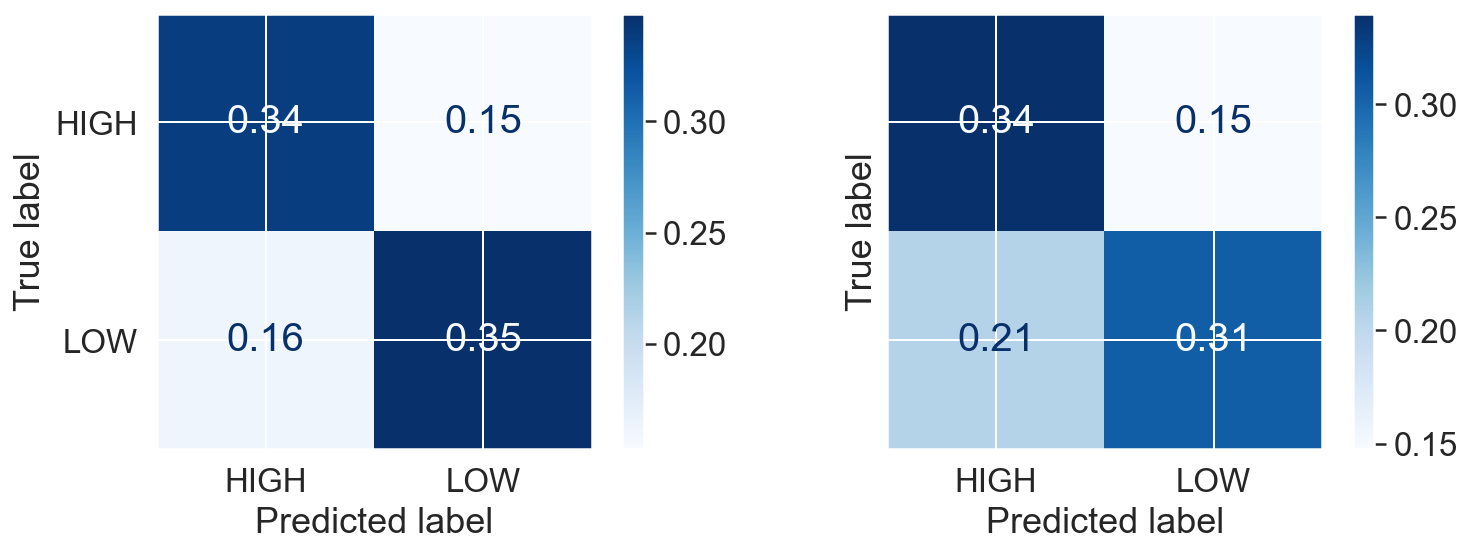

ROC Curves:


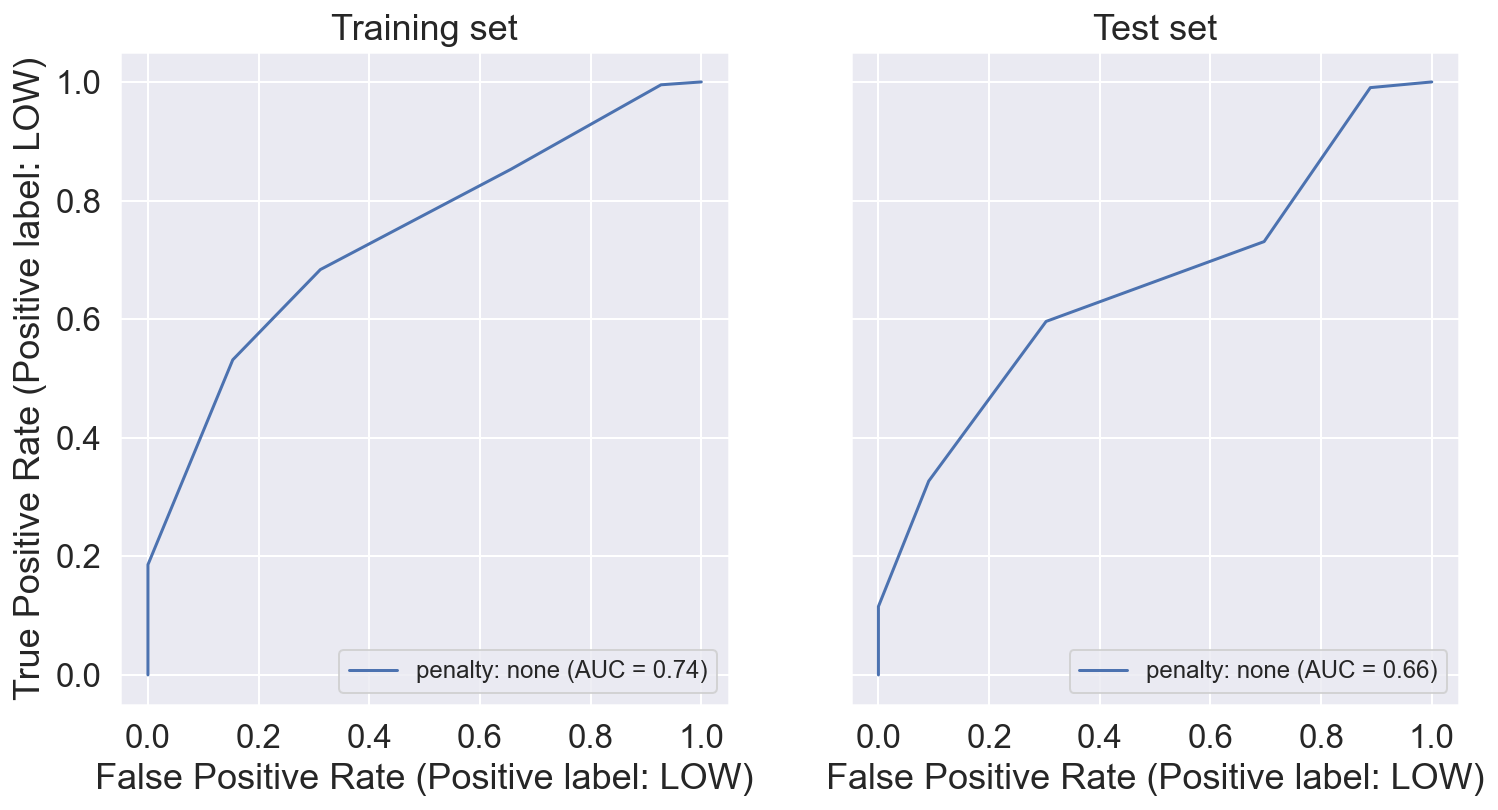

False positives rate changes with different threholds (test data):


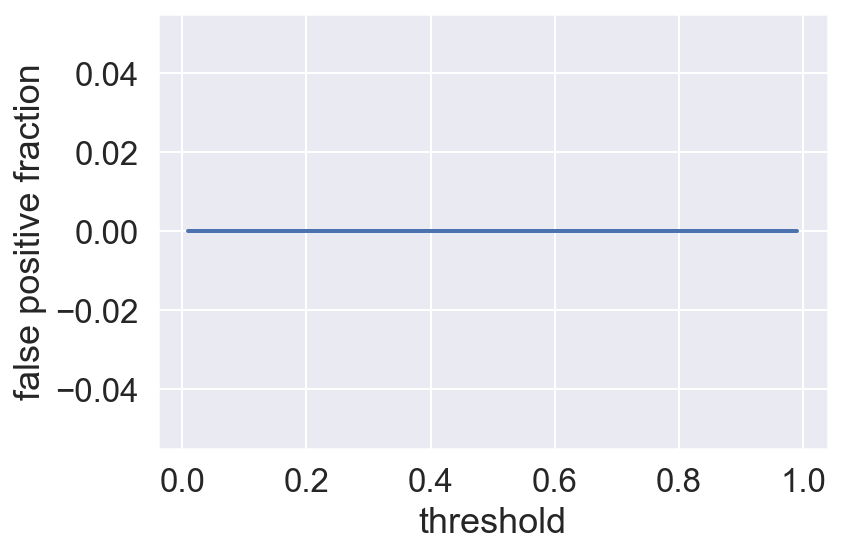

Accuracy rate changes with different threholds (test data):


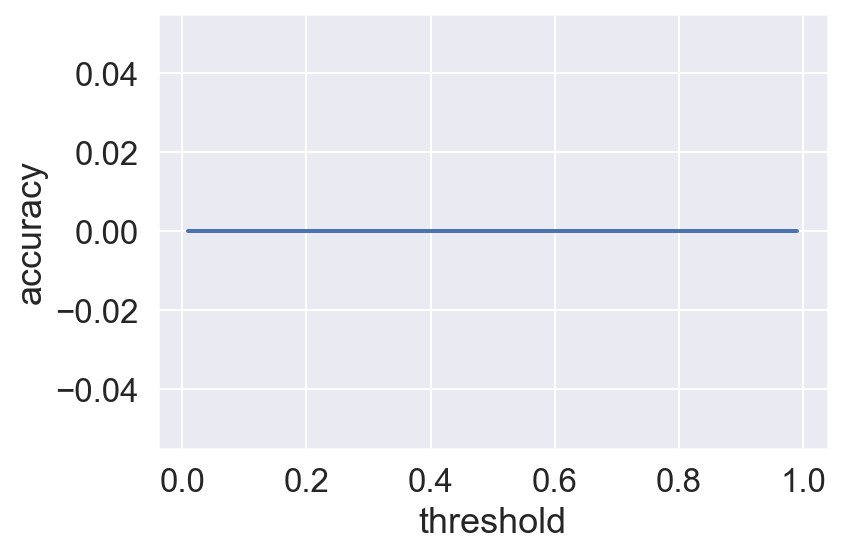

y_train classification report:
              precision    recall  f1-score   support

        HIGH       0.68      0.69      0.68       398
         LOW       0.70      0.68      0.69       414

    accuracy                           0.69       812
   macro avg       0.69      0.69      0.69       812
weighted avg       0.69      0.69      0.69       812

y_test classification report:
              precision    recall  f1-score   support

        HIGH       0.62      0.70      0.66        99
         LOW       0.67      0.60      0.63       104

    accuracy                           0.65       203
   macro avg       0.65      0.65      0.64       203
weighted avg       0.65      0.65      0.64       203



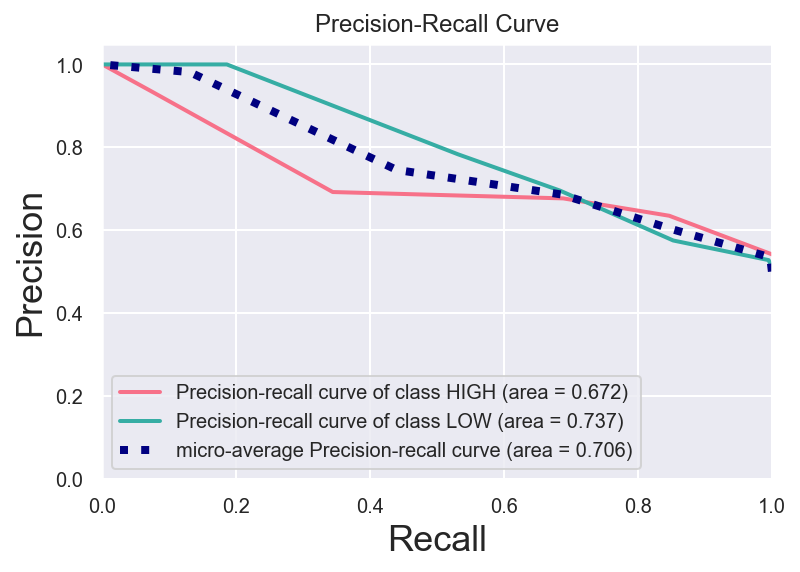

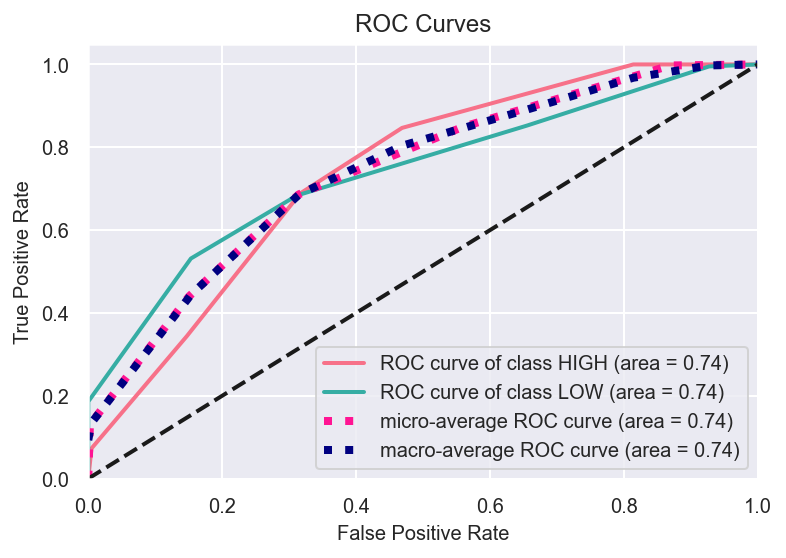

Coefficients (top 10) coefficients coef_abs 
 
 Washington State 
 -2.034785 
 2.034785 
 
 
 San Francisco 
 -1.760818 
 1.760818 
 
 
 Queens 
 1.456290 
 1.456290 
 
 
 St 
 1.456270 
 1.456270 
 
 
 Boston 
 -1.373689 
 1.373689 
 
 
 Research Triangle Park 
 -1.329388 
 1.329388 
 
 
 Los Angeles 
 -1.136244 
 1.136244 
 
 
 Pittsburgh 
 -1.136237 
 1.136237 
 
 
 Washington 
 -1.005601 
 1.005601 
 
 
 Seattle 
 -1.005397 
 1.005397 
 
 Model Summary LRCV knn 
 
 Training Score 
 0.746305 
 0.685961 
 
 
 Cross-Validation 
 0.624441 
 0.578808 
 
 
 Test Score 
 0.620690 
 0.645320 
 
 
 C 
 [1.] 
 
 
 
 L1 Ratio 
 [0.001] 
 
 
 
 K-Folds 
 5 
 5

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier




knn_kfolds = 5

knn = KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(X_train, y_train)


# evaluate on the training set
print('knn Training score:', knn.score(X_train, y_train))

# evaluate on the test set
print("knn Test Score:", knn.score(X_test, y_test),'\n')

# ROC Train and test score
print('ROC Train and Test Score:', roc_auc_score(y_train, knn.predict_proba(X_train)[:, 1]), 
roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1]))


## RUN X-VAL

## Get XVals score
print(Bold + 'Run X-Val:' + Normal)

# get cross validated scores
knn_scores = cross_val_score(knn, X_train, y_train, cv=knn_kfolds, n_jobs=6)

print("ENetCV Cross-validated training scores:", knn_scores)
print("ENetCV Mean cross-validated training score:", knn_scores.mean(),'\n')


############################ Charts and Tables ############################




## Show Model Output summary
try:  
    df_scores_C # create the data frame if it doesn't already exist, otherwise just add a new column
except: 
    df_scores_C = pd.DataFrame(index= ['Training Score', 'Cross-Validation', 'Test Score', 'C', 'L1 Ratio','K-Folds'])
    knn_scores_df = [knn.score(X_train,y_train),knn_scores.mean(), knn.score(X_test, y_test), "", "", knn_kfolds]
    df_scores_C['knn'] = knn_scores_df

else: 
    knn_scores_df = [knn.score(X_train,y_train),knn_scores.mean(), knn.score(X_test, y_test), "", "", knn_kfolds]
    df_scores_C['knn'] = knn_scores_df

# Diplay the Coefficients data frame and Model Summary dataframes side by side
df_coef_styler = df_coef.sort_values(by='coef_abs', ascending = False)[:10].style.set_table_attributes("style='display:inline'").set_caption('Coefficients (top 10)')
df_scores_styler = df_scores_C.style.set_table_attributes("style='display:inline'").set_caption('Model Summary')

# plot the confusion matrix
from sklearn.metrics import  plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve, roc_auc_score, average_precision_score
fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
plot_confusion_matrix(knn, X_train, y_train, cmap='Blues', ax=ax[0], normalize='all')
plot_confusion_matrix(knn, X_test, y_test, cmap='Blues', ax=ax[1], normalize='all')
for a in ax:
    texts = a.texts
    for text in texts:
        text.set_size(20)
plt.show()

# Plot the ROC Curves:

print('ROC Curves:')
fig_roc, ax_roc = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)
plot_roc_curve(knn, X_train, y_train, ax=ax_roc[0], name='penalty: none')
plot_roc_curve(knn, X_test, y_test, ax=ax_roc[1], name='penalty: none')
ax_roc[0].legend(loc='lower right', fontsize=12)
ax_roc[1].legend(loc='lower right', fontsize=12)
ax_roc[1].set_ylabel(None)
ax_roc[0].set_title('Training set')
ax_roc[1].set_title('Test set')
plt.show()

# plot false positive rate as threshold changed:
print('False positives rate changes with different threholds (test data):')
false_positives = []
for thresh in np.arange(1, 100)/100.:
    labeled_1 = np.array([1 if x >= thresh else 0 for x in knn.predict_proba(X_test)[:, 1]])
    fp = np.mean((y_test == 0) & (labeled_1 == 1))
    false_positives.append((thresh, fp))
#     print('Threshold:', thresh, 'false positives:', fp)
false_positives = np.array(false_positives)
plt.plot(false_positives[:, 0], false_positives[:, 1], lw=2)
plt.xlabel('threshold')
plt.ylabel('false positive fraction')
plt.show()

# plot accuracy change with threshold
print('Accuracy rate changes with different threholds (test data):')
accuracies = []
for thresh in np.arange(1, 100)/100.:
    labeled_1 = np.array([1 if x >= thresh else 0 for x in knn.predict_proba(X_test)[:, 1]])
    acc = np.mean(y_test==labeled_1)
    accuracies.append((thresh, acc))
#     print('Threshold:', thresh, 'Correct predictions:', acc)
accuracies = np.array(accuracies)
plt.plot(*accuracies.T, lw=2)
plt.xlabel('threshold')
plt.ylabel('accuracy')
plt.show()


# classification report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
predictions_train = knn.predict(X_train)
predictions_test = knn.predict(X_test)
print('y_train classification report:')
print(classification_report(y_train, predictions_train))
print('y_test classification report:')
print(classification_report(y_test, predictions_test))

# precision recall curves:
from matplotlib.colors import ListedColormap
import scikitplot as skplt
cmap = ListedColormap(sns.color_palette("husl", len(knn.classes_)))
probabilities_train = knn.predict_proba(X_train)
probabilities_test = knn.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_train, probabilities_train, cmap=cmap)
plt.show()
skplt.metrics.plot_roc(y_train, probabilities_train, cmap=cmap)
plt.show()

from IPython.display import display_html 
display_html(df_coef_styler._repr_html_()+df_scores_styler._repr_html_(), raw=True)


Add some new variables to the dataset. Is senior, is manager, is junior, is intern, experience level

In [34]:
def check_senior(x):
    if 'Senior' in x:
        return 1
    elif 'senior' in x:
        return 1
    else: return 0



In [35]:
def check_manager(x):
    if 'Manager' in x:
        return 1
    elif 'manager' in x:
        return 1
    else: return 0


In [36]:
def check_experience(x):
    if '1+' in x:
        return 1
    elif '2+' in x:
        return 2
    elif '3+' in x:
        return 3
    elif '4+' in x:
        return 4
    elif '5+' in x:
        return 5
    elif '6+' in x:
        return 6
    elif '7+' in x:
        return 7
    elif '8+' in x:
        return 8
    elif '9+' in x:
        return 9
    elif '10+' in x:
        return 10
    
    if '1 year' in x:
        return 1
    elif '2 year' in x:
        return 2
    elif '3 year' in x:
        return 3
    elif '4 year' in x:
        return 4
    elif '5 year' in x:
        return 5
    elif '6 year' in x:
        return 6
    elif '7 year' in x:
        return 7
    elif '8 year' in x:
        return 8
    elif '9 year' in x:
        return 9
    elif '10 year' in x:
        return 10
    
    else: return 0



In [37]:
def check_junior(x):
    if 'Junior' in x:
        return 1
    elif 'junior' in x:
        return 1
    else: return 0


In [38]:
def check_intern(x):
    if 'intern' in x:
        return 1
    elif 'Intern' in x:
        return 1
    else: return 0

In [39]:
results_annual_salaries_filtered['is_senior'] = results_annual_salaries_filtered.Job_Title


In [40]:
results_annual_salaries_filtered['is_senior'] = results_annual_salaries_filtered['is_senior'].apply(check_senior)

In [41]:
results_annual_salaries_filtered['experience'] = results_annual_salaries_filtered['Job Description'].apply(check_experience)


In [42]:
results_annual_salaries_filtered['is_junior'] = results_annual_salaries_filtered['Job_Title'].apply(check_junior)
results_annual_salaries_filtered['is_intern'] = results_annual_salaries_filtered['Job_Title'].apply(check_intern)
results_annual_salaries_filtered['is_manager'] = results_annual_salaries_filtered['Job_Title'].apply(check_manager)

In [43]:
results_annual_salaries_filtered.head()

Location  \
8               Farmingdale, NY 11735   
9   New York State•Temporarily Remote   
17                      United States   
89            Washington State•Remote   
90            Washington State•Remote   

                                    Company  \
8                               CyberCoders   
9                          Zelda Recruiting   
17  Oriel STAT A MATRIX, A Validant Company   
89                                   Zillow   
90                                   Zillow   

                                            Job_Title    Salary  \
8                  newData Scientist Manager - Hybrid  155000.0   
9   Customer Success Manager: Big-Data, AI, Machin...  105000.0   
17  Director - Artificial Intelligence for Medical...  130000.0   
89                newData Scientist II, Premier Agent  140000.0   
90   newData Scientist, Customer Engagement Analytics  140000.0   

      Title_Searched City_Searched  \
8   data%20scientist    Holtsville   
9   data%20scientist    Holtsville   
17  data%20scientist    Holtsville   
89  data%20scientist       Rosario   
90  data%20scientist       Rosario   

                                                 Link  \
8   https://www.indeed.com/jobs?q=data%20scientist...   
9   https://www.indeed.com/jobs?q=data%20scientist...   
17  https://www.indeed.com/jobs?q=data%20scientist...   
89  https://www.indeed.com/jobs?q=data%20scientist...   
90  https://www.indeed.com/jobs?q=data%20scientist...   

                                      Job Description  Date Since Posted  \
8   \nExperience with Spark & other ETL libraries;...          1 day ago   
9   \nEfficiently manage time to focus on essentia...         9 days ago   
17  \nAdept at applying AI techniques to medical e...  Active 2 days ago   
89  \nWork with engineering teams to improve data ...         8 days ago   
90  \nExperience in sharing insights through data ...         8 days ago   

    Company Rating Salary_HIGH_LOW    Location_Short  is_senior  experience  \
8              3.5            HIGH       Farmingdale          0           0   
9              NaN             LOW    New York State          0           0   
17             NaN            HIGH     United States          0           0   
89             3.7            HIGH  Washington State          0           0   
90             3.7            HIGH  Washington State          0           0   

    is_junior  is_intern  is_manager  
8           0          0           1  
9           0          0           1  
17          0          0           0  
89          0          0           0  
90          0          0           0

In [44]:
X = results_annual_salaries_filtered.copy()
X = pd.get_dummies(X, columns=['Location_Short', 'experience'], drop_first= True) # dummify columns
y = results_annual_salaries_filtered.Salary_HIGH_LOW.copy()

In [45]:
X.drop(['Location', 'Company','Job_Title','Salary','Title_Searched','City_Searched','Link','Job Description','Date Since Posted','Company Rating'], axis=1, inplace=True)   # Drop multiple columns (in place)



In [46]:
X.head()

Salary_HIGH_LOW  is_senior  is_junior  is_intern  is_manager  \
8             HIGH          0          0          0           1   
9              LOW          0          0          0           1   
17            HIGH          0          0          0           0   
89            HIGH          0          0          0           0   
90            HIGH          0          0          0           0   

    Location_Short_Aiken County  Location_Short_Aliso Viejo  \
8                             0                           0   
9                             0                           0   
17                            0                           0   
89                            0                           0   
90                            0                           0   

    Location_Short_Ann Arbor  Location_Short_Annapolis Junction  \
8                          0                                  0   
9                          0                                  0   
17                         0                                  0   
89                         0                                  0   
90                         0                                  0   

    Location_Short_Arizona  Location_Short_Arlington  \
8                        0                         0   
9                        0                         0   
17                       0                         0   
89                       0                         0   
90                       0                         0   

    Location_Short_Arlington County  Location_Short_Ashburn  \
8                                 0                       0   
9                                 0                       0   
17                                0                       0   
89                                0                       0   
90                                0                       0   

    Location_Short_Atlanta  Location_Short_Aurora  Location_Short_Austin  \
8                        0                      0                      0   
9                        0                      0                      0   
17                       0                      0                      0   
89                       0                      0                      0   
90                       0                      0                      0   

    Location_Short_Baltimore  Location_Short_Bedford  Location_Short_Bellevue  \
8                          0                       0                        0   
9                          0                       0                        0   
17                         0                       0                        0   
89                         0                       0                        0   
90                         0                       0                        0   

    Location_Short_Bentonville  Location_Short_Berkeley  \
8                            0                        0   
9                            0                        0   
17                           0                        0   
89                           0                        0   
90                           0                        0   

    Location_Short_Bethesda  Location_Short_Bloomsburg  Location_Short_Boise  \
8                         0                          0                     0   
9                         0                          0                     0   
17                        0                          0                     0   
89                        0                          0                     0   
90                        0                          0                     0   

    Location_Short_Bolingbrook  Location_Short_Boston  Location_Short_Boulder  \
8                            0                      0                       0   
9                            0                      0                       0   
17                           0                      0                       0  

In [47]:
X.pop('Salary_HIGH_LOW')

8         HIGH
9          LOW
17        HIGH
89        HIGH
90        HIGH
91        HIGH
92        HIGH
93        HIGH
94        HIGH
95        HIGH
96         LOW
97        HIGH
98        HIGH
99        HIGH
100       HIGH
118        LOW
128       HIGH
129       HIGH
150        LOW
152        LOW
155        LOW
157       HIGH
158        LOW
159        LOW
160        LOW
170        LOW
183       HIGH
203       HIGH
205        LOW
220        LOW
230        LOW
235       HIGH
240       HIGH
261       HIGH
311       HIGH
347       HIGH
408        LOW
478       HIGH
479       HIGH
557        LOW
587       HIGH
588        LOW
594        LOW
606       HIGH
773        LOW
911       HIGH
916       HIGH
917        LOW
930       HIGH
939       HIGH
949        LOW
953       HIGH
967       HIGH
1001       LOW
1004       LOW
1015       LOW
1034      HIGH
1037      HIGH
1063      HIGH
1078       LOW
1138       LOW
1145      HIGH
1196      HIGH
1229      HIGH
1265      HIGH
1293      HIGH
1413      

In [48]:
X.head()

is_senior  is_junior  is_intern  is_manager  Location_Short_Aiken County  \
8           0          0          0           1                            0   
9           0          0          0           1                            0   
17          0          0          0           0                            0   
89          0          0          0           0                            0   
90          0          0          0           0                            0   

    Location_Short_Aliso Viejo  Location_Short_Ann Arbor  \
8                            0                         0   
9                            0                         0   
17                           0                         0   
89                           0                         0   
90                           0                         0   

    Location_Short_Annapolis Junction  Location_Short_Arizona  \
8                                   0                       0   
9                                   0                       0   
17                                  0                       0   
89                                  0                       0   
90                                  0                       0   

    Location_Short_Arlington  Location_Short_Arlington County  \
8                          0                                0   
9                          0                                0   
17                         0                                0   
89                         0                                0   
90                         0                                0   

    Location_Short_Ashburn  Location_Short_Atlanta  Location_Short_Aurora  \
8                        0                       0                      0   
9                        0                       0                      0   
17                       0                       0                      0   
89                       0                       0                      0   
90                       0                       0                      0   

    Location_Short_Austin  Location_Short_Baltimore  Location_Short_Bedford  \
8                       0                         0                       0   
9                       0                         0                       0   
17                      0                         0                       0   
89                      0                         0                       0   
90                      0                         0                       0   

    Location_Short_Bellevue  Location_Short_Bentonville  \
8                         0                           0   
9                         0                           0   
17                        0                           0   
89                        0                           0   
90                        0                           0   

    Location_Short_Berkeley  Location_Short_Bethesda  \
8                         0                        0   
9                         0                        0   
17                        0                        0   
89                        0                        0   
90                        0                        0   

    Location_Short_Bloomsburg  Location_Short_Boise  \
8                           0                     0   
9                           0                     0   
17                          0                     0   
89                          0                     0   
90                          0                     0   

    Location_Short_Bolingbrook  Location_Short_Boston  Location_Short_Boulder  \
8                            0                      0                       0   
9                            0                      0                       0   
17                           0                      0                       0   
89                           0                      0                       0   
90            

Run logistic regression model (LRCV) incorporating new features.
Note should have defined a function that runs the models.

LRCV1 Model:
LRCV1 Best alpha: [1.]
Best l1-ratio: [0.1]
LRCV1 CV Training score: 0.7327586206896551
LRCV1 Test Score: 0.5615763546798029 

ROC Train and Test Score: 0.8363647949894399 0.6519522144522145
Run X-Val:
ENetCV Cross-validated training scores: [0.65644172 0.67484663 0.64197531 0.64814815 0.67901235]
ENetCV Mean cross-validated training score: 0.6600848292054835 



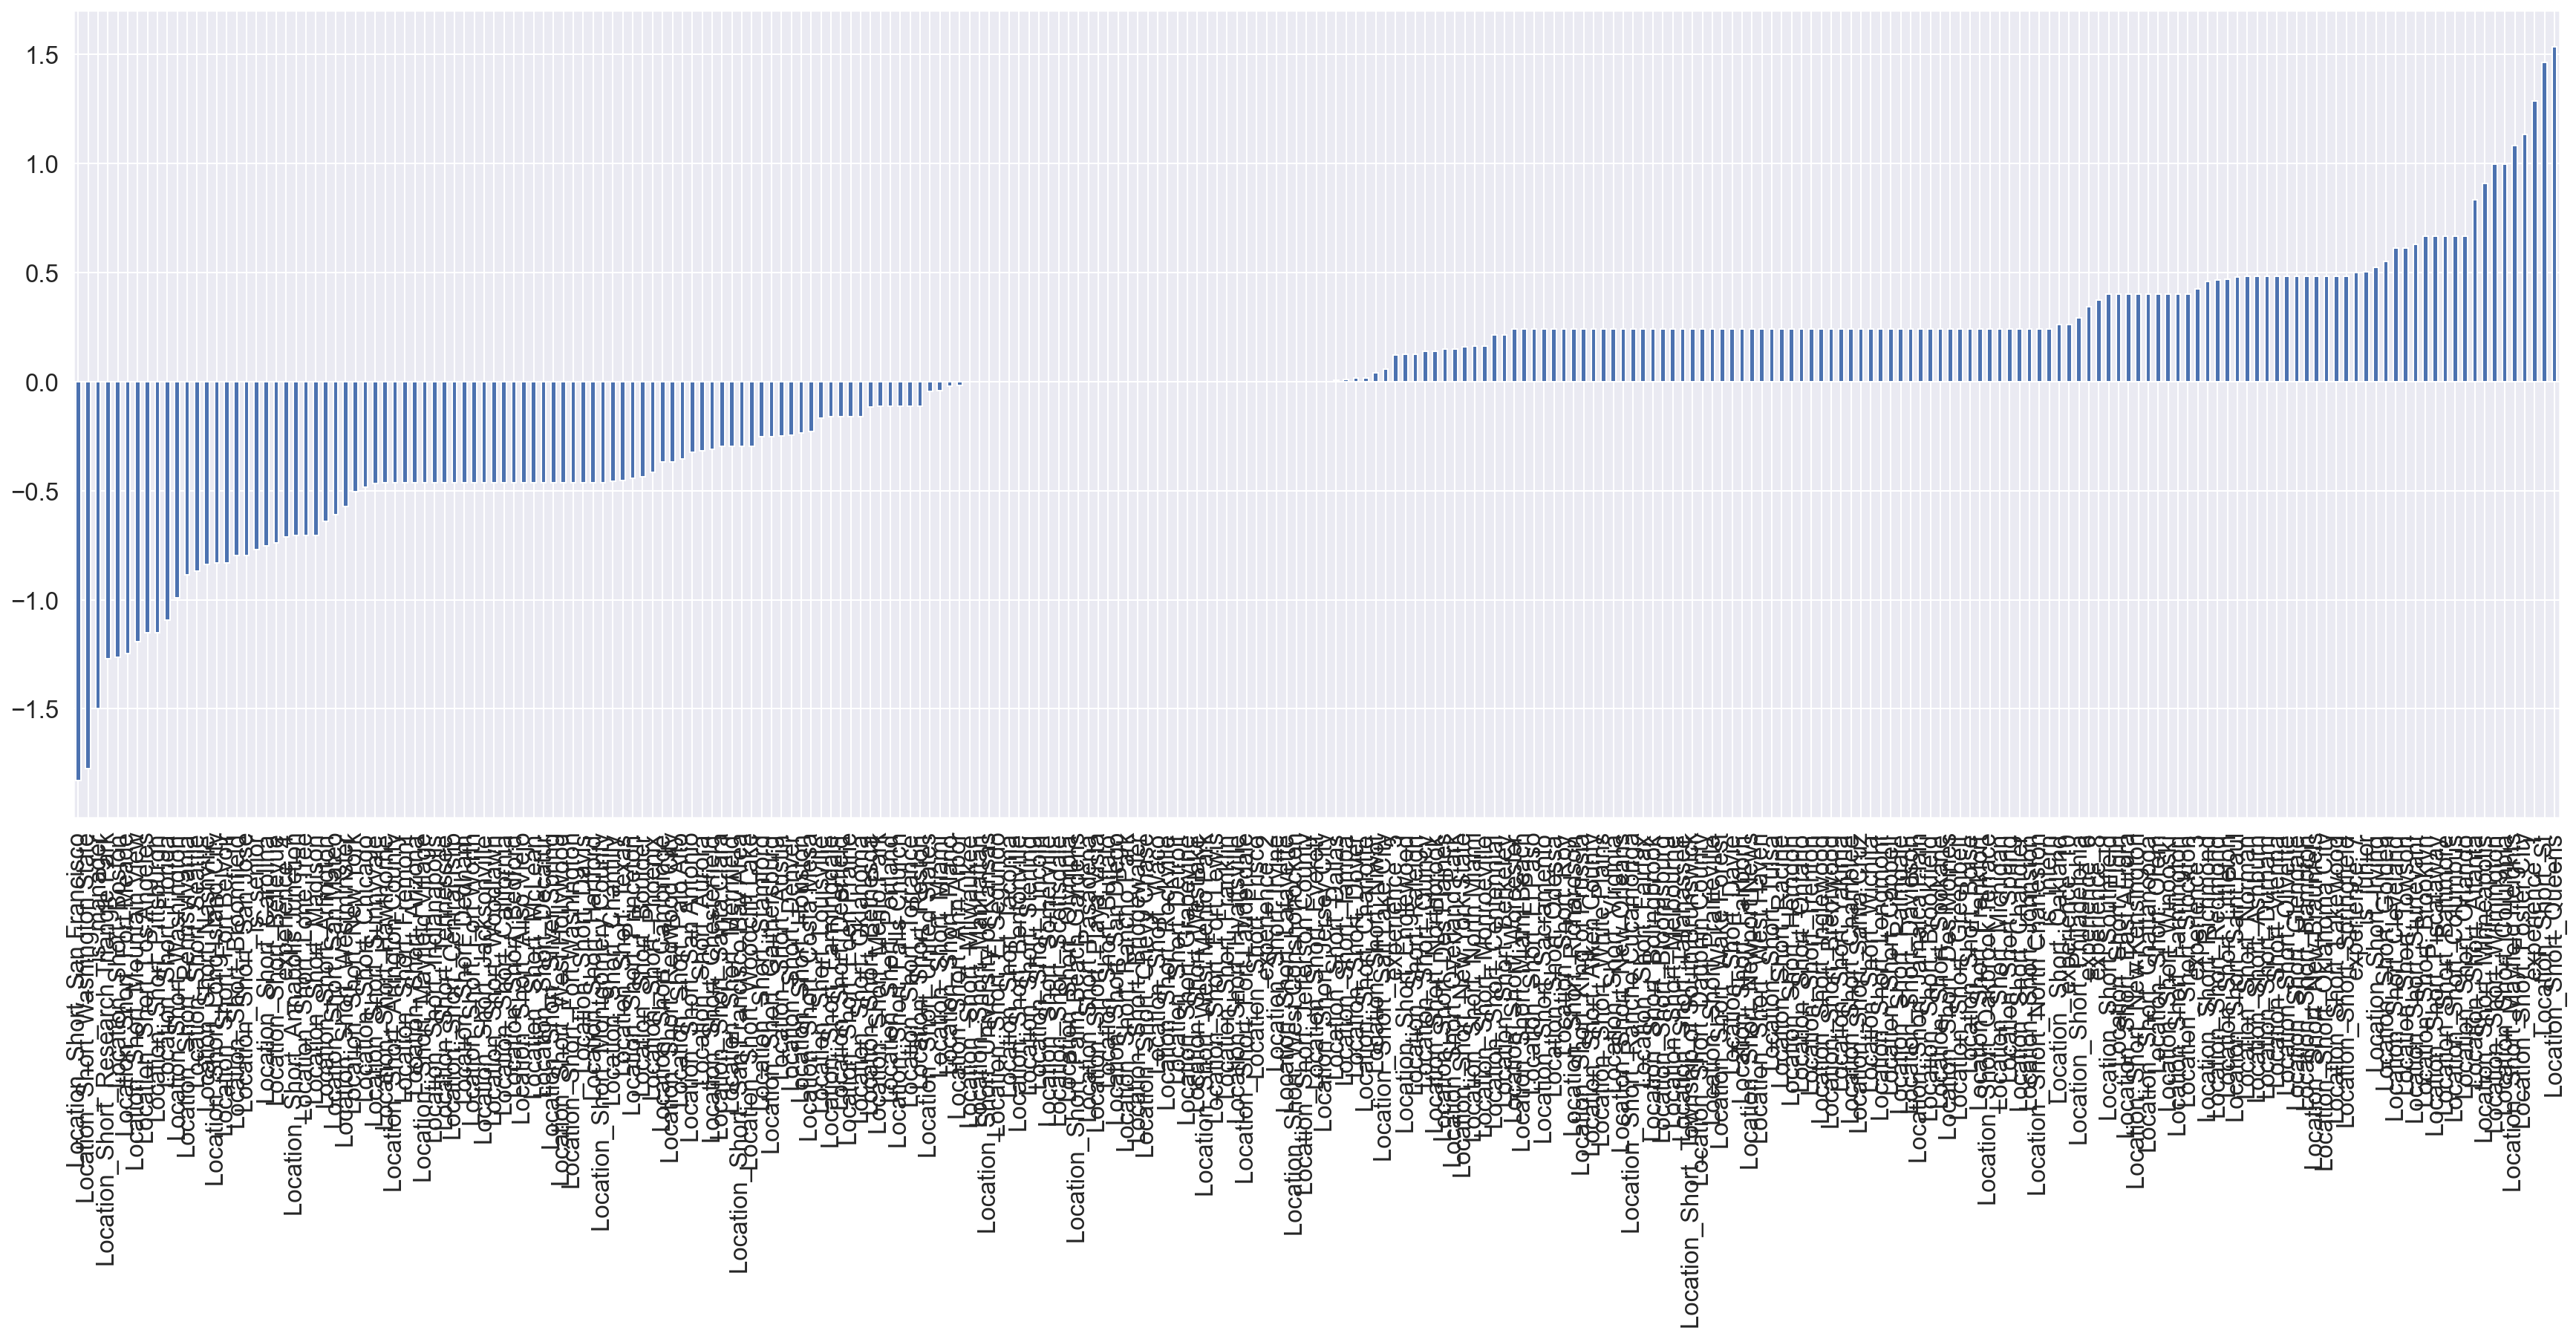

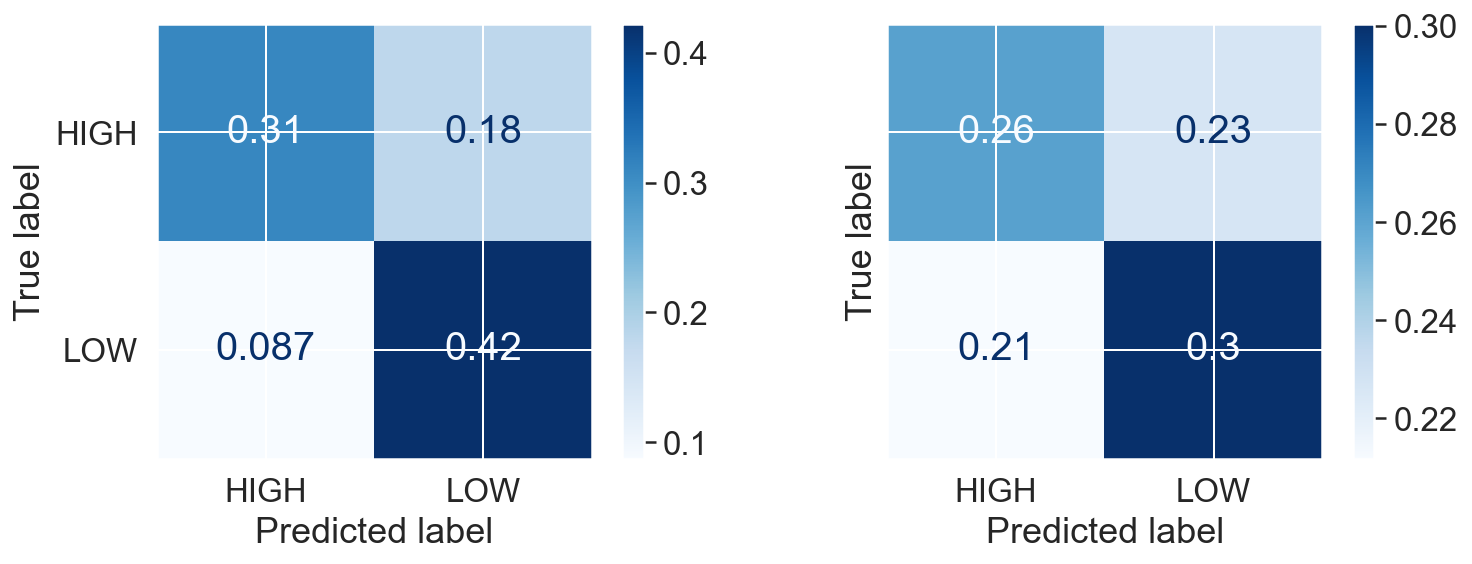

ROC Curves:


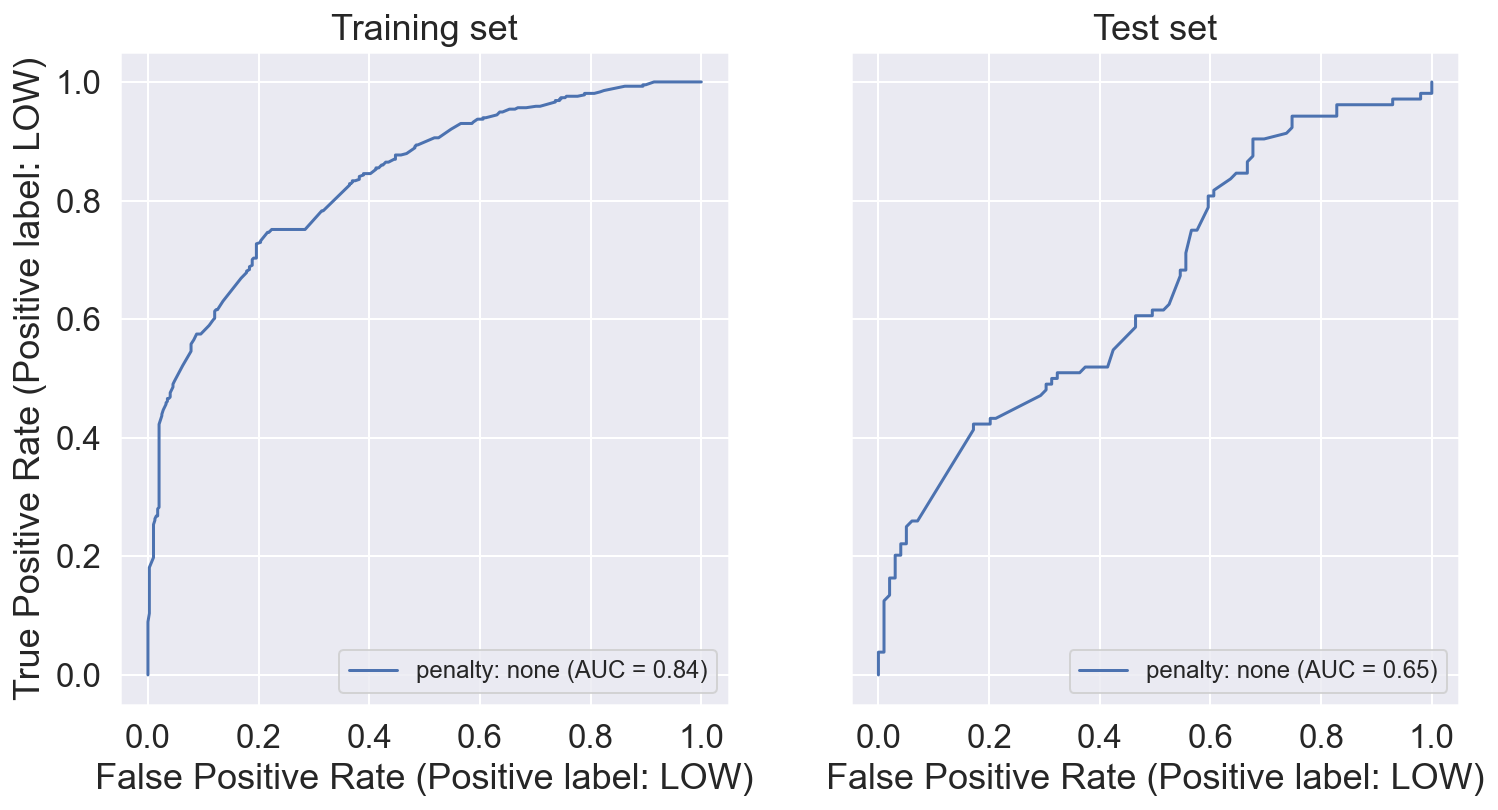

False positives rate changes with different threholds (test data):


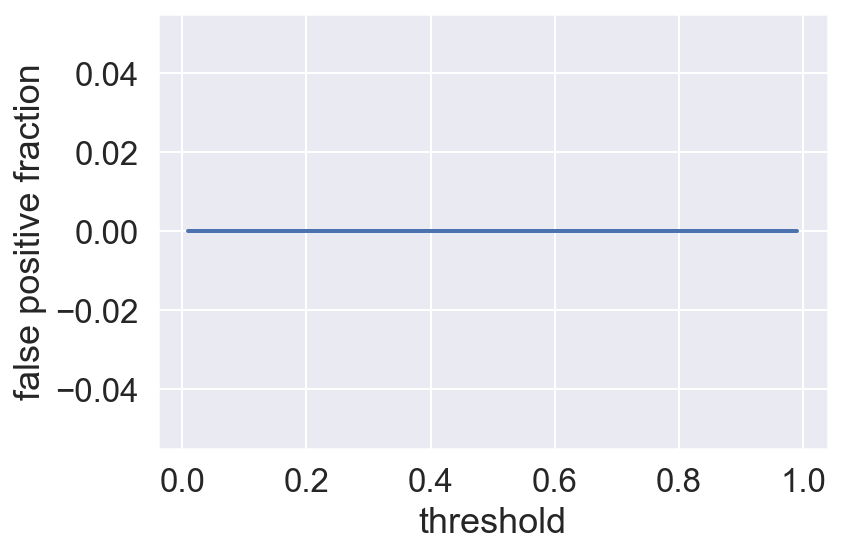

Accuracy rate changes with different threholds (test data):


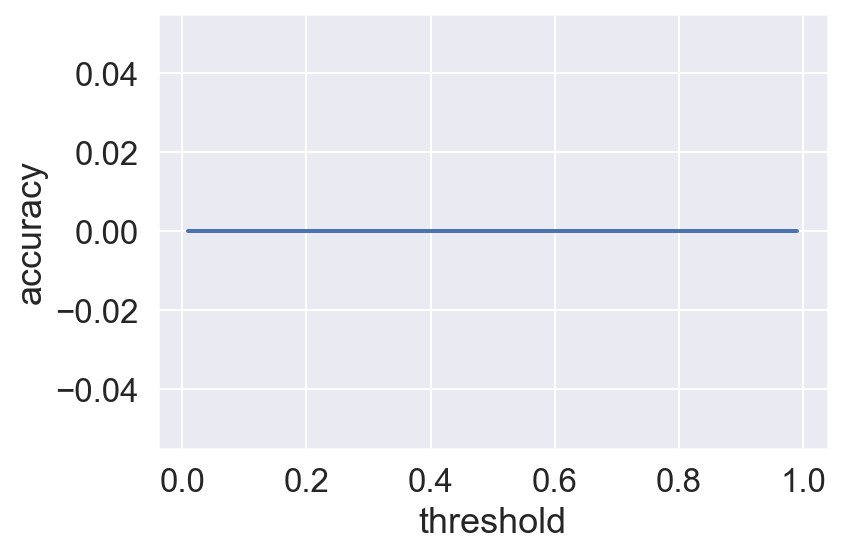

y_train classification report:
              precision    recall  f1-score   support

        HIGH       0.78      0.63      0.70       398
         LOW       0.70      0.83      0.76       414

    accuracy                           0.73       812
   macro avg       0.74      0.73      0.73       812
weighted avg       0.74      0.73      0.73       812

y_test classification report:
              precision    recall  f1-score   support

        HIGH       0.55      0.54      0.54        99
         LOW       0.57      0.59      0.58       104

    accuracy                           0.56       203
   macro avg       0.56      0.56      0.56       203
weighted avg       0.56      0.56      0.56       203



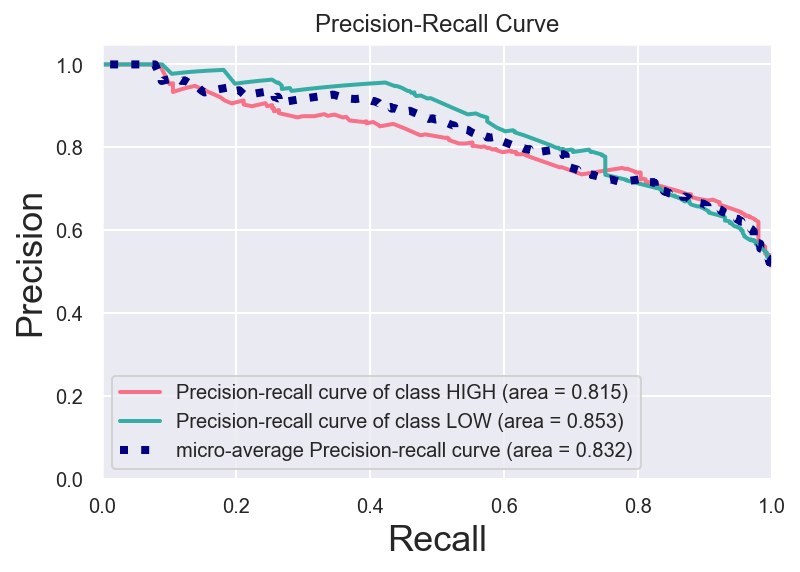

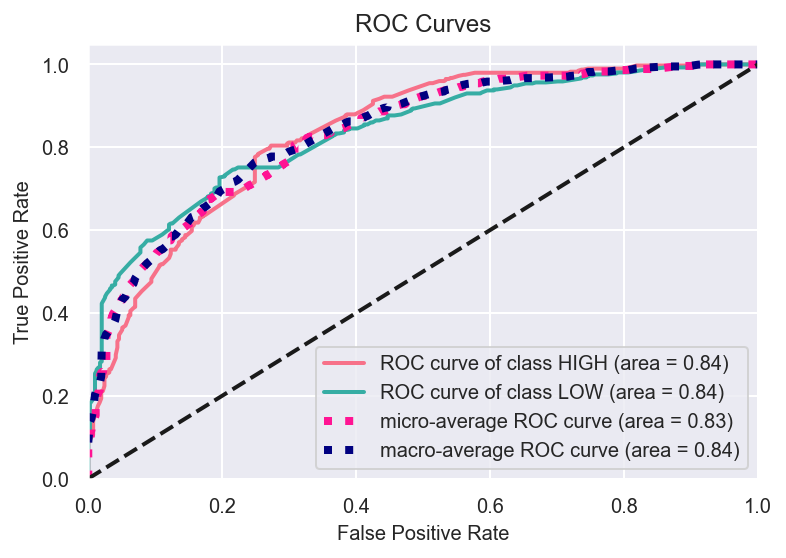

Coefficients (top 10) coefficients coef_abs 
 
 Location_Short_San Francisco 
 -1.829780 
 1.829780 
 
 
 Location_Short_Washington State 
 -1.773286 
 1.773286 
 
 
 Location_Short_Queens 
 1.535937 
 1.535937 
 
 
 is_manager 
 -1.497751 
 1.497751 
 
 
 Location_Short_St 
 1.464805 
 1.464805 
 
 
 experience_1 
 1.288284 
 1.288284 
 
 
 Location_Short_Research Triangle Park 
 -1.269315 
 1.269315 
 
 
 Location_Short_Boston 
 -1.263173 
 1.263173 
 
 
 Location_Short_Fort Meade 
 -1.247217 
 1.247217 
 
 
 Location_Short_Mountain View 
 -1.191173 
 1.191173 
 
 Model Summary LRCV knn LRCV1_Loc_Se_Ju_In 
 
 Training Score 
 0.746305 
 0.685961 
 0.732759 
 
 
 Cross-Validation 
 0.624441 
 0.578808 
 0.660085 
 
 
 Test Score 
 0.620690 
 0.645320 
 0.561576 
 
 
 C 
 [1.] 
 
 [1.] 
 
 
 L1 Ratio 
 [0.001] 
 
 [0.1] 
 
 
 K-Folds 
 5 
 5 
 5

In [49]:


# get train-test split with balance between 1s and 0s of test are kept equivalent in each test (stratify =y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=1)

# standardize the data: Note on fit_transform() --> is used on the training data so that we can scale the training 
# data and also learn the scaling parameters of that data. The model built stores the mean and variance of the 
# features of the training set. These learned parameters are then used to scale the test data.
# scaler = StandardScaler()
# X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
# X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)




### Binary logistic regression. Note would need to change solver for more classes. 


# Cs represent lambda, therefore penalty severity

LRCV1_kfolds = 5

# 10 ^-4 as alpha, then 15 intervals up to 4^10
# for multi class add --> multi_class='ovr'    and change solver to --->     'solver': ['liblinear']
LRCV1 = LogisticRegressionCV(Cs=np.logspace(-4,4,15), penalty='elasticnet', max_iter=10000, cv=5, solver='saga',
                               l1_ratios=[0.001, 0.01,0.05,0.1,0.5], n_jobs=6) # cv=LRCV1_kfolds


# fit the model
LRCV1.fit(X_train, y_train)

# get the best alpha
print(Bold + 'LRCV1 Model:' + Normal)
print('LRCV1 Best alpha:', LRCV1.C_)

# get the best l1-ratio
print('Best l1-ratio:', LRCV1.l1_ratio_)

# evaluate on the training set
print('LRCV1 CV Training score:', LRCV1.score(X_train, y_train))

# evaluate on the test set
print("LRCV1 Test Score:", LRCV1.score(X_test, y_test),'\n')

# ROC Train and test score
print('ROC Train and Test Score:', roc_auc_score(y_train, LRCV1.predict_proba(X_train)[:, 1]), 
roc_auc_score(y_test, LRCV1.predict_proba(X_test)[:, 1]))

# collect the model coefficients in a dataframe
df_coef_LRCV1 = pd.DataFrame(LRCV1.coef_[0], index=X_train.columns,
                       columns=['coefficients'])

# calculate the absolute values of the coefficients
df_coef_LRCV1['coef_abs'] = df_coef_LRCV1.coefficients.abs()
df_coef_LRCV1

## RUN X-VAL

## Get XVals score
print(Bold + 'Run X-Val:' + Normal)

# get cross validated scores
LRCV1_scores = cross_val_score(LRCV1, X_train, y_train, cv=LRCV1_kfolds, n_jobs=6)

print("ENetCV Cross-validated training scores:", LRCV1_scores)
print("ENetCV Mean cross-validated training score:", LRCV1_scores.mean(),'\n')


############################ Charts and Tables ############################

# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(LRCV1.coef_[0], index=X_train.columns,columns=['coefficients'])

# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef.sort_values(by='coef_abs', ascending = False)

# plot the magnitude of the coefficients (vertical)
fig, ax = plt.subplots(figsize=(30, 10))
df_coef['coefficients'].sort_values().plot(kind='bar')
plt.show()

# # plot the magnitude of the coefficients (horizontal)
# df_coef_ENetCV['coefficients'].sort_values().plot(kind='barh');



## Show Model Output summary
try:  
    df_scores_C # create the data frame if it doesn't already exist, otherwise just add a new column
except: 
    df_scores_C = pd.DataFrame(index= ['Training Score', 'Cross-Validation', 'Test Score', 'C', 'L1 Ratio','K-Folds'])
    LRCV1_scores_df = [LRCV1.score(X_train,y_train),LRCV1_scores.mean(), LRCV1.score(X_test, y_test), LRCV1.C_, LRCV1.l1_ratio_, LRCV1_kfolds]
    df_scores_C['LRCV1'] = LRCV1_scores_df

else: 
    LRCV1_scores_df = [LRCV1.score(X_train,y_train),LRCV1_scores.mean(), LRCV1.score(X_test, y_test), LRCV1.C_, LRCV1.l1_ratio_, LRCV1_kfolds]
    df_scores_C['LRCV1_Loc_Se_Ju_In'] = LRCV1_scores_df

# Diplay the Coefficients data frame and Model Summary dataframes side by side
df_coef_styler = df_coef.sort_values(by='coef_abs', ascending = False)[:10].style.set_table_attributes("style='display:inline'").set_caption('Coefficients (top 10)')
df_scores_styler = df_scores_C.style.set_table_attributes("style='display:inline'").set_caption('Model Summary')

# plot the confusion matrix
from sklearn.metrics import  plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve, roc_auc_score, average_precision_score
fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
plot_confusion_matrix(LRCV1, X_train, y_train, cmap='Blues', ax=ax[0], normalize='all')
plot_confusion_matrix(LRCV1, X_test, y_test, cmap='Blues', ax=ax[1], normalize='all')
for a in ax:
    texts = a.texts
    for text in texts:
        text.set_size(20)
plt.show()

# Plot the ROC Curves:

print('ROC Curves:')
fig_roc, ax_roc = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)
plot_roc_curve(LRCV1, X_train, y_train, ax=ax_roc[0], name='penalty: none')
plot_roc_curve(LRCV1, X_test, y_test, ax=ax_roc[1], name='penalty: none')
ax_roc[0].legend(loc='lower right', fontsize=12)
ax_roc[1].legend(loc='lower right', fontsize=12)
ax_roc[1].set_ylabel(None)
ax_roc[0].set_title('Training set')
ax_roc[1].set_title('Test set')
plt.show()

# plot false positive rate as threshold changed:
print('False positives rate changes with different threholds (test data):')
false_positives = []
for thresh in np.arange(1, 100)/100.:
    labeled_1 = np.array([1 if x >= thresh else 0 for x in LRCV1.predict_proba(X_test)[:, 1]])
    fp = np.mean((y_test == 0) & (labeled_1 == 1))
    false_positives.append((thresh, fp))
#     print('Threshold:', thresh, 'false positives:', fp)
false_positives = np.array(false_positives)
plt.plot(false_positives[:, 0], false_positives[:, 1], lw=2)
plt.xlabel('threshold')
plt.ylabel('false positive fraction')
plt.show()

# plot accuracy change with threshold
print('Accuracy rate changes with different threholds (test data):')
accuracies = []
for thresh in np.arange(1, 100)/100.:
    labeled_1 = np.array([1 if x >= thresh else 0 for x in LRCV1.predict_proba(X_test)[:, 1]])
    acc = np.mean(y_test==labeled_1)
    accuracies.append((thresh, acc))
#     print('Threshold:', thresh, 'Correct predictions:', acc)
accuracies = np.array(accuracies)
plt.plot(*accuracies.T, lw=2)
plt.xlabel('threshold')
plt.ylabel('accuracy')
plt.show()


# classification report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
predictions_train = LRCV1.predict(X_train)
predictions_test = LRCV1.predict(X_test)
print('y_train classification report:')
print(classification_report(y_train, predictions_train))
print('y_test classification report:')
print(classification_report(y_test, predictions_test))

# precision recall curves:
from matplotlib.colors import ListedColormap
import scikitplot as skplt
cmap = ListedColormap(sns.color_palette("husl", len(LRCV1.classes_)))
probabilities_train = LRCV1.predict_proba(X_train)
probabilities_test = LRCV1.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_train, probabilities_train, cmap=cmap)
plt.show()
skplt.metrics.plot_roc(y_train, probabilities_train, cmap=cmap)
plt.show()

from IPython.display import display_html 
display_html(df_coef_styler._repr_html_()+df_scores_styler._repr_html_(), raw=True)


Elastic net tries different L1 ratios (Lasso vs Ridge penalty) and also different alpha penalties. This will improve the final model score outputted as these parameters have been optimized. 

The new variables have added value. This can be seen in the cross val score which has increased to 0.66 from 0.62 previously. 

San Fran and Washington State continue to be the largest coefficients. Jobs in these two states tend to have higher salaries than the median. is_manager is the largest contributor from the new variables and as expected is_manager results in higher than median salaries (note the signs are opposite as commented on above). 
Experience_1 year is the next interesting coefficient and not surprisingly jobs looking for 1+ year experience tend to pay less than median. 

Try an NLP model on the job description

0.7339901477832512
Number of features: 2219
NLP CV Training score: 0.8940886699507389
NLP Test Score: 0.7339901477832512 

ROC Train and Test Score: 0.9536966232126818 0.8007964257964257
Run X-Val:


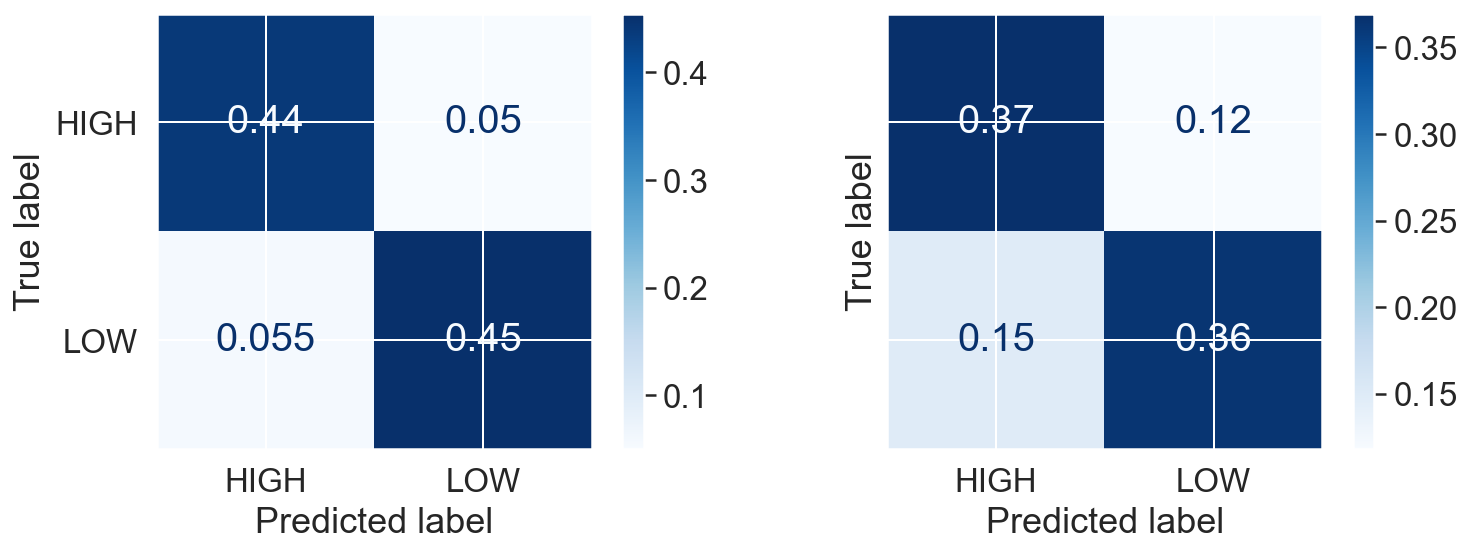

ROC Curves:


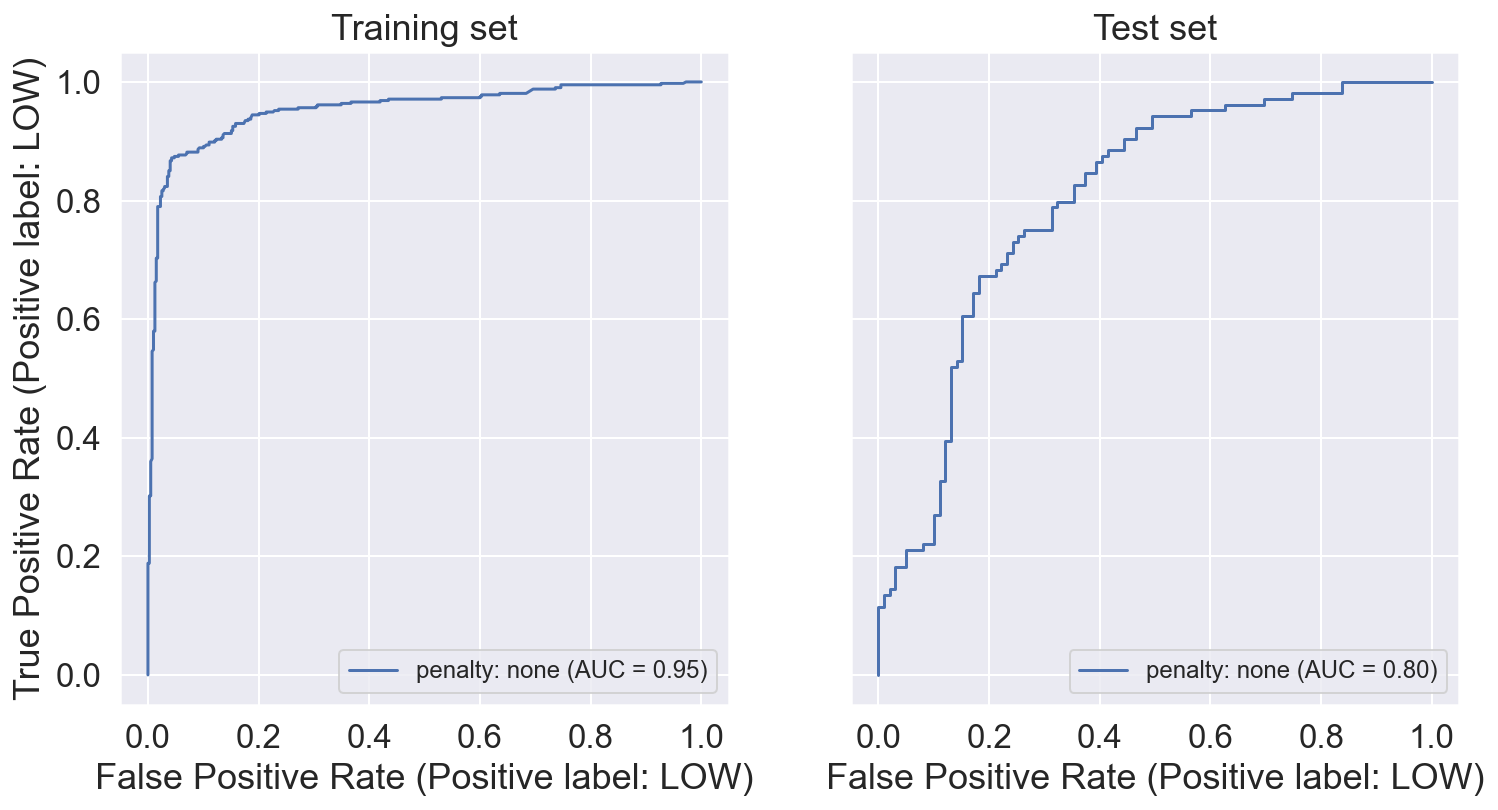

False positives rate changes with different threholds (test data):


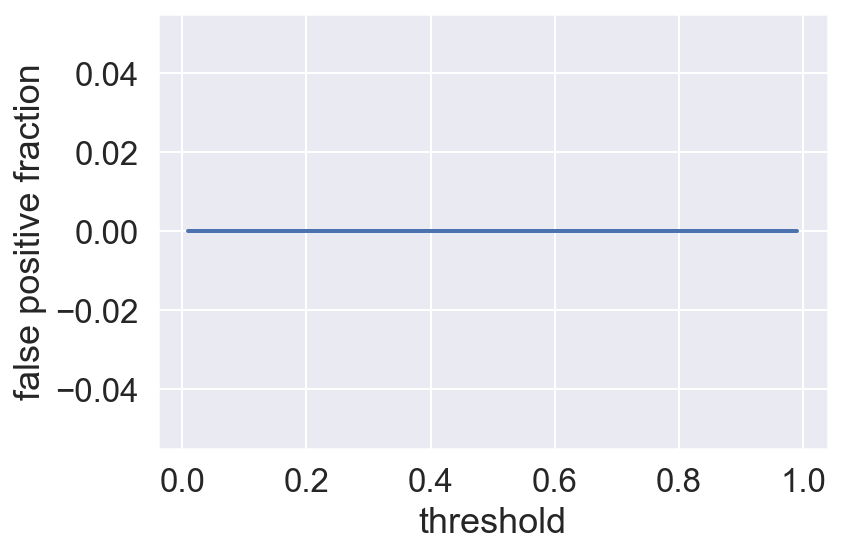

Accuracy rate changes with different threholds (test data):


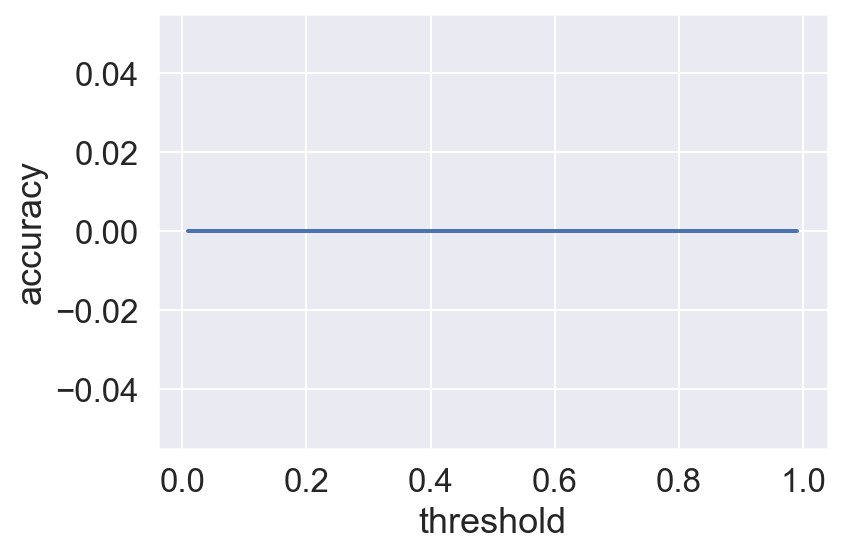

y_train classification report:
              precision    recall  f1-score   support

        HIGH       0.89      0.90      0.89       398
         LOW       0.90      0.89      0.90       414

    accuracy                           0.89       812
   macro avg       0.89      0.89      0.89       812
weighted avg       0.89      0.89      0.89       812

y_test classification report:
              precision    recall  f1-score   support

        HIGH       0.71      0.76      0.74        99
         LOW       0.76      0.71      0.73       104

    accuracy                           0.73       203
   macro avg       0.73      0.73      0.73       203
weighted avg       0.74      0.73      0.73       203



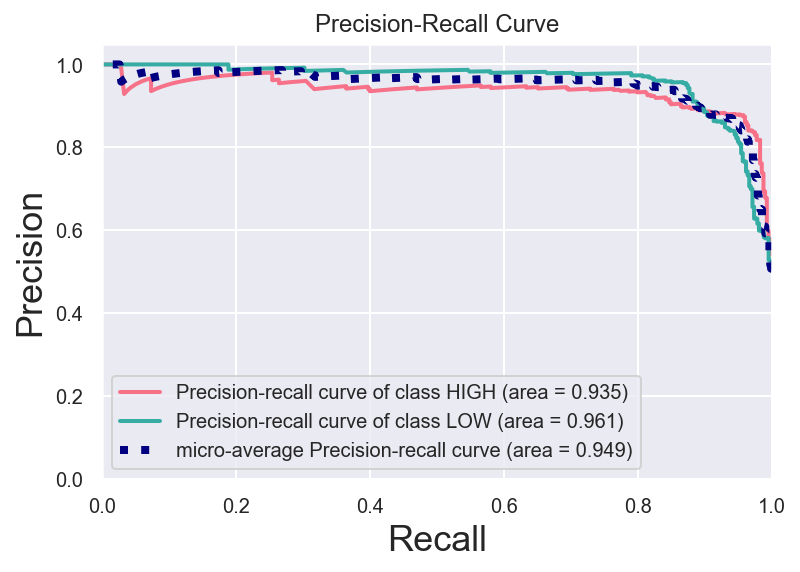

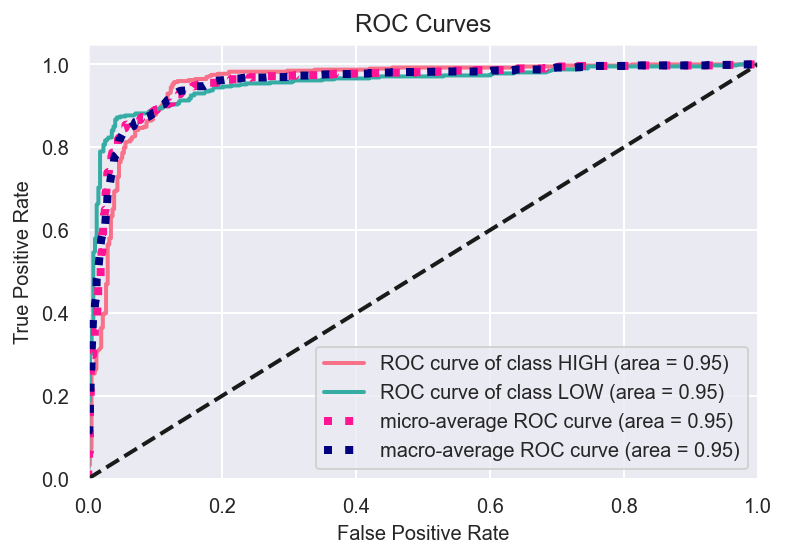

Coefficients (top 10) coefficients coef_abs 
 
 Location_Short_San Francisco 
 -1.829780 
 1.829780 
 
 
 Location_Short_Washington State 
 -1.773286 
 1.773286 
 
 
 Location_Short_Queens 
 1.535937 
 1.535937 
 
 
 is_manager 
 -1.497751 
 1.497751 
 
 
 Location_Short_St 
 1.464805 
 1.464805 
 
 
 experience_1 
 1.288284 
 1.288284 
 
 
 Location_Short_Research Triangle Park 
 -1.269315 
 1.269315 
 
 
 Location_Short_Boston 
 -1.263173 
 1.263173 
 
 
 Location_Short_Fort Meade 
 -1.247217 
 1.247217 
 
 
 Location_Short_Mountain View 
 -1.191173 
 1.191173 
 
 NLP Summary LRCV knn LRCV1_Loc_Se_Ju_In NLP 
 
 Training Score 
 0.746305 
 0.685961 
 0.732759 
 0.894089 
 
 
 Cross-Validation 
 0.624441 
 0.578808 
 0.660085 
 0.660085 
 
 
 Test Score 
 0.620690 
 0.645320 
 0.561576 
 0.733990 
 
 
 C 
 [1.] 
 
 [1.] 
 
 
 
 L1 Ratio 
 [0.001] 
 
 [0.1] 
 
 
 
 K-Folds 
 5 
 5 
 5 
 5

In [51]:
## Try NLP NLP:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

NLP_kfolds = 5 
NLP = make_pipeline(TfidfVectorizer(stop_words='english',
                                      # sublinear_tf=True,
                                      max_df=0.3,
                                      max_features=10000,
                                      norm='l2'
                                      ),
                      LogisticRegression(solver='lbfgs', multi_class='ovr'),
                      )

X = results_annual_salaries_filtered['Job Description'].copy()

# get train-test split with balance between 1s and 0s of test are kept equivalent in each test (stratify =y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=1)


NLP.fit(X_train, y_train)
y_pred = NLP.predict(X_test)
print(accuracy_score(y_test, y_pred))
print("Number of features:", len(NLP.steps[0][1].get_feature_names()))


# evaluate on the training set
print('NLP CV Training score:', NLP.score(X_train, y_train))

# evaluate on the test set
print("NLP Test Score:", NLP.score(X_test, y_test),'\n')

# ROC Train and test score
print('ROC Train and Test Score:', roc_auc_score(y_train, NLP.predict_proba(X_train)[:, 1]), 
roc_auc_score(y_test, NLP.predict_proba(X_test)[:, 1]))


## RUN X-VAL

## Get XVals score
print(Bold + 'Run X-Val:' + Normal)

# get cross validated scores
NLP_scores = cross_val_score(NLP, X_train, y_train, cv=NLP_kfolds, n_jobs=6)


############################ Charts and Tables ############################



# # plot the magnitude of the coefficients (horizontal)
# df_coef_ENetCV['coefficients'].sort_values().plot(kind='barh');



## Show NLP Output summary
try:  
    df_scores_C # create the data frame if it doesn't already exist, otherwise just add a new column
except: 
    df_scores_C = pd.DataFrame(index= ['Training Score', 'Cross-Validation', 'Test Score', 'C', 'L1 Ratio','K-Folds'])
    NLP_scores_df = [NLP.score(X_train,y_train),NLP_scores.mean(), NLP.score(X_test, y_test), "", "", NLP_kfolds]
    df_scores_C['NLP'] = NLP_scores_df

else: 
    NLP_scores_df = [NLP.score(X_train,y_train),NLP_scores.mean(), NLP.score(X_test, y_test), "", "", NLP_kfolds]
    df_scores_C['NLP'] = NLP_scores_df

# Diplay the Coefficients data frame and NLP Summary dataframes side by side
df_coef_styler = df_coef.sort_values(by='coef_abs', ascending = False)[:10].style.set_table_attributes("style='display:inline'").set_caption('Coefficients (top 10)')
df_scores_styler = df_scores_C.style.set_table_attributes("style='display:inline'").set_caption('NLP Summary')

# plot the confusion matrix
from sklearn.metrics import  plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve, roc_auc_score, average_precision_score
fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
plot_confusion_matrix(NLP, X_train, y_train, cmap='Blues', ax=ax[0], normalize='all')
plot_confusion_matrix(NLP, X_test, y_test, cmap='Blues', ax=ax[1], normalize='all')
for a in ax:
    texts = a.texts
    for text in texts:
        text.set_size(20)
plt.show()

# Plot the ROC Curves:

print('ROC Curves:')
fig_roc, ax_roc = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)
plot_roc_curve(NLP, X_train, y_train, ax=ax_roc[0], name='penalty: none')
plot_roc_curve(NLP, X_test, y_test, ax=ax_roc[1], name='penalty: none')
ax_roc[0].legend(loc='lower right', fontsize=12)
ax_roc[1].legend(loc='lower right', fontsize=12)
ax_roc[1].set_ylabel(None)
ax_roc[0].set_title('Training set')
ax_roc[1].set_title('Test set')
plt.show()

# plot false positive rate as threshold changed:
print('False positives rate changes with different threholds (test data):')
false_positives = []
for thresh in np.arange(1, 100)/100.:
    labeled_1 = np.array([1 if x >= thresh else 0 for x in NLP.predict_proba(X_test)[:, 1]])
    fp = np.mean((y_test == 0) & (labeled_1 == 1))
    false_positives.append((thresh, fp))
#     print('Threshold:', thresh, 'false positives:', fp)
false_positives = np.array(false_positives)
plt.plot(false_positives[:, 0], false_positives[:, 1], lw=2)
plt.xlabel('threshold')
plt.ylabel('false positive fraction')
plt.show()

# plot accuracy change with threshold
print('Accuracy rate changes with different threholds (test data):')
accuracies = []
for thresh in np.arange(1, 100)/100.:
    labeled_1 = np.array([1 if x >= thresh else 0 for x in NLP.predict_proba(X_test)[:, 1]])
    acc = np.mean(y_test==labeled_1)
    accuracies.append((thresh, acc))
#     print('Threshold:', thresh, 'Correct predictions:', acc)
accuracies = np.array(accuracies)
plt.plot(*accuracies.T, lw=2)
plt.xlabel('threshold')
plt.ylabel('accuracy')
plt.show()


# classification report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
predictions_train = NLP.predict(X_train)
predictions_test = NLP.predict(X_test)
print('y_train classification report:')
print(classification_report(y_train, predictions_train))
print('y_test classification report:')
print(classification_report(y_test, predictions_test))

# precision recall curves:
from matplotlib.colors import ListedColormap
import scikitplot as skplt
cmap = ListedColormap(sns.color_palette("husl", len(NLP.classes_)))
probabilities_train = NLP.predict_proba(X_train)
probabilities_test = NLP.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_train, probabilities_train, cmap=cmap)
plt.show()
skplt.metrics.plot_roc(y_train, probabilities_train, cmap=cmap)
plt.show()

from IPython.display import display_html 
display_html(df_coef_styler._repr_html_()+df_scores_styler._repr_html_(), raw=True)


NLP model has similar performance with 0.66 cross val score which is in line with the LRCV with the additional variables. It does however perform better in the test. Note that the training score is much higher in NLP than the actual cross val. 

0.7241379310344828
Number of features: 2348
NLP_NOSTOP CV Training score: 0.9002463054187192
NLP_NOSTOP Test Score: 0.7241379310344828 

ROC Train and Test Score: 0.9566097395188504 0.7984654234654234
Run X-Val:


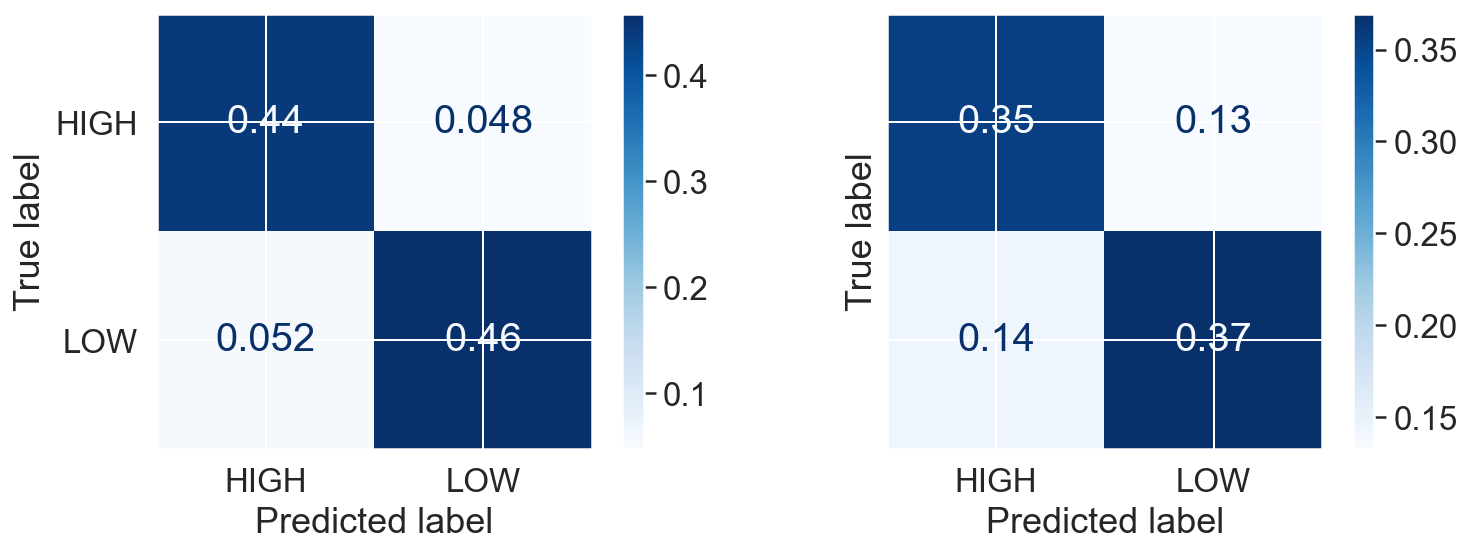

ROC Curves:


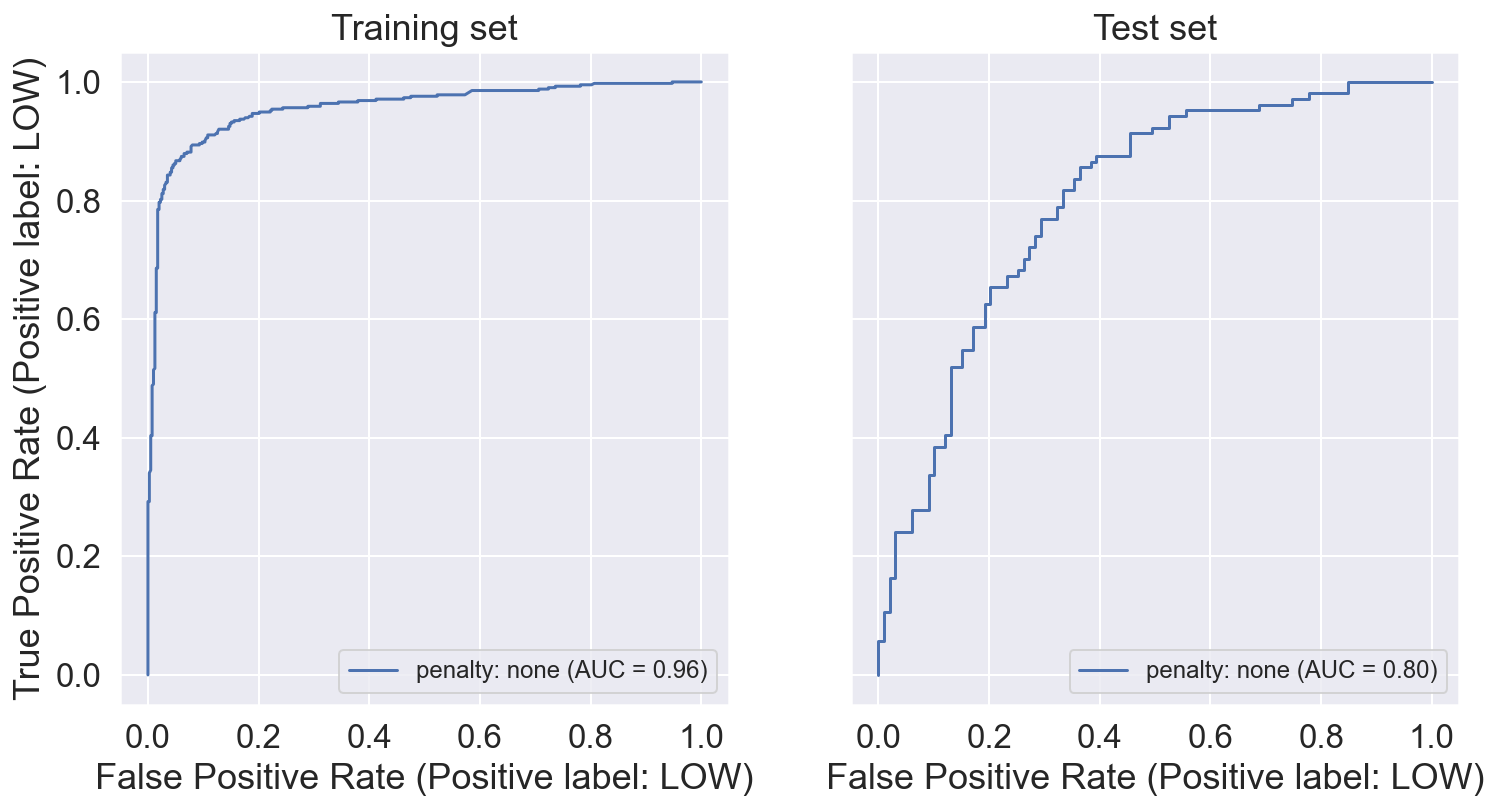

False positives rate changes with different threholds (test data):


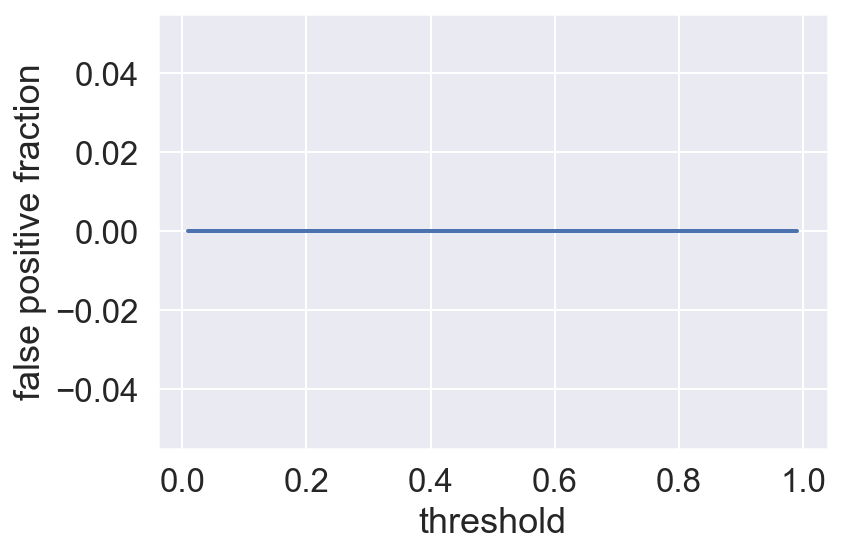

Accuracy rate changes with different threholds (test data):


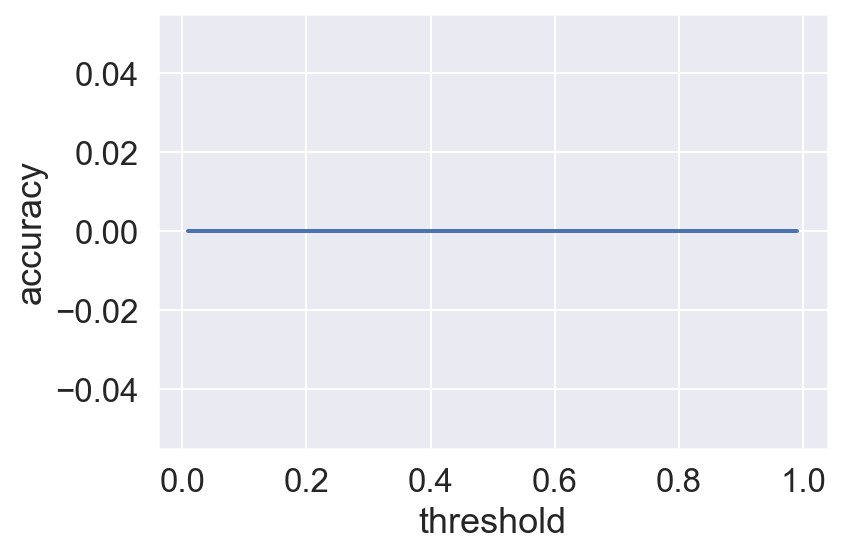

y_train classification report:
              precision    recall  f1-score   support

        HIGH       0.90      0.90      0.90       398
         LOW       0.91      0.90      0.90       414

    accuracy                           0.90       812
   macro avg       0.90      0.90      0.90       812
weighted avg       0.90      0.90      0.90       812

y_test classification report:
              precision    recall  f1-score   support

        HIGH       0.71      0.73      0.72        99
         LOW       0.74      0.72      0.73       104

    accuracy                           0.72       203
   macro avg       0.72      0.72      0.72       203
weighted avg       0.72      0.72      0.72       203



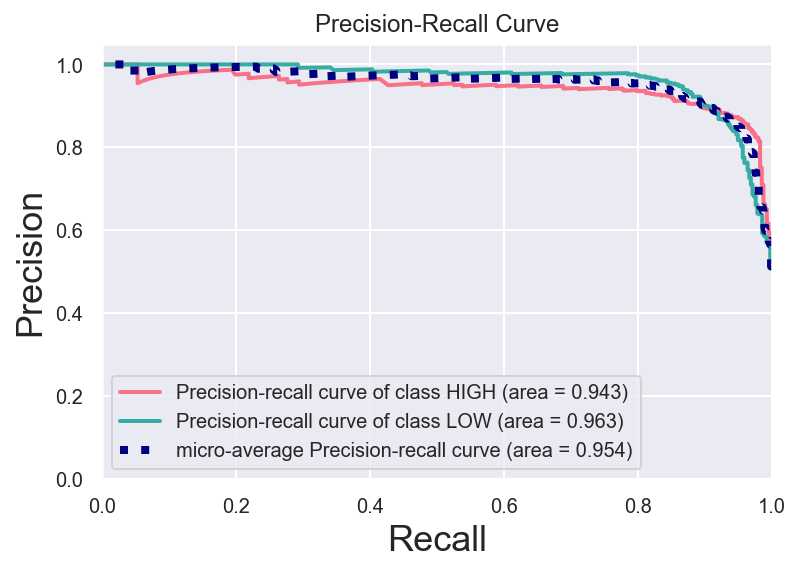

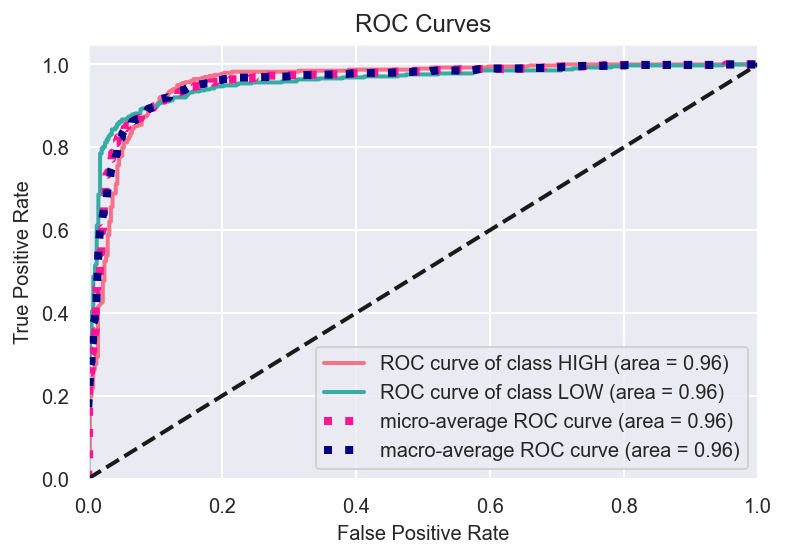

Coefficients (top 10) coefficients coef_abs 
 
 Location_Short_San Francisco 
 -1.829780 
 1.829780 
 
 
 Location_Short_Washington State 
 -1.773286 
 1.773286 
 
 
 Location_Short_Queens 
 1.535937 
 1.535937 
 
 
 is_manager 
 -1.497751 
 1.497751 
 
 
 Location_Short_St 
 1.464805 
 1.464805 
 
 
 experience_1 
 1.288284 
 1.288284 
 
 
 Location_Short_Research Triangle Park 
 -1.269315 
 1.269315 
 
 
 Location_Short_Boston 
 -1.263173 
 1.263173 
 
 
 Location_Short_Fort Meade 
 -1.247217 
 1.247217 
 
 
 Location_Short_Mountain View 
 -1.191173 
 1.191173 
 
 NLP_NOSTOP Summary LRCV knn LRCV1_Loc_Se_Ju_In NLP NLP_NOSTOP 
 
 Training Score 
 0.746305 
 0.685961 
 0.732759 
 0.894089 
 0.900246 
 
 
 Cross-Validation 
 0.624441 
 0.578808 
 0.660085 
 0.660085 
 0.667492 
 
 
 Test Score 
 0.620690 
 0.645320 
 0.561576 
 0.733990 
 0.724138 
 
 
 C 
 [1.] 
 
 [1.] 
 
 
 
 
 L1 Ratio 
 [0.001] 
 
 [0.1] 
 
 
 
 
 K-Folds 
 5 
 5 
 5 
 5 
 5

In [54]:
### Try again but with English STOP words included


## Try NLP_NOSTOP NLP_NOSTOP :

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

NLP_NOSTOP_kfolds = 5 
NLP_NOSTOP = make_pipeline(TfidfVectorizer(# sublinear_tf=True,
                                      max_df=0.3,
                                      max_features=10000,
                                      norm='l2'
                                      ),
                      LogisticRegression(solver='lbfgs', multi_class='ovr'),
                      )

X = results_annual_salaries_filtered['Job Description'].copy()

# get train-test split with balance between 1s and 0s of test are kept equivalent in each test (stratify =y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=1)


NLP_NOSTOP.fit(X_train, y_train)
y_pred = NLP_NOSTOP .predict(X_test)
print(accuracy_score(y_test, y_pred))
print("Number of features:", len(NLP_NOSTOP .steps[0][1].get_feature_names()))


# evaluate on the training set
print('NLP_NOSTOP CV Training score:', NLP_NOSTOP.score(X_train, y_train))

# evaluate on the test set
print("NLP_NOSTOP Test Score:", NLP_NOSTOP.score(X_test, y_test),'\n')

# ROC Train and test score
print('ROC Train and Test Score:', roc_auc_score(y_train, NLP_NOSTOP.predict_proba(X_train)[:, 1]), 
roc_auc_score(y_test, NLP_NOSTOP.predict_proba(X_test)[:, 1]))


## RUN X-VAL

## Get XVals score
print(Bold + 'Run X-Val:' + Normal)

# get cross validated scores
NLP_NOSTOP_scores = cross_val_score(NLP_NOSTOP, X_train, y_train, cv=NLP_NOSTOP_kfolds, n_jobs=6)


############################ Charts and Tables ############################



# # plot the magnitude of the coefficients (horizontal)
# df_coef_ENetCV['coefficients'].sort_values().plot(kind='barh');



## Show NLP_NOSTOP  Output summary
try:  
    df_scores_C # create the data frame if it doesn't already exist, otherwise just add a new column
except: 
    df_scores_C = pd.DataFrame(index= ['Training Score', 'Cross-Validation', 'Test Score', 'C', 'L1 Ratio','K-Folds'])
    NLP_NOSTOP_scores_df = [NLP_NOSTOP.score(X_train,y_train),NLP_NOSTOP_scores.mean(), NLP_NOSTOP.score(X_test, y_test), "", "", NLP_NOSTOP_kfolds]
    df_scores_C['NLP_NOSTOP'] = NLP_NOSTOP_scores_df

else: 
    NLP_NOSTOP_scores_df = [NLP_NOSTOP.score(X_train,y_train),NLP_NOSTOP_scores.mean(), NLP_NOSTOP.score(X_test, y_test), "", "", NLP_NOSTOP_kfolds]
    df_scores_C['NLP_NOSTOP'] = NLP_NOSTOP_scores_df

# Diplay the Coefficients data frame and NLP_NOSTOP  Summary dataframes side by side
df_coef_styler = df_coef.sort_values(by='coef_abs', ascending = False)[:10].style.set_table_attributes("style='display:inline'").set_caption('Coefficients (top 10)')
df_scores_styler = df_scores_C.style.set_table_attributes("style='display:inline'").set_caption('NLP_NOSTOP  Summary')

# plot the confusion matrix
from sklearn.metrics import  plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve, roc_auc_score, average_precision_score
fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
plot_confusion_matrix(NLP_NOSTOP, X_train, y_train, cmap='Blues', ax=ax[0], normalize='all')
plot_confusion_matrix(NLP_NOSTOP, X_test, y_test, cmap='Blues', ax=ax[1], normalize='all')
for a in ax:
    texts = a.texts
    for text in texts:
        text.set_size(20)
plt.show()

# Plot the ROC Curves:

print('ROC Curves:')
fig_roc, ax_roc = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)
plot_roc_curve(NLP_NOSTOP, X_train, y_train, ax=ax_roc[0], name='penalty: none')
plot_roc_curve(NLP_NOSTOP, X_test, y_test, ax=ax_roc[1], name='penalty: none')
ax_roc[0].legend(loc='lower right', fontsize=12)
ax_roc[1].legend(loc='lower right', fontsize=12)
ax_roc[1].set_ylabel(None)
ax_roc[0].set_title('Training set')
ax_roc[1].set_title('Test set')
plt.show()

# plot false positive rate as threshold changed:
print('False positives rate changes with different threholds (test data):')
false_positives = []
for thresh in np.arange(1, 100)/100.:
    labeled_1 = np.array([1 if x >= thresh else 0 for x in NLP_NOSTOP.predict_proba(X_test)[:, 1]])
    fp = np.mean((y_test == 0) & (labeled_1 == 1))
    false_positives.append((thresh, fp))
#     print('Threshold:', thresh, 'false positives:', fp)
false_positives = np.array(false_positives)
plt.plot(false_positives[:, 0], false_positives[:, 1], lw=2)
plt.xlabel('threshold')
plt.ylabel('false positive fraction')
plt.show()

# plot accuracy change with threshold
print('Accuracy rate changes with different threholds (test data):')
accuracies = []
for thresh in np.arange(1, 100)/100.:
    labeled_1 = np.array([1 if x >= thresh else 0 for x in NLP_NOSTOP.predict_proba(X_test)[:, 1]])
    acc = np.mean(y_test==labeled_1)
    accuracies.append((thresh, acc))
#     print('Threshold:', thresh, 'Correct predictions:', acc)
accuracies = np.array(accuracies)
plt.plot(*accuracies.T, lw=2)
plt.xlabel('threshold')
plt.ylabel('accuracy')
plt.show()


# classification report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
predictions_train = NLP_NOSTOP.predict(X_train)
predictions_test = NLP_NOSTOP.predict(X_test)
print('y_train classification report:')
print(classification_report(y_train, predictions_train))
print('y_test classification report:')
print(classification_report(y_test, predictions_test))

# precision recall curves:
from matplotlib.colors import ListedColormap
import scikitplot as skplt
cmap = ListedColormap(sns.color_palette("husl", len(NLP_NOSTOP.classes_)))
probabilities_train = NLP_NOSTOP.predict_proba(X_train)
probabilities_test = NLP_NOSTOP.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_train, probabilities_train, cmap=cmap)
plt.show()
skplt.metrics.plot_roc(y_train, probabilities_train, cmap=cmap)
plt.show()

from IPython.display import display_html 
display_html(df_coef_styler._repr_html_()+df_scores_styler._repr_html_(), raw=True)


In [ ]:
# including STOP words marginally increased the cross val score. This makes sense as some stop words such as 'over' could
# provide some information on salary. 


In [55]:
# finally use the SKILearn code that runs all the models:

import logging
import numpy as np
from optparse import OptionParser
import sys
from time import time
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics


# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format="%(asctime)s %(levelname)s %(message)s")

op = OptionParser()
op.add_option(
    "--report",
    action="store_true",
    dest="print_report",
    help="Print a detailed classification report.",
)
op.add_option(
    "--chi2_select",
    action="store",
    type="int",
    dest="select_chi2",
    help="Select some number of features using a chi-squared test",
)
op.add_option(
    "--confusion_matrix",
    action="store_true",
    dest="print_cm",
    help="Print the confusion matrix.",
)
op.add_option(
    "--top10",
    action="store_true",
    dest="print_top10",
    help="Print ten most discriminative terms per class for every classifier.",
)
op.add_option(
    "--all_categories",
    action="store_true",
    dest="all_categories",
    help="Whether to use all categories or not.",
)
op.add_option("--use_hashing", action="store_true", help="Use a hashing vectorizer.")
op.add_option(
    "--n_features",
    action="store",
    type=int,
    default=2 ** 16,
    help="n_features when using the hashing vectorizer.",
)
op.add_option(
    "--filtered",
    action="store_true",
    help=(
        "Remove newsgroup information that is easily overfit: "
        "headers, signatures, and quoting."
    ),
)


def is_interactive():
    return not hasattr(sys.modules["__main__"], "__file__")


# work-around for Jupyter notebook and IPython console
argv = [] if is_interactive() else sys.argv[1:]
(opts, args) = op.parse_args(argv)
if len(args) > 0:
    op.error("this script takes no arguments.")
    sys.exit(1)

print(__doc__)
op.print_help()
print()


Automatically created module for IPython interactive environment
Usage: ipykernel_launcher.py [options]

Options:
  -h, --help            show this help message and exit
  --report              Print a detailed classification report.
  --chi2_select=SELECT_CHI2
                        Select some number of features using a chi-squared
                        test
  --confusion_matrix    Print the confusion matrix.
  --top10               Print ten most discriminative terms per class for
                        every classifier.
  --all_categories      Whether to use all categories or not.
  --use_hashing         Use a hashing vectorizer.
  --n_features=N_FEATURES
                        n_features when using the hashing vectorizer.
  --filtered            Remove newsgroup information that is easily overfit:
                        headers, signatures, and quoting.



In [56]:
y_train.unique()

array(['HIGH', 'LOW'], dtype=object)

In [57]:


# data_train = fetch_20newsgroups(
#     subset="train", categories=categories, shuffle=True, random_state=42, remove=remove
# )

# data_test = fetch_20newsgroups(
#     subset="test", categories=categories, shuffle=True, random_state=42, remove=remove
# )

# print("data loaded")

# order of labels in `target_names` can be different from `categories`
target_names = y_train.unique()


def size_mb(docs):
    return sum(len(s.encode("utf-8")) for s in docs) / 1e6


data_train_size_mb = size_mb(X_train)
data_test_size_mb = size_mb(X_test)

print(
    "%d documents - %0.3fMB (training set)" % (len(X_train), data_train_size_mb)
)
print("%d documents - %0.3fMB (test set)" % (len(X_test), data_test_size_mb))
print("%d categories" % len(target_names))
print()

# # split a training set and a test set
# y_train, y_test = data_train.target, data_test.target

print("Extracting features from the training data using a sparse vectorizer")
t0 = time()
if opts.use_hashing:
    vectorizer = HashingVectorizer(
        stop_words="english", alternate_sign=False, n_features=opts.n_features
    )
    X_train = vectorizer.transform(X_train)
else:
    vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words="english")
    X_train = vectorizer.fit_transform(X_train)
duration = time() - t0
print("done in %fs at %0.3fMB/s" % (duration, data_train_size_mb / duration))
print("n_samples: %d, n_features: %d" % X_train.shape)
print()

print("Extracting features from the test data using the same vectorizer")
t0 = time()
X_test = vectorizer.transform(X_test)
duration = time() - t0
print("done in %fs at %0.3fMB/s" % (duration, data_test_size_mb / duration))
print("n_samples: %d, n_features: %d" % X_test.shape)
print()

# mapping from integer feature name to original token string
if opts.use_hashing:
    feature_names = None
else:
    feature_names = vectorizer.get_feature_names()

if opts.select_chi2:
    print("Extracting %d best features by a chi-squared test" % opts.select_chi2)
    t0 = time()
    ch2 = SelectKBest(chi2, k=opts.select_chi2)
    X_train = ch2.fit_transform(X_train, y_train)
    X_test = ch2.transform(X_test)
    if feature_names is not None:
        # keep selected feature names
        feature_names = feature_names[ch2.get_support()]
    print("done in %fs" % (time() - t0))
    print()


def trim(s):
    """Trim string to fit on terminal (assuming 80-column display)"""
    return s if len(s) <= 80 else s[:77] + "..."

812 documents - 0.126MB (training set)
203 documents - 0.031MB (test set)
2 categories

Extracting features from the training data using a sparse vectorizer
done in 0.023776s at 5.315MB/s
n_samples: 812, n_features: 2219

Extracting features from the test data using the same vectorizer
done in 0.006508s at 4.837MB/s
n_samples: 203, n_features: 2219



In [58]:
def benchmark(clf):
    print("_" * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)
    
    
    if hasattr(clf, "coef_"):
        print("dimensionality: %d" % clf.coef_.shape[1])
        print("density: %f" % density(clf.coef_))

        if opts.print_top10 and feature_names is not None:
            print("top 10 keywords per class:")
            for i, label in enumerate(target_names):
                top10 = np.argsort(clf.coef_[i])[-10:]
                print(trim("%s: %s" % (label, " ".join(feature_names[top10]))))
        print()

    if opts.print_report:
        print("classification report:")
        print(metrics.classification_report(y_test, pred, target_names=target_names))

    if opts.print_cm:
        print("confusion matrix:")
        print(metrics.confusion_matrix(y_test, pred))

    print()
    clf_descr = str(clf).split("(")[0]
    return clf_descr, score, train_time, test_time


results = []
for clf, name in (
    (RidgeClassifier(tol=1e-2, solver="sag"), "Ridge Classifier"),
    (Perceptron(max_iter=50), "Perceptron"),
    (PassiveAggressiveClassifier(max_iter=50), "Passive-Aggressive"),
    (KNeighborsClassifier(n_neighbors=10), "kNN"),
    (RandomForestClassifier(), "Random forest"),
):
    print("=" * 80)
    print(name)
    results.append(benchmark(clf))

for penalty in ["l2", "l1"]:
    print("=" * 80)
    print("%s penalty" % penalty.upper())
    # Train Liblinear model
    results.append(benchmark(LinearSVC(penalty=penalty, dual=False, tol=1e-3)))

    # Train SGD model
    results.append(benchmark(SGDClassifier(alpha=0.0001, max_iter=50, penalty=penalty)))

# Train SGD with Elastic Net penalty
print("=" * 80)
print("Elastic-Net penalty")
results.append(
    benchmark(SGDClassifier(alpha=0.0001, max_iter=50, penalty="elasticnet"))
)

# Train NearestCentroid without threshold
print("=" * 80)
print("NearestCentroid (aka Rocchio classifier)")
results.append(benchmark(NearestCentroid()))

# Train sparse Naive Bayes classifiers
print("=" * 80)
print("Naive Bayes")
results.append(benchmark(MultinomialNB(alpha=0.01)))
results.append(benchmark(BernoulliNB(alpha=0.01)))
results.append(benchmark(ComplementNB(alpha=0.1)))

print("=" * 80)
print("LinearSVC with L1-based feature selection")
# The smaller C, the stronger the regularization.
# The more regularization, the more sparsity.
results.append(
    benchmark(
        Pipeline(
            [
                (
                    "feature_selection",
                    SelectFromModel(LinearSVC(penalty="l1", dual=False, tol=1e-3)),
                ),
                ("classification", LinearSVC(penalty="l2")),
            ]
        )
    )
)

Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(solver='sag', tol=0.01)
train time: 0.011s
test time:  0.000s
accuracy:   0.729
dimensionality: 2219
density: 1.000000


Perceptron
________________________________________________________________________________
Training: 
Perceptron(max_iter=50)
train time: 0.002s
test time:  0.000s
accuracy:   0.690
dimensionality: 2219
density: 0.834610


Passive-Aggressive
________________________________________________________________________________
Training: 
PassiveAggressiveClassifier(max_iter=50)
train time: 0.004s
test time:  0.000s
accuracy:   0.690
dimensionality: 2219
density: 0.995043


kNN
________________________________________________________________________________
Training: 
KNeighborsClassifier(n_neighbors=10)
train time: 0.001s
test time:  0.012s
accuracy:   0.660

Random forest
_____________________________________________________________________________

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:555: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  warnings.warn(


train time: 0.334s
test time:  0.017s
accuracy:   0.734

L2 penalty
________________________________________________________________________________
Training: 
LinearSVC(dual=False, tol=0.001)
train time: 0.003s
test time:  0.000s
accuracy:   0.724
dimensionality: 2219
density: 1.000000


________________________________________________________________________________
Training: 
SGDClassifier(max_iter=50)
train time: 0.002s
test time:  0.000s
accuracy:   0.695
dimensionality: 2219
density: 0.954935


L1 penalty
________________________________________________________________________________
Training: 
LinearSVC(dual=False, penalty='l1', tol=0.001)
train time: 0.004s
test time:  0.000s
accuracy:   0.724
dimensionality: 2219
density: 0.141505


________________________________________________________________________________
Training: 
SGDClassifier(max_iter=50, penalty='l1')
train time: 0.004s
test time:  0.000s
accuracy:   0.700
dimensionality: 2219
density: 0.466426


Elastic-Net penal

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


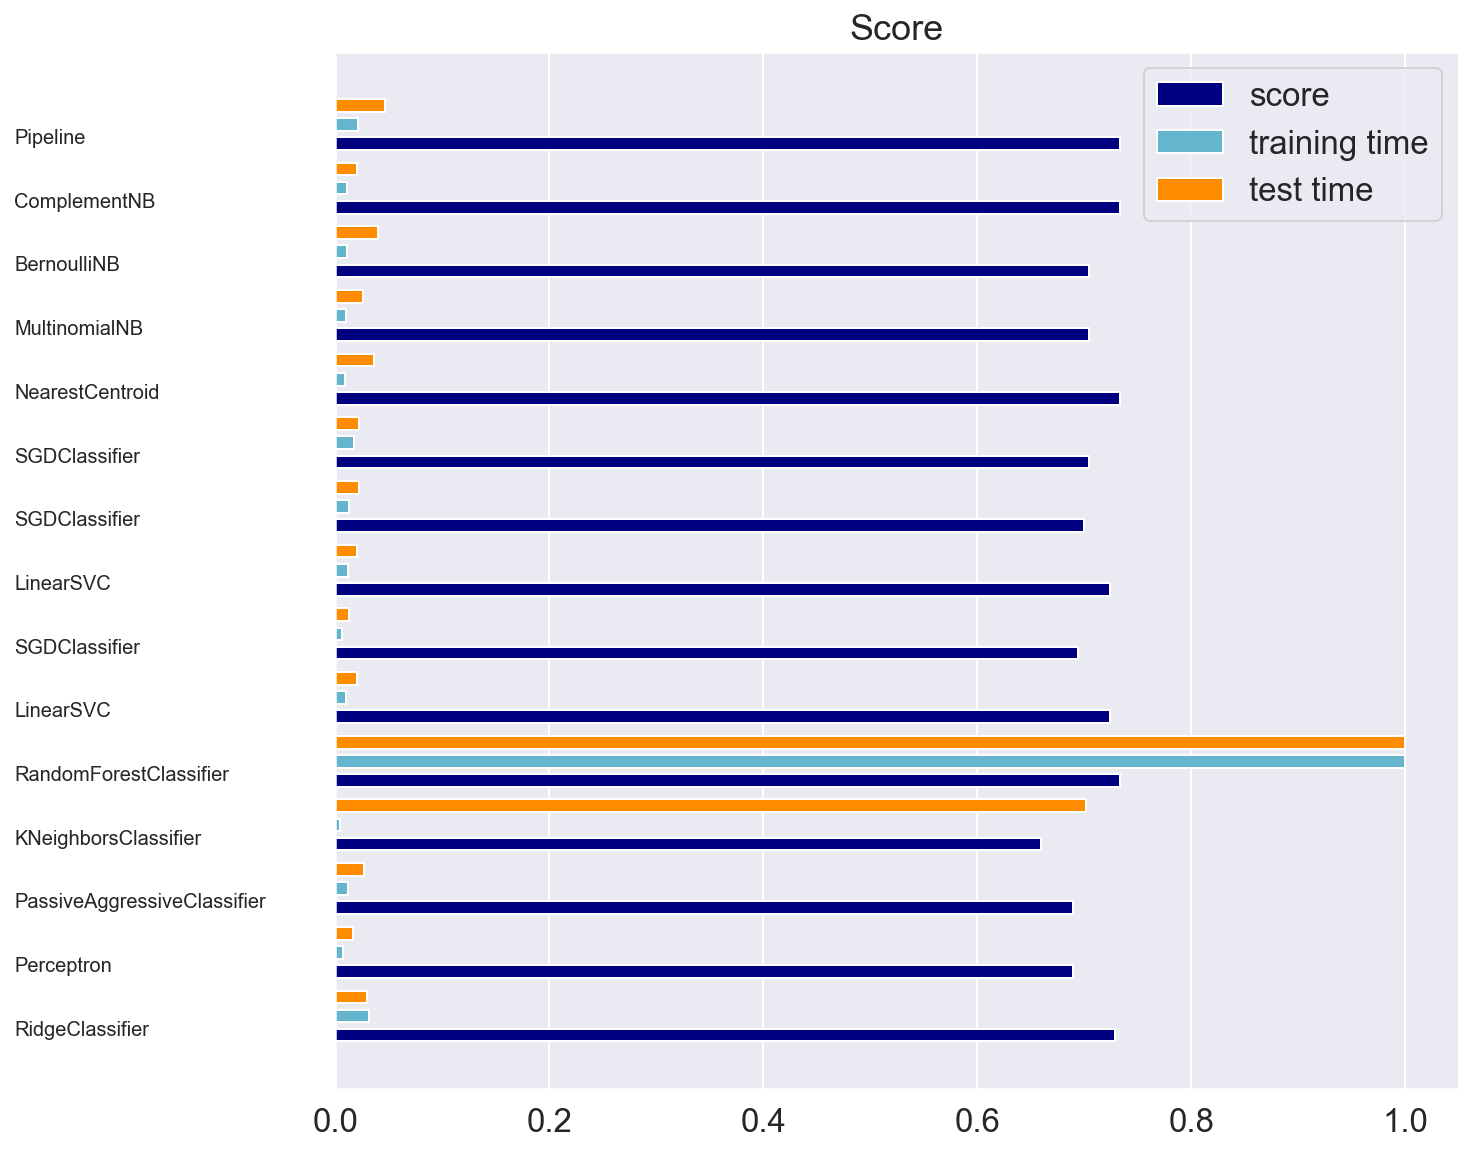

In [59]:
indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, 0.2, label="score", color="navy")
plt.barh(indices + 0.3, training_time, 0.2, label="training time", color="c")
plt.barh(indices + 0.6, test_time, 0.2, label="test time", color="darkorange")
plt.yticks(())
plt.legend(loc="best")
plt.subplots_adjust(left=0.25)
plt.subplots_adjust(top=0.95)
plt.subplots_adjust(bottom=0.05)

for i, c in zip(indices, clf_names):
    plt.text(-0.3, i, c)

plt.show()

can see from the above that Random Forest Classifier is one of the strongest performers. Lets add this to our pandas output. 

Try Random forest model. 

0.7044334975369458
Number of features: 2348
RAND_FOREST CV Training score: 0.9815270935960592
RAND_FOREST Test Score: 0.7044334975369458 

ROC Train and Test Score: 0.9989166848736436 0.7929778554778555
Run X-Val:


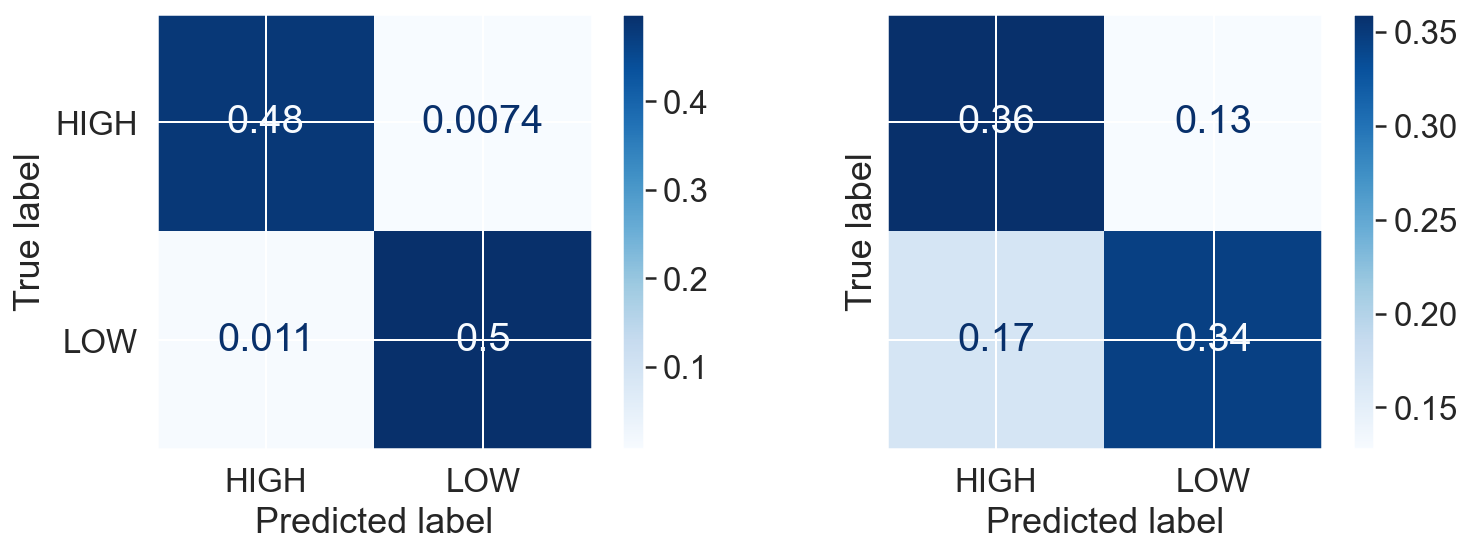

ROC Curves:


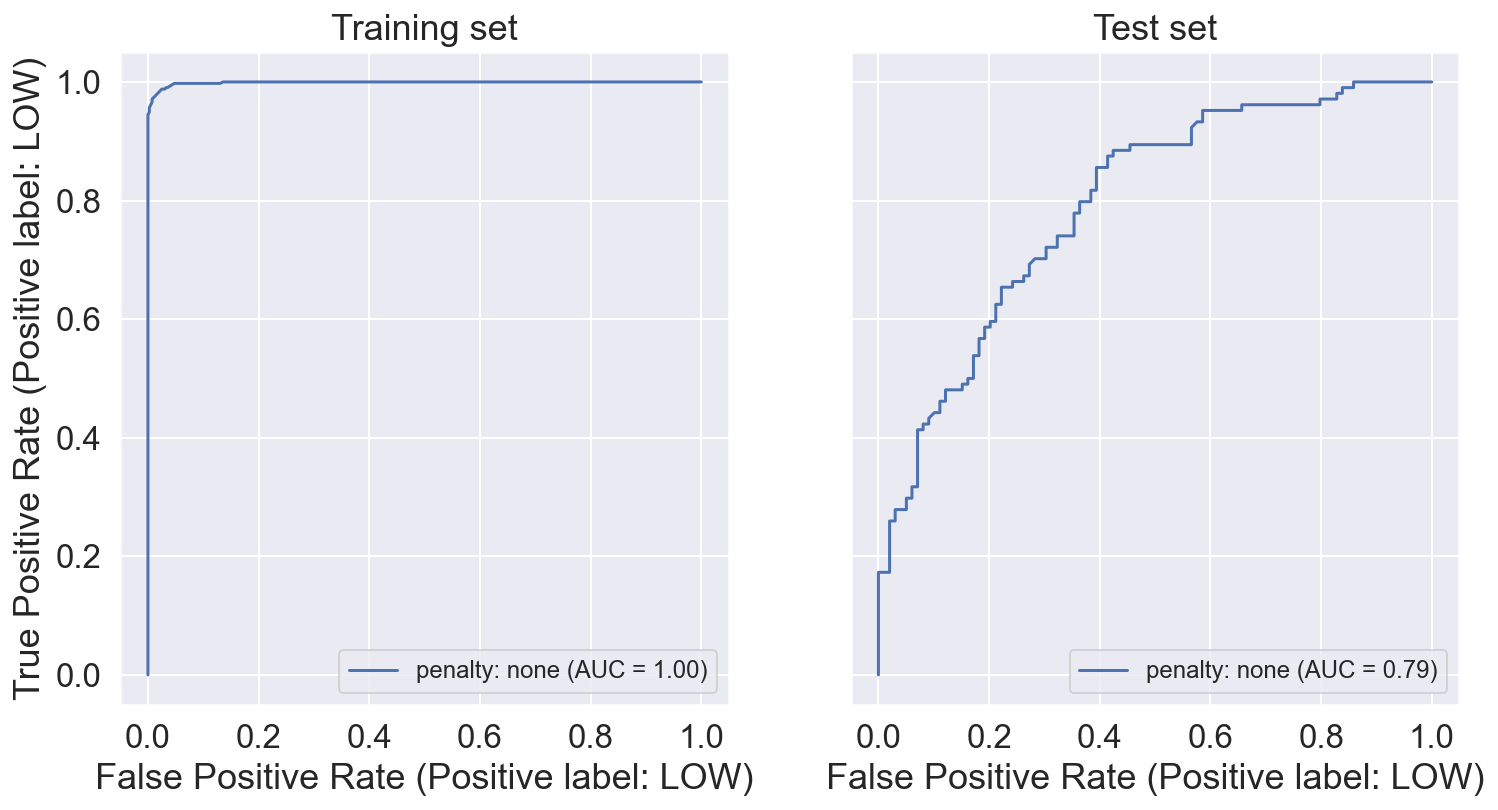

False positives rate changes with different threholds (test data):


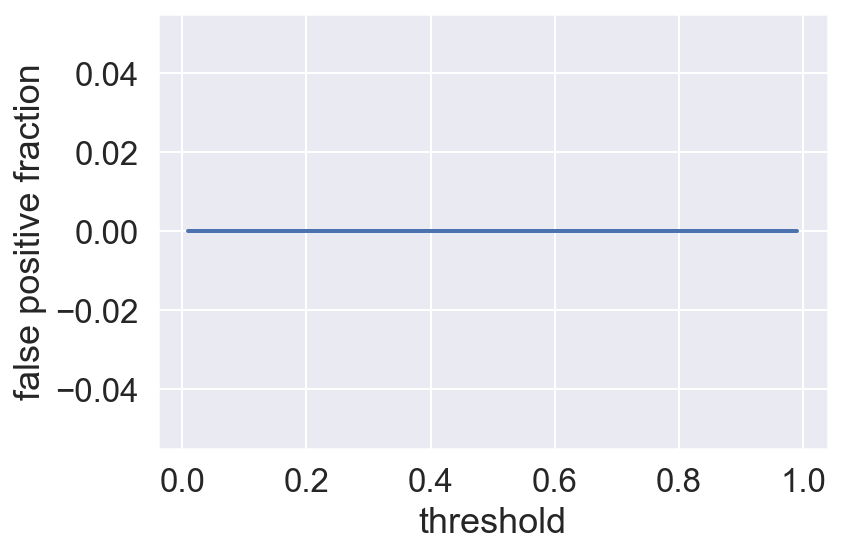

Accuracy rate changes with different threholds (test data):


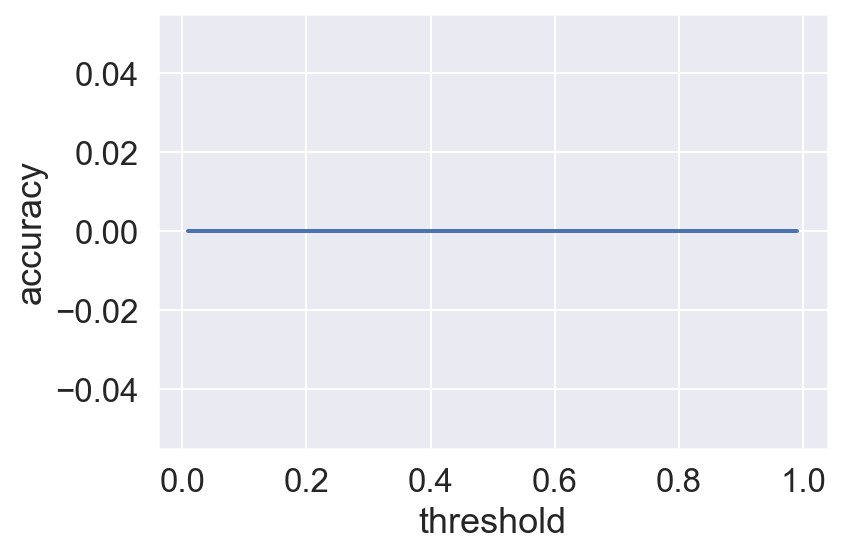

y_train classification report:
              precision    recall  f1-score   support

        HIGH       0.98      0.98      0.98       398
         LOW       0.99      0.98      0.98       414

    accuracy                           0.98       812
   macro avg       0.98      0.98      0.98       812
weighted avg       0.98      0.98      0.98       812

y_test classification report:
              precision    recall  f1-score   support

        HIGH       0.68      0.74      0.71        99
         LOW       0.73      0.67      0.70       104

    accuracy                           0.70       203
   macro avg       0.71      0.71      0.70       203
weighted avg       0.71      0.70      0.70       203



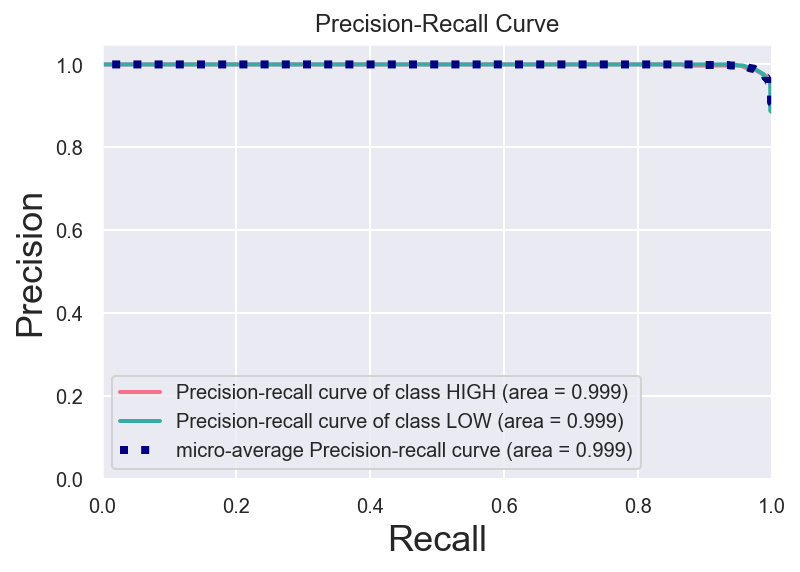

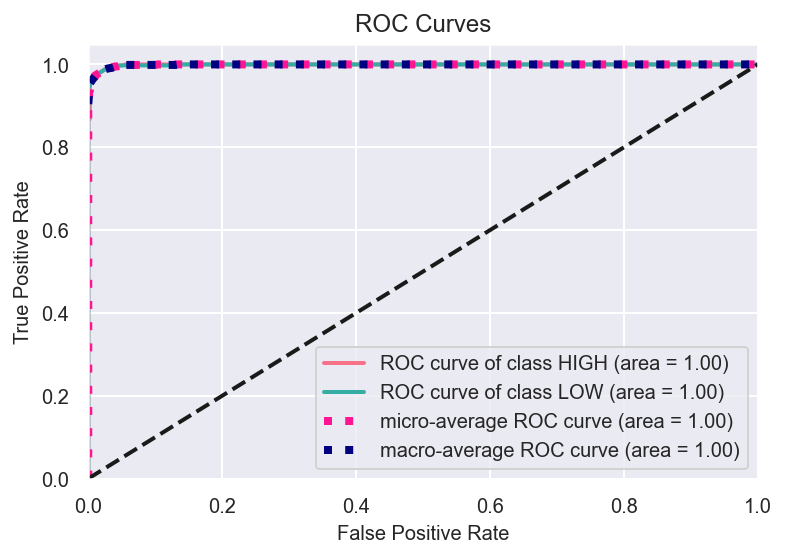

Coefficients (top 10) coefficients coef_abs 
 
 Location_Short_San Francisco 
 -1.829780 
 1.829780 
 
 
 Location_Short_Washington State 
 -1.773286 
 1.773286 
 
 
 Location_Short_Queens 
 1.535937 
 1.535937 
 
 
 is_manager 
 -1.497751 
 1.497751 
 
 
 Location_Short_St 
 1.464805 
 1.464805 
 
 
 experience_1 
 1.288284 
 1.288284 
 
 
 Location_Short_Research Triangle Park 
 -1.269315 
 1.269315 
 
 
 Location_Short_Boston 
 -1.263173 
 1.263173 
 
 
 Location_Short_Fort Meade 
 -1.247217 
 1.247217 
 
 
 Location_Short_Mountain View 
 -1.191173 
 1.191173 
 
 RAND_FOREST Summary LRCV knn LRCV1_Loc_Se_Ju_In NLP NLP_NOSTOP RAND_FOREST 
 
 Training Score 
 0.746305 
 0.685961 
 0.732759 
 0.894089 
 0.900246 
 0.981527 
 
 
 Cross-Validation 
 0.624441 
 0.578808 
 0.660085 
 0.660085 
 0.667492 
 0.641604 
 
 
 Test Score 
 0.620690 
 0.645320 
 0.561576 
 0.733990 
 0.724138 
 0.704433 
 
 
 C 
 [1.] 
 
 [1.] 
 
 
 
 
 
 L1 Ratio 
 [0.001] 
 
 [0.1] 
 
 
 
 
 
 K-Folds 
 5 
 5 
 5 
 5 
 5 
 5

In [64]:
### Try again but with English STOP words included


## Try RAND_FOREST RAND_FOREST:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline



RAND_FOREST = 5 
RAND_FOREST = make_pipeline(TfidfVectorizer(# sublinear_tf=True,
                                      max_df=0.3,
                                      max_features=10000,
                                      norm='l2'
                                      ),
                      RandomForestClassifier(max_depth=100, random_state=0),
                      )

X = results_annual_salaries_filtered['Job Description'].copy()


RAND_FOREST_kfolds = 5 



X = results_annual_salaries_filtered['Job Description'].copy()

# get train-test split with balance between 1s and 0s of test are kept equivalent in each test (stratify =y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=1)


RAND_FOREST.fit(X_train, y_train)
y_pred = RAND_FOREST.predict(X_test)
print(accuracy_score(y_test, y_pred))
print("Number of features:", len(RAND_FOREST.steps[0][1].get_feature_names()))


# evaluate on the training set
print('RAND_FOREST CV Training score:', RAND_FOREST.score(X_train, y_train))

# evaluate on the test set
print("RAND_FOREST Test Score:", RAND_FOREST.score(X_test, y_test),'\n')

# ROC Train and test score
print('ROC Train and Test Score:', roc_auc_score(y_train, RAND_FOREST.predict_proba(X_train)[:, 1]), 
roc_auc_score(y_test, RAND_FOREST.predict_proba(X_test)[:, 1]))


## RUN X-VAL

## Get XVals score
print(Bold + 'Run X-Val:' + Normal)

# get cross validated scores
RAND_FOREST_scores = cross_val_score(RAND_FOREST, X_train, y_train, cv=RAND_FOREST_kfolds, n_jobs=6)


############################ Charts and Tables ############################



# # plot the magnitude of the coefficients (horizontal)
# df_coef_ENetCV['coefficients'].sort_values().plot(kind='barh');



## Show RAND_FOREST Output summary
try:  
    df_scores_C # create the data frame if it doesn't already exist, otherwise just add a new column
except: 
    df_scores_C = pd.DataFrame(index= ['Training Score', 'Cross-Validation', 'Test Score', 'C', 'L1 Ratio','K-Folds'])
    RAND_FOREST_scores_df = [RAND_FOREST.score(X_train,y_train),RAND_FOREST_scores.mean(), RAND_FOREST.score(X_test, y_test), "", "", RAND_FOREST_kfolds]
    df_scores_C['RAND_FOREST'] = RAND_FOREST_scores_df

else: 
    RAND_FOREST_scores_df = [RAND_FOREST.score(X_train,y_train),RAND_FOREST_scores.mean(), RAND_FOREST.score(X_test, y_test), "", "", RAND_FOREST_kfolds]
    df_scores_C['RAND_FOREST'] = RAND_FOREST_scores_df

# Diplay the Coefficients data frame and RAND_FOREST Summary dataframes side by side
df_coef_styler = df_coef.sort_values(by='coef_abs', ascending = False)[:10].style.set_table_attributes("style='display:inline'").set_caption('Coefficients (top 10)')
df_scores_styler = df_scores_C.style.set_table_attributes("style='display:inline'").set_caption('RAND_FOREST Summary')

# plot the confusion matrix
from sklearn.metrics import  plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve, roc_auc_score, average_precision_score
fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
plot_confusion_matrix(RAND_FOREST, X_train, y_train, cmap='Blues', ax=ax[0], normalize='all')
plot_confusion_matrix(RAND_FOREST, X_test, y_test, cmap='Blues', ax=ax[1], normalize='all')
for a in ax:
    texts = a.texts
    for text in texts:
        text.set_size(20)
plt.show()

# Plot the ROC Curves:

print('ROC Curves:')
fig_roc, ax_roc = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)
plot_roc_curve(RAND_FOREST, X_train, y_train, ax=ax_roc[0], name='penalty: none')
plot_roc_curve(RAND_FOREST, X_test, y_test, ax=ax_roc[1], name='penalty: none')
ax_roc[0].legend(loc='lower right', fontsize=12)
ax_roc[1].legend(loc='lower right', fontsize=12)
ax_roc[1].set_ylabel(None)
ax_roc[0].set_title('Training set')
ax_roc[1].set_title('Test set')
plt.show()

# plot false positive rate as threshold changed:
print('False positives rate changes with different threholds (test data):')
false_positives = []
for thresh in np.arange(1, 100)/100.:
    labeled_1 = np.array([1 if x >= thresh else 0 for x in RAND_FOREST.predict_proba(X_test)[:, 1]])
    fp = np.mean((y_test == 0) & (labeled_1 == 1))
    false_positives.append((thresh, fp))
#     print('Threshold:', thresh, 'false positives:', fp)
false_positives = np.array(false_positives)
plt.plot(false_positives[:, 0], false_positives[:, 1], lw=2)
plt.xlabel('threshold')
plt.ylabel('false positive fraction')
plt.show()

# plot accuracy change with threshold
print('Accuracy rate changes with different threholds (test data):')
accuracies = []
for thresh in np.arange(1, 100)/100.:
    labeled_1 = np.array([1 if x >= thresh else 0 for x in RAND_FOREST.predict_proba(X_test)[:, 1]])
    acc = np.mean(y_test==labeled_1)
    accuracies.append((thresh, acc))
#     print('Threshold:', thresh, 'Correct predictions:', acc)
accuracies = np.array(accuracies)
plt.plot(*accuracies.T, lw=2)
plt.xlabel('threshold')
plt.ylabel('accuracy')
plt.show()


# classification report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
predictions_train = RAND_FOREST.predict(X_train)
predictions_test = RAND_FOREST.predict(X_test)
print('y_train classification report:')
print(classification_report(y_train, predictions_train))
print('y_test classification report:')
print(classification_report(y_test, predictions_test))

# precision recall curves:
from matplotlib.colors import ListedColormap
import scikitplot as skplt
cmap = ListedColormap(sns.color_palette("husl", len(RAND_FOREST.classes_)))
probabilities_train = RAND_FOREST.predict_proba(X_train)
probabilities_test = RAND_FOREST.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_train, probabilities_train, cmap=cmap)
plt.show()
skplt.metrics.plot_roc(y_train, probabilities_train, cmap=cmap)
plt.show()

from IPython.display import display_html 
display_html(df_coef_styler._repr_html_()+df_scores_styler._repr_html_(), raw=True)


In [ ]:
# Random Forest not so good after all on the X-Val score. Would need to run grid search. 

### Model evaluation:

- Use cross-validation to evaluate the models.
- Evaluate the accuracy, AUC, precision and recall of the models.
- Plot the ROC and precision-recall curves.

0.6798029556650246
Number of features: 2348
RAND_FOREST CV Training score: 0.8349753694581281
RAND_FOREST Test Score: 0.6798029556650246 

ROC Train and Test Score: 0.947263491369893 0.774087024087024
Run X-Val:


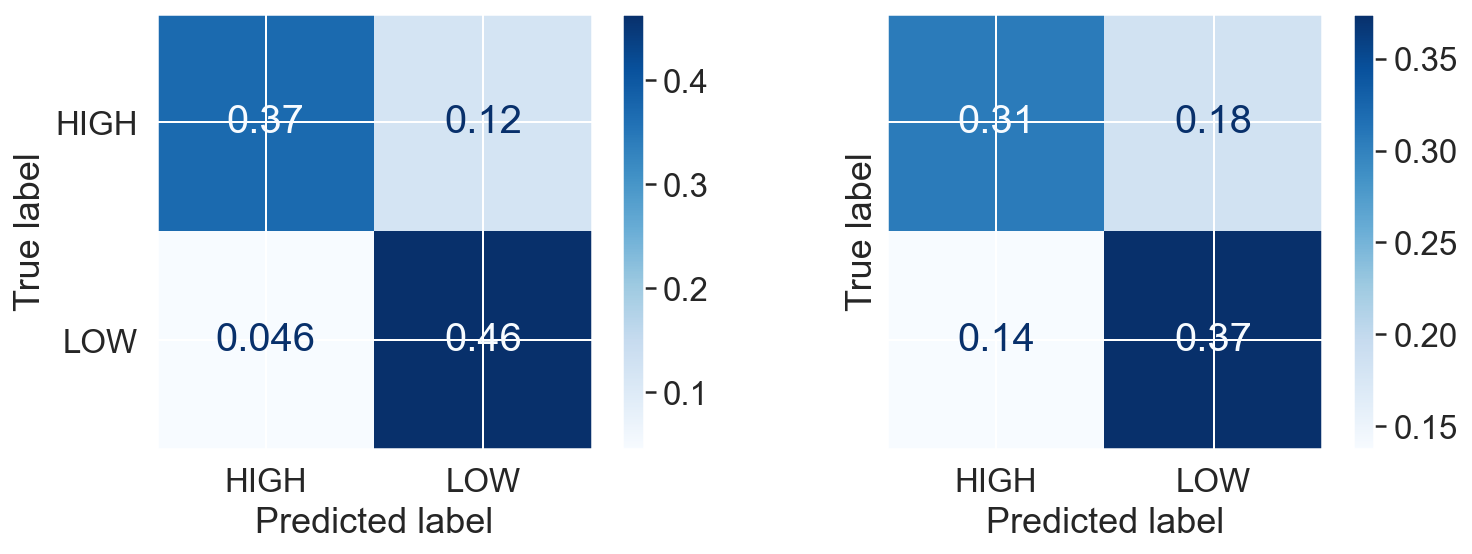

ROC Curves:


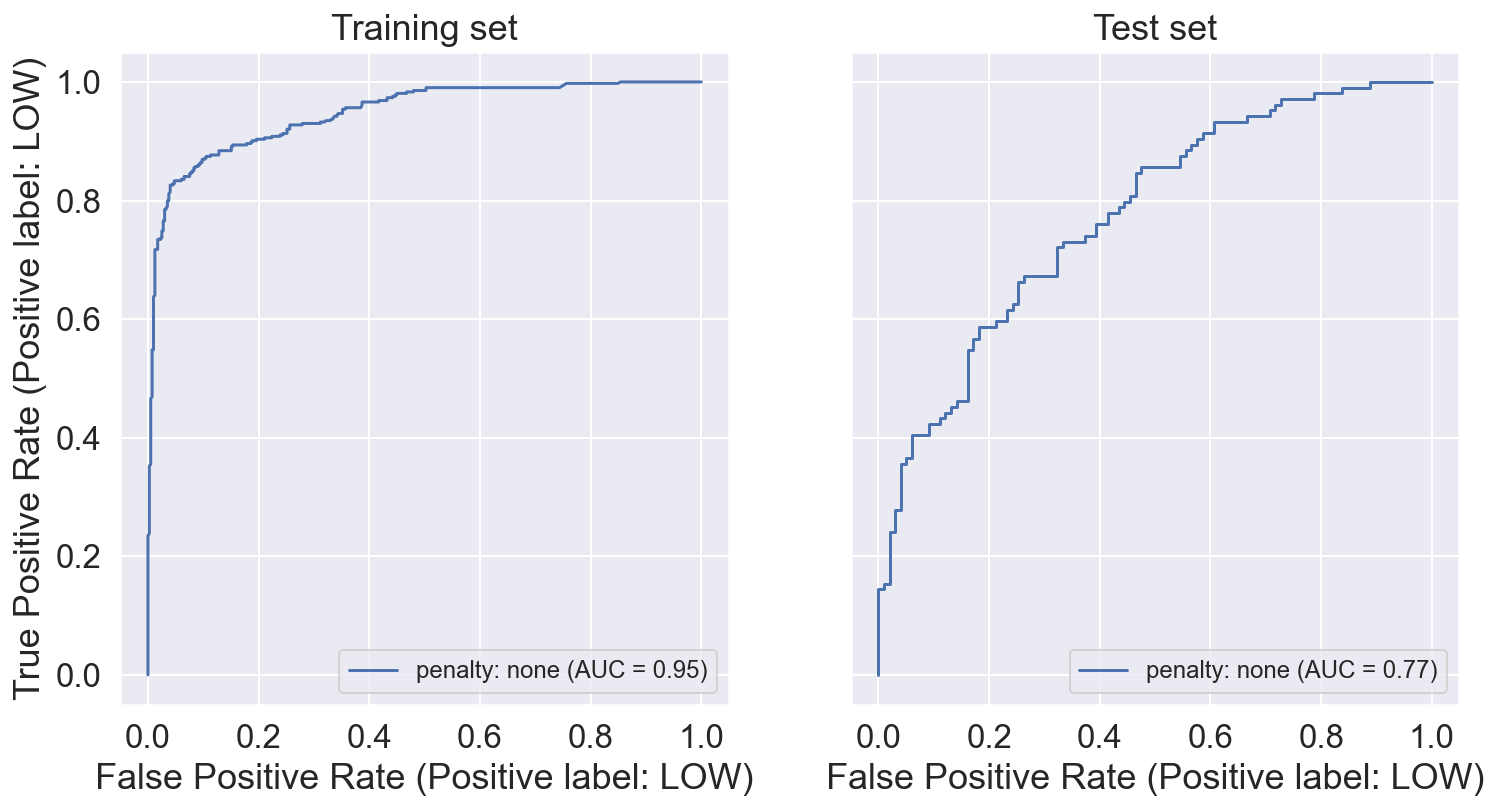

False positives rate changes with different threholds (test data):


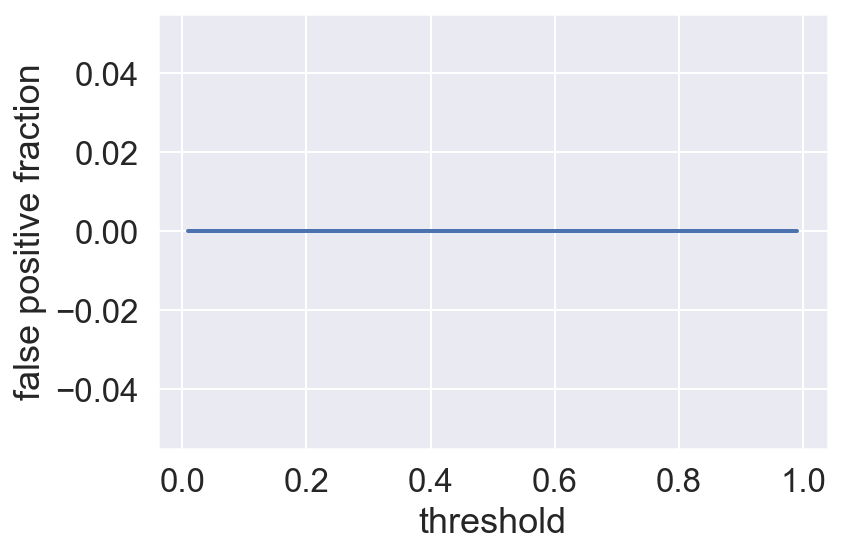

Accuracy rate changes with different threholds (test data):


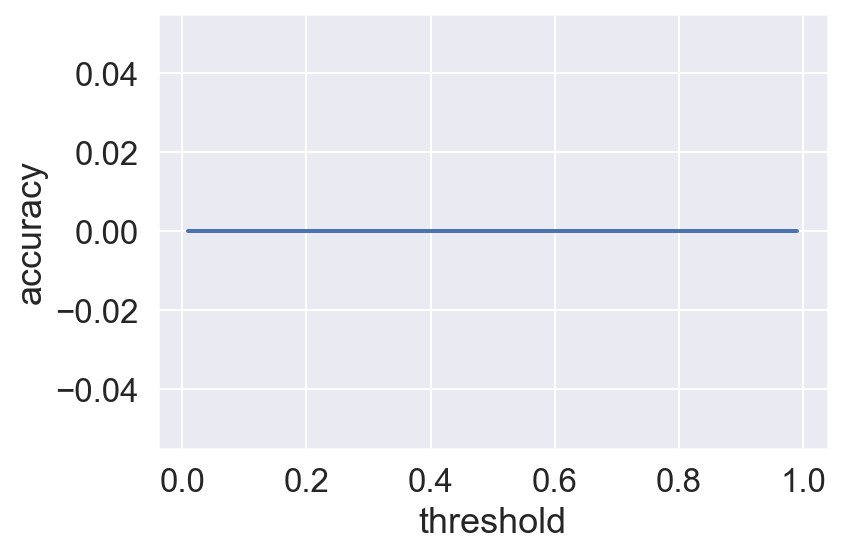

y_train classification report:
              precision    recall  f1-score   support

        HIGH       0.89      0.76      0.82       398
         LOW       0.80      0.91      0.85       414

    accuracy                           0.83       812
   macro avg       0.84      0.83      0.83       812
weighted avg       0.84      0.83      0.83       812

y_test classification report:
              precision    recall  f1-score   support

        HIGH       0.69      0.63      0.66        99
         LOW       0.67      0.73      0.70       104

    accuracy                           0.68       203
   macro avg       0.68      0.68      0.68       203
weighted avg       0.68      0.68      0.68       203



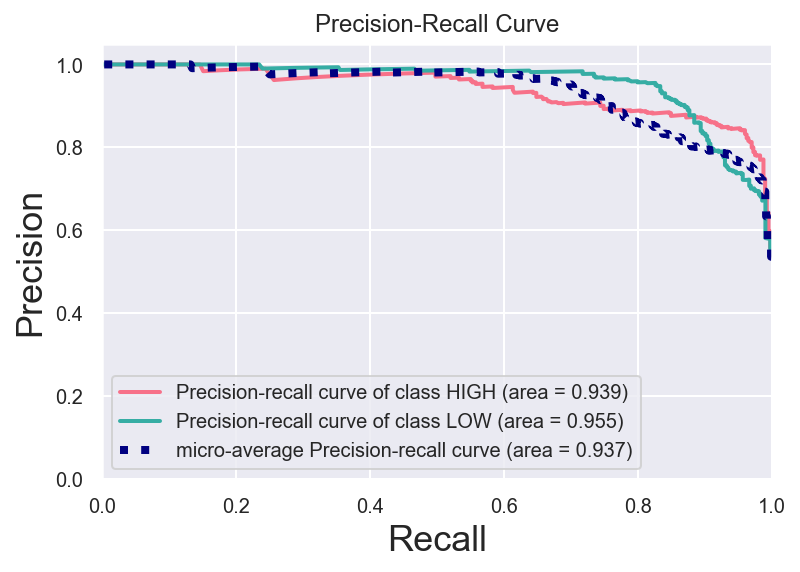

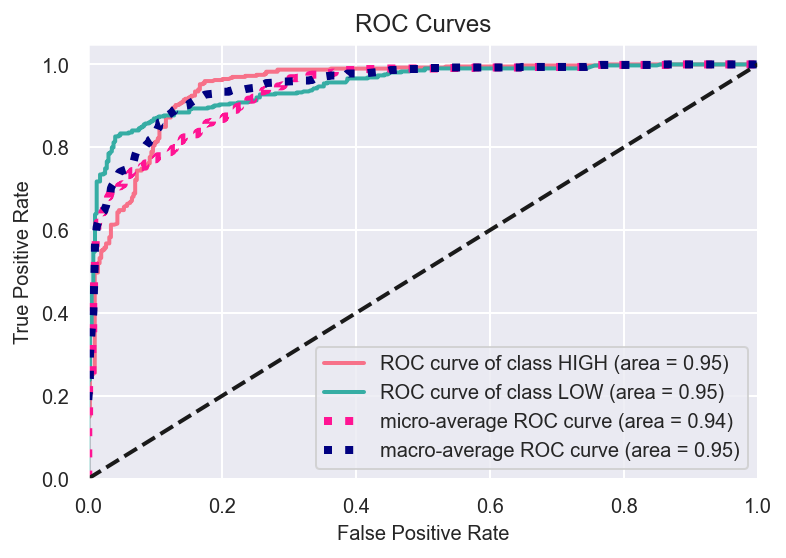

Coefficients (top 10) coefficients coef_abs 
 
 Location_Short_San Francisco 
 -1.829780 
 1.829780 
 
 
 Location_Short_Washington State 
 -1.773286 
 1.773286 
 
 
 Location_Short_Queens 
 1.535937 
 1.535937 
 
 
 is_manager 
 -1.497751 
 1.497751 
 
 
 Location_Short_St 
 1.464805 
 1.464805 
 
 
 experience_1 
 1.288284 
 1.288284 
 
 
 Location_Short_Research Triangle Park 
 -1.269315 
 1.269315 
 
 
 Location_Short_Boston 
 -1.263173 
 1.263173 
 
 
 Location_Short_Fort Meade 
 -1.247217 
 1.247217 
 
 
 Location_Short_Mountain View 
 -1.191173 
 1.191173 
 
 RAND_FOREST Summary LRCV knn LRCV1_Loc_Se_Ju_In NLP NLP_NOSTOP RAND_FOREST RAND_FOREST_WITH_STOPW 
 
 Training Score 
 0.746305 
 0.685961 
 0.732759 
 0.894089 
 0.900246 
 0.981527 
 0.834975 
 
 
 Cross-Validation 
 0.624441 
 0.578808 
 0.660085 
 0.660085 
 0.667492 
 0.641604 
 0.648974 
 
 
 Test Score 
 0.620690 
 0.645320 
 0.561576 
 0.733990 
 0.724138 
 0.704433 
 0.679803 
 
 
 C 
 [1.] 
 
 [1.] 
 
 
 
 
 
 
 L1 Ratio 
 [0.001] 
 
 [0.1] 
 
 
 
 
 
 
 K-Folds 
 5 
 5 
 5 
 5 
 5 
 5 
 5

In [65]:
### Try again but with English STOP words included


## Try RAND_FOREST RAND_FOREST:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline




RAND_FOREST = make_pipeline(TfidfVectorizer(# sublinear_tf=True,
                                      max_df=0.3,
                                      max_features=10000,
                                      norm='l2'
                                      ),
                      RandomForestClassifier(max_depth=10, random_state=0),
                      )

X = results_annual_salaries_filtered['Job Description'].copy()


RAND_FOREST_kfolds = 5 



X = results_annual_salaries_filtered['Job Description'].copy()

# get train-test split with balance between 1s and 0s of test are kept equivalent in each test (stratify =y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=1)


RAND_FOREST.fit(X_train, y_train)
y_pred = RAND_FOREST.predict(X_test)
print(accuracy_score(y_test, y_pred))
print("Number of features:", len(RAND_FOREST.steps[0][1].get_feature_names()))


# evaluate on the training set
print('RAND_FOREST CV Training score:', RAND_FOREST.score(X_train, y_train))

# evaluate on the test set
print("RAND_FOREST Test Score:", RAND_FOREST.score(X_test, y_test),'\n')

# ROC Train and test score
print('ROC Train and Test Score:', roc_auc_score(y_train, RAND_FOREST.predict_proba(X_train)[:, 1]), 
roc_auc_score(y_test, RAND_FOREST.predict_proba(X_test)[:, 1]))


## RUN X-VAL

## Get XVals score
print(Bold + 'Run X-Val:' + Normal)

# get cross validated scores
RAND_FOREST_scores = cross_val_score(RAND_FOREST, X_train, y_train, cv=RAND_FOREST_kfolds, n_jobs=6)


############################ Charts and Tables ############################



# # plot the magnitude of the coefficients (horizontal)
# df_coef_ENetCV['coefficients'].sort_values().plot(kind='barh');



## Show RAND_FOREST Output summary
try:  
    df_scores_C # create the data frame if it doesn't already exist, otherwise just add a new column
except: 
    df_scores_C = pd.DataFrame(index= ['Training Score', 'Cross-Validation', 'Test Score', 'C', 'L1 Ratio','K-Folds'])
    RAND_FOREST_scores_df = [RAND_FOREST.score(X_train,y_train),RAND_FOREST_scores.mean(), RAND_FOREST.score(X_test, y_test), "", "", RAND_FOREST_kfolds]
    df_scores_C['RAND_FOREST'] = RAND_FOREST_scores_df

else: 
    RAND_FOREST_scores_df = [RAND_FOREST.score(X_train,y_train),RAND_FOREST_scores.mean(), RAND_FOREST.score(X_test, y_test), "", "", RAND_FOREST_kfolds]
    df_scores_C['RAND_FOREST_WITH_STOPW'] = RAND_FOREST_scores_df

# Diplay the Coefficients data frame and RAND_FOREST Summary dataframes side by side
df_coef_styler = df_coef.sort_values(by='coef_abs', ascending = False)[:10].style.set_table_attributes("style='display:inline'").set_caption('Coefficients (top 10)')
df_scores_styler = df_scores_C.style.set_table_attributes("style='display:inline'").set_caption('RAND_FOREST Summary')

# plot the confusion matrix
from sklearn.metrics import  plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve, roc_auc_score, average_precision_score
fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
plot_confusion_matrix(RAND_FOREST, X_train, y_train, cmap='Blues', ax=ax[0], normalize='all')
plot_confusion_matrix(RAND_FOREST, X_test, y_test, cmap='Blues', ax=ax[1], normalize='all')
for a in ax:
    texts = a.texts
    for text in texts:
        text.set_size(20)
plt.show()

# Plot the ROC Curves:

print('ROC Curves:')
fig_roc, ax_roc = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)
plot_roc_curve(RAND_FOREST, X_train, y_train, ax=ax_roc[0], name='penalty: none')
plot_roc_curve(RAND_FOREST, X_test, y_test, ax=ax_roc[1], name='penalty: none')
ax_roc[0].legend(loc='lower right', fontsize=12)
ax_roc[1].legend(loc='lower right', fontsize=12)
ax_roc[1].set_ylabel(None)
ax_roc[0].set_title('Training set')
ax_roc[1].set_title('Test set')
plt.show()

# plot false positive rate as threshold changed:
print('False positives rate changes with different threholds (test data):')
false_positives = []
for thresh in np.arange(1, 100)/100.:
    labeled_1 = np.array([1 if x >= thresh else 0 for x in RAND_FOREST.predict_proba(X_test)[:, 1]])
    fp = np.mean((y_test == 0) & (labeled_1 == 1))
    false_positives.append((thresh, fp))
#     print('Threshold:', thresh, 'false positives:', fp)
false_positives = np.array(false_positives)
plt.plot(false_positives[:, 0], false_positives[:, 1], lw=2)
plt.xlabel('threshold')
plt.ylabel('false positive fraction')
plt.show()

# plot accuracy change with threshold
print('Accuracy rate changes with different threholds (test data):')
accuracies = []
for thresh in np.arange(1, 100)/100.:
    labeled_1 = np.array([1 if x >= thresh else 0 for x in RAND_FOREST.predict_proba(X_test)[:, 1]])
    acc = np.mean(y_test==labeled_1)
    accuracies.append((thresh, acc))
#     print('Threshold:', thresh, 'Correct predictions:', acc)
accuracies = np.array(accuracies)
plt.plot(*accuracies.T, lw=2)
plt.xlabel('threshold')
plt.ylabel('accuracy')
plt.show()


# classification report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
predictions_train = RAND_FOREST.predict(X_train)
predictions_test = RAND_FOREST.predict(X_test)
print('y_train classification report:')
print(classification_report(y_train, predictions_train))
print('y_test classification report:')
print(classification_report(y_test, predictions_test))

# precision recall curves:
from matplotlib.colors import ListedColormap
import scikitplot as skplt
cmap = ListedColormap(sns.color_palette("husl", len(RAND_FOREST.classes_)))
probabilities_train = RAND_FOREST.predict_proba(X_train)
probabilities_test = RAND_FOREST.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_train, probabilities_train, cmap=cmap)
plt.show()
skplt.metrics.plot_roc(y_train, probabilities_train, cmap=cmap)
plt.show()

from IPython.display import display_html 
display_html(df_coef_styler._repr_html_()+df_scores_styler._repr_html_(), raw=True)


Tuning the model to reduce error of showing high salary by mistake

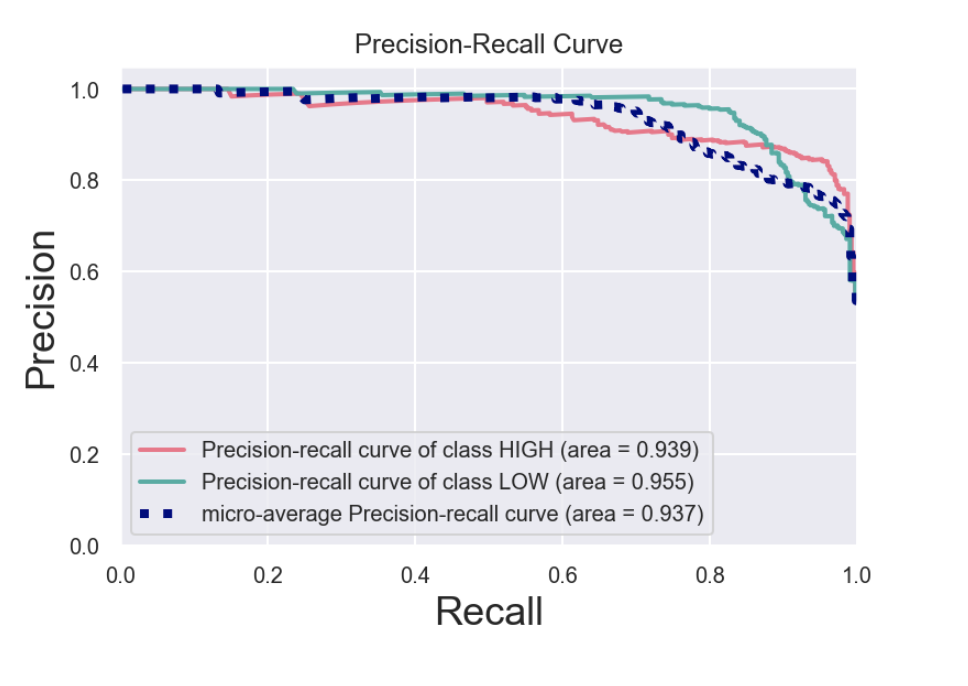

in context of HIGH:
precision is % of HIGH's identified that were correct. Recall is the HIGH's identified. 
There is a trade off between the two. The boss wants to favour Precision at expense of recall. 

In [66]:
# look at the test data

In [67]:
y_pred # these are the predictions with the threshold set as is

array(['HIGH', 'LOW', 'LOW', 'HIGH', 'HIGH', 'LOW', 'LOW', 'HIGH', 'LOW',
       'LOW', 'LOW', 'LOW', 'LOW', 'LOW', 'LOW', 'LOW', 'HIGH', 'LOW',
       'HIGH', 'LOW', 'LOW', 'HIGH', 'LOW', 'LOW', 'HIGH', 'LOW', 'LOW',
       'LOW', 'HIGH', 'LOW', 'HIGH', 'HIGH', 'LOW', 'HIGH', 'LOW', 'HIGH',
       'LOW', 'HIGH', 'HIGH', 'HIGH', 'LOW', 'LOW', 'HIGH', 'HIGH',
       'HIGH', 'LOW', 'HIGH', 'LOW', 'LOW', 'LOW', 'HIGH', 'LOW', 'HIGH',
       'HIGH', 'LOW', 'LOW', 'HIGH', 'LOW', 'LOW', 'HIGH', 'HIGH', 'LOW',
       'LOW', 'LOW', 'LOW', 'LOW', 'HIGH', 'HIGH', 'LOW', 'LOW', 'HIGH',
       'HIGH', 'LOW', 'LOW', 'LOW', 'LOW', 'HIGH', 'LOW', 'LOW', 'HIGH',
       'HIGH', 'HIGH', 'LOW', 'HIGH', 'LOW', 'LOW', 'LOW', 'HIGH', 'LOW',
       'HIGH', 'LOW', 'HIGH', 'LOW', 'LOW', 'HIGH', 'LOW', 'LOW', 'LOW',
       'HIGH', 'HIGH', 'HIGH', 'LOW', 'LOW', 'LOW', 'LOW', 'HIGH', 'HIGH',
       'LOW', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'LOW', 'LOW',
       'HIGH', 'LOW', 'LOW', 'LOW', 'LOW', 'LOW', 'LOW'

In [68]:
y_pred.shape # these are the predictions with the threshold set as is

(203,)

In [69]:
RAND_FOREST.predict_proba(X_test)[:, 1] # can see where proba is less than 0.5 it predicts HIGH vice versa.

array([0.3299319 , 0.58156403, 0.5812177 , 0.23612874, 0.45165565,
       0.51068237, 0.58193167, 0.47473961, 0.53424829, 0.53578415,
       0.55867394, 0.60401693, 0.50029637, 0.53659272, 0.53009999,
       0.51373621, 0.48631344, 0.55694954, 0.45571499, 0.55264947,
       0.53817906, 0.37380477, 0.51063715, 0.53438446, 0.4937741 ,
       0.56968538, 0.52623787, 0.58842908, 0.45140299, 0.59314127,
       0.44115532, 0.46149972, 0.52482292, 0.45146891, 0.57046529,
       0.39999341, 0.58009173, 0.42983266, 0.47239333, 0.46498626,
       0.51134715, 0.51639537, 0.48445065, 0.34538547, 0.35384169,
       0.58799299, 0.36012135, 0.52342596, 0.54537822, 0.53800341,
       0.35380202, 0.52141358, 0.45801935, 0.41152692, 0.59358836,
       0.58842908, 0.46348104, 0.53201016, 0.56898502, 0.48855464,
       0.40180133, 0.51659011, 0.50449789, 0.51040881, 0.53853487,
       0.53104373, 0.49114507, 0.44543565, 0.53083384, 0.54277916,
       0.33290418, 0.46710777, 0.54578041, 0.51155271, 0.55061

In [70]:
RAND_FOREST.predict_proba(X_test)[:, 1].shape

(203,)

In [71]:
# therefore need to adjust the threshold at which is predicts HIGH.

In [72]:
# create new function that predicts values based on new threshold

def adjust_accuracy(predicted_proba,x):
    if predicted_proba >= x:
        return 'LOW'
    else:
        return 'HIGH'
        


In [73]:
predicted_probas = RAND_FOREST.predict_proba(X_test)[:, 1]

In [74]:
new_predictions = []
for i in predicted_probas:
    x = adjust_accuracy(i,0.3)
    new_predictions.append(x)

new_predictions

['LOW',
 'LOW',
 'LOW',
 'HIGH',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',
 'LOW',

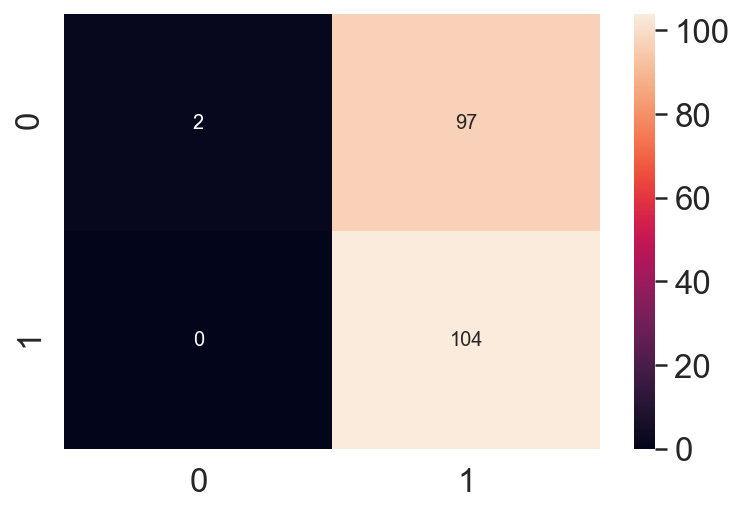

In [75]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, new_predictions)
f = sns.heatmap(cm, annot=True, fmt='d')

# True label = vertical
# Predict label = horizontal

# see below updated confusion matrix which shows:
# top left is the HIGH values identified correctly. NOw there are only 2 that were picked up (correctly as HIGH)
# Top right shows updated model predictions incorrectly classified 97 HIGHs as lows
# bottom left 0 LOW salaries incorrectly classified as HIGH
# bottom right 104 LOW salaries correctly classified as LOW

# the boss will be happy as no salaries were incorrectly classified as HIGH (bottom left)

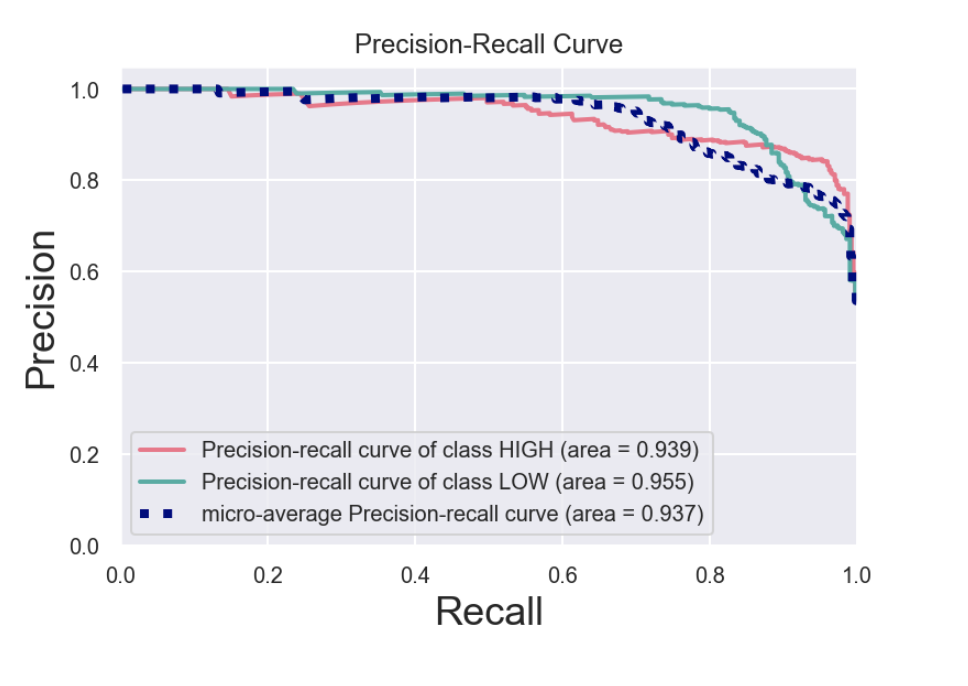

In context of HIGH:
precision is % of HIGH's identified that were correct. Recall is the % HIGH's identified. 
There is a trade off between the two. The boss wants to favour Precision at expense of recall. i.e. to ensure that the HIGH;s that are identified are correct as often as possible at the expense of incorrectly classifying high salaries as LOW. 
